# Exploratory Data Analysis of Metabolomics on Liver Tissue
## Purpose
Metabolomics was performed on liver tissue homogenate from mice that were considered sick or healthy controllers following infection. Our goal is to identify which metabolites were enriched in one population and not the other by using a more unbiased metric of clinical outcome.

First, we need to decide on the metric of clinical outcome that can be used to segregate the data
## Investigating different clinical outcome#
In the analysis, the primary clinical data that were analyzed were temperature, sex, Liver_CFU, genotype, age, and year of data collection, and Hours Post Infection. Overall, the PCA analysis demonstrated grouping when investigating temperature and Liver_CFU, not only demonstrating that they were strong metrics for correlating the metabolomic profiles in mice. 

## Principal Component Analysis (PCA)
To explore the clinical data, PCA was used. PCA is a statistical tool and dimensionality-reduction method that helps identify and visualizes potential relationships between clinical data and the 917 metabolites. PCA increases interpretability but at the same time minimizes information loss. It does so by creating new uncorrelated variables that successively maximize variance. By Converting correlations into a 2-D graph, the correlated groups will cluster together. 



In [10]:
# Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# read in dfs 
merged_data = pd.read_csv("../raw/final_merged_jeren.csv")
names = pd.read_csv("../raw/Biochemical_names.csv")
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")
CFUs = pd.read_csv("../raw/Liver_and_Spleen_CFUs.csv")

metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features
x = merged_data.loc[:, metabolites].values
# Separating out the Group
y = merged_data.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
CFUs.rename(columns={'Sample Name':'parent_sample_name','ANIMAL ID':'PARAM_ANIMAL_ID'}, inplace = True)
CFUs_merged= pd.merge(CFUs,merged_data, on = "parent_sample_name")
print(CFUs_merged.shape)

# If want plotting, set to 1. Otherwise, set to 0.
want_plots = 0

(43, 937)


In [2]:
CFUs_merged.head()

Parent ID parent_sample_name PARAM_ANIMAL_ID_x Blood CFU Spleen CFU  \
0    7533389         HARV-24509        12.7.18 #7      9250       2404   
1    7533390         HARV-24510       12.7.18 #11      8000        803   
2    7533391         HARV-24511         2.1.19 #6         0         32   
3    7533392         HARV-24512        6.11.19 #7         –          –   
4    7533394         HARV-24514       12.7.18 #14    210750     136674   

  Lung CFU Colon CFU  Unnamed: 0  Group CLIENT_IDENTIFIER  ... X100001394  \
0        –         –           1  EH_WT               EH5  ...     0.2880   
1        –         –           2  EH_WT               EH7  ...     1.5633   
2        –         –           3  EH_WT               EH9  ...     0.9881   
3        –         –           4  EH_WT              EH11  ...     0.8733   
4        –         –           5  ES_WT               ES4  ...     1.1748   

  X100001451    X566 X100003640 X100003641  X100003210   X1004 X100000299  \
0     1.0257  0.6015     1.1362     1.0880      0.9940  0.9168     1.2714   
1     1.5438  0.8071     0.7525     0.7213      1.3981  1.0934     1.5455   
2     1.0104  0.4416     1.0011     0.9842      0.6383  0.9799     1.8851   
3     0.8915  0.6896     0.5123     0.6470      0.9666  0.8868     0.5241   
4     1.2712  0.9087     1.6988     1.2799      1.2191  1.4242     3.6886   

  X100000015  year  
0     1.2557  2018  
1     0.8756  2018  
2     0.7286  2019  
3     0.6401  2019  
4     0.3365  2018  

[5 rows x 937 columns]

# Visualizing by Lab Assigned Mouse Labels

The following plot represents the PCA plot of the groups as defined by their stage of sickness and genotype (i.e 'EH_WT','ES_WT','ES_KO','EL-KO6','LH_WT','LS_WT','LS_KO'). As shown by the graph there is no clear grouping amongst the data

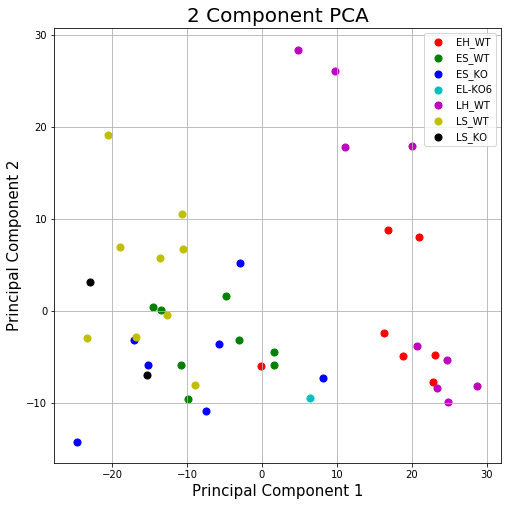

In [3]:
#PCA Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca3d = PCA(n_components=3)
principalComponents_3d = pca3d.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1',
                                      'principal component 2'])

finalDf_Group = pd.concat([principalDf, merged_data[['Group']]], axis = 1)

#Plotting Data 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

Groups = ['EH_WT','ES_WT','ES_KO','EL-KO6','LH_WT','LS_WT','LS_KO']
colors = ['r', 'g', 'b', 'c' , 'm', 'y', 'k']
for Group, color in zip(Groups,colors):
    indicesToKeep = finalDf_Group['Group'] == Group
    ax.scatter(finalDf_Group.loc[indicesToKeep, 'principal component 1']
               , finalDf_Group.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Groups)
ax.grid()


### Fig 1
We can see that that early and late healthy wild type groups cluster on the right, whereas the sick mice cluster on the left. Notably, there are no KO healthy mice. Overall, there is a clear separation along the middle of the graph. 


Given that there appears to be no clear segregation amongst genotype, all genotypes were included in the data analysis

# Visualizing by Mouse Sex and Health Status 

While there is no clear grouping between male and female mice as shown by the green (female) and red (male) colored dots. However, the graph shows a relatively strong separation between the sicke and healthy mice, which demonstrates that there is a correlation in their metabolomic profile 

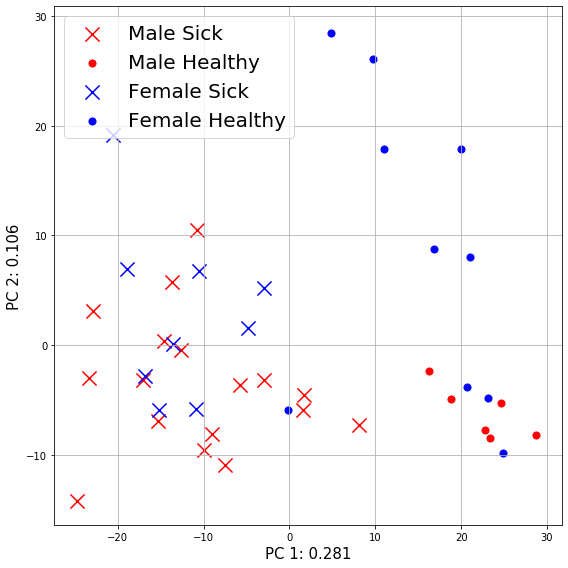

In [4]:
finalDf_gender = pd.concat([principalDf, merged_data[['PARAM_GENDER']], merged_data[['Group']]], axis = 1)

#double check to see proportion of sick vs healthy by sex of mice 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1: {}'.format(round(pca.explained_variance_ratio_[0],3)), fontsize = 15)
ax.set_ylabel('PC 2: {}'.format(round(pca.explained_variance_ratio_[1],3)), fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)

PARAM_GENDERS = ['M','M','F','F']
PARAM_GROUP = ['S','H','S','H']
Groups = ['Male Sick','Male Healthy','Female Sick','Female Healthy']

colors = ['r', 'r','b','b']
markers = ['x','.', 'x', '.']

for i in range(len(Groups)):
    Gender = PARAM_GENDERS[i]
    Group = PARAM_GROUP[i]
    Color = colors[i]
    Marker = markers[i]
    
    indicesToKeep = (finalDf_gender['PARAM_GENDER'] == Gender)&(finalDf_gender['Group'].str.contains(Group))
    ax.scatter(finalDf_gender.loc[indicesToKeep, 'principal component 1']
               , finalDf_gender.loc[indicesToKeep, 'principal component 2']
               , c = Color
               , s = 200
               , marker = Marker
               , label = Groups[i])
ax.legend(prop={'size':20})
ax.grid()
plt.tight_layout()
plt.savefig('../processed/PCA_2d_Gender_SickvsHealthy.png')

In [5]:
principalComponents.shape

(43, 2)

### Fig 2
Similar to the previous graph, there is clear separation and group between the sick and healthy mice. The sick mice as shown by the x-shaped markers group to the bottom left, where as the healthy mice as shown by the dots group towards the right. There appears to be no strong grouping by sex, there is slight grouping with healthy male mice on the bottom right. 

# 3D PCA Visualization

In [6]:
pca3d.explained_variance_ratio_

array([0.28085053, 0.10605596, 0.0711923 ])

In [7]:
principalDf_3d = pd.DataFrame(data = principalComponents_3d,
                           columns = ['PC 1',
                                      'PC 2',
                                     'PC 3'])


In [8]:
#PCA Analysis
finalDf3d_gender = pd.concat([principalDf_3d, merged_data[['PARAM_GENDER']], merged_data[['Group']]], axis = 1)
finalDf3d_gender.head()


PC 1      PC 2      PC 3 PARAM_GENDER  Group
0  16.233331 -2.375180 -7.967360            M  EH_WT
1  16.860422  8.804163  3.027710            F  EH_WT
2  22.786636 -7.776677 -4.460680            M  EH_WT
3  -0.159236 -5.954846 -0.553838            F  EH_WT
4  -4.770076  1.571617 -3.923777            F  ES_WT

C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


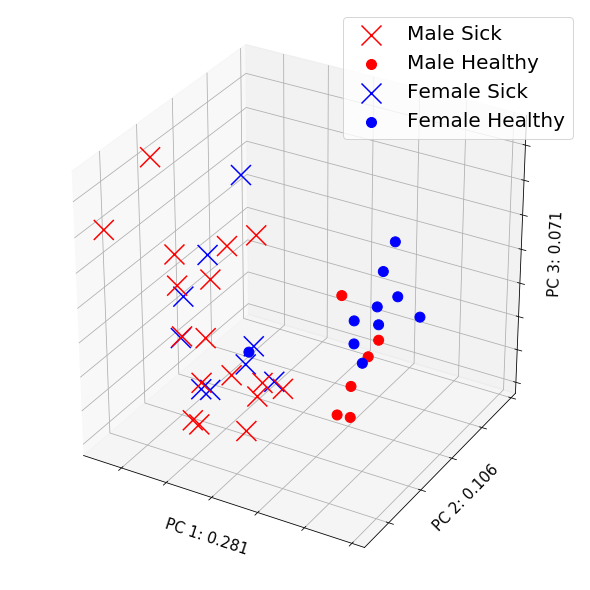

In [9]:
#double check to see proportion of sick vs healthy by sex of mice 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.set_xlabel('PC 1: {}'.format(round(pca3d.explained_variance_ratio_[0],3)), fontsize = 15)
ax.set_ylabel('PC 2: {}'.format(round(pca3d.explained_variance_ratio_[1],3)), fontsize = 15)
ax.set_zlabel('PC 3: {}'.format(round(pca3d.explained_variance_ratio_[2],3)), fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)

PARAM_GENDERS = ['M','M','F','F']
PARAM_GROUP = ['S','H','S','H']
Groups = ['Male Sick','Male Healthy','Female Sick','Female Healthy']

colors = ['r', 'r','b','b']
markers = ['x','.', 'x', '.']

for i in range(len(Groups)):
    Gender = PARAM_GENDERS[i]
    Group = PARAM_GROUP[i]
    Color = colors[i]
    Marker = markers[i]
    
    indicesToKeep = (finalDf3d_gender['PARAM_GENDER'] == Gender)&(finalDf3d_gender['Group'].str.contains(Group))
    ax.scatter(finalDf3d_gender.loc[indicesToKeep, 'PC 1'], finalDf3d_gender.loc[indicesToKeep, 'PC 2'],
               finalDf3d_gender.loc[indicesToKeep, 'PC 3']
               , c = Color
               , s = 400
               , marker = Marker
               , label = Groups[i], alpha=1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.legend(prop={'size':20})#,bbox_to_anchor=(1.3,1.05))
ax.grid()
# ax.view_init(45,45)
plt.tight_layout()
plt.savefig('../processed/PCA_3d_Gender_SickvsHealthy.png')
plt.show()


# Visualizing by Age 

The points seem evenly distributed and no clear grouping is found amongst the data. The purpose of investigating age was to explore whether it may be a confounding variable.

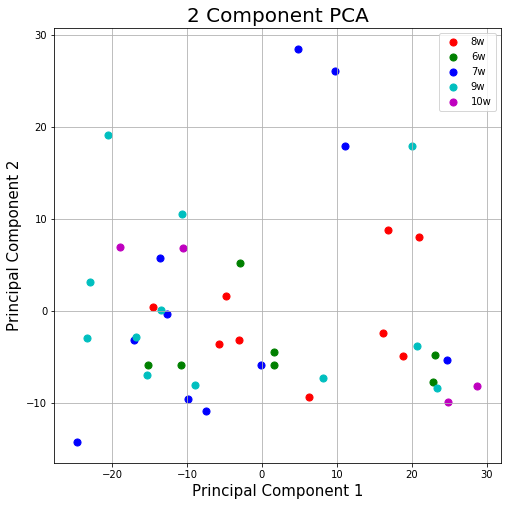

In [10]:
#CATAGORIZING BY AGE
finalDf_age = pd.concat([principalDf, merged_data[['PARAM_AGE']]], axis = 1)
#Plotting
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

PARAM_AGES = ['8w',  '6w',  '7w',  '9w',  '10w']
colors = ['r', 'g', 'b', 'c' , 'm', 'y', 'k']
for PARAM_AGE, color in zip(PARAM_AGES,colors):
    indicesToKeep = finalDf_age['PARAM_AGE'] == PARAM_AGE
    ax.scatter(finalDf_age.loc[indicesToKeep, 'principal component 1']
               , finalDf_age.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(PARAM_AGES)
ax.grid()

### Fig 3
No clear grouping is founded based off of the age of mice , illustrating that age by week does not appear to have a strong effect on the metabolomic profiles of sick vs healthy mice. 

# Visualizing by Year of Data Collection

We wanted to see if there were any batch effects that may have incluenced our metabolimic data analysis. The points seem evenly distributed and no clear grouping is found amongst the data. 

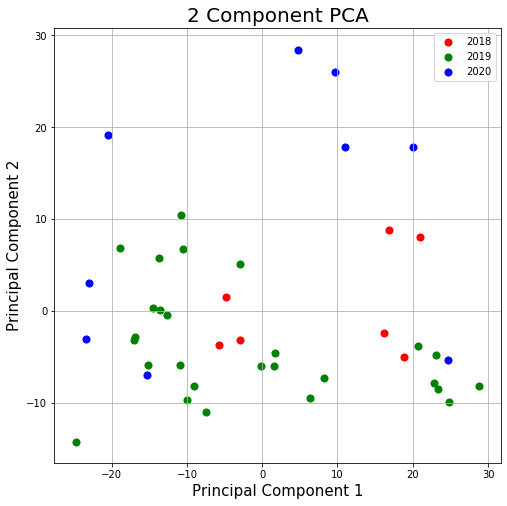

In [11]:
#CATAGORIZING BY YEAR OF DATA COLLECTION
finalDf_year = pd.concat([principalDf, merged_data[['year']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

years = [2018, 2019, 2020]

colors = ['r', 'g', 'b']
for year, color in zip(years,colors):
    indicesToKeep = finalDf_year['year'] == year
    ax.scatter(finalDf_year.loc[indicesToKeep, 'principal component 1']
               , finalDf_year.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(years)
ax.grid()

### Figure 4
No clear grouping is founded based off of the age of mice , illustrating that age by week does not appear to have a strong effect on the metabolomic profiles of sick vs healthy mice. 



## HPI Sacced 
No clear grouping was observed when exploring hours post infection (HPI) in the PCA, suggesting that there was no clear correlation. Only the sick mice were examined to determine its relationship with mice's metabolomic profiles, as the healthy mice were sacced at designated time points. 

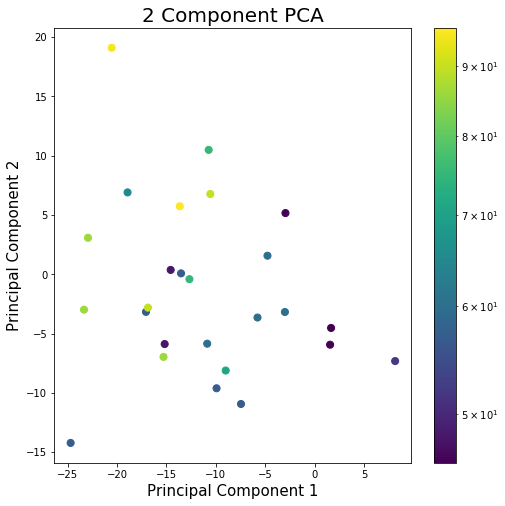

In [12]:
#CATAGORIZATION BY HPI SACCED
finalDf_HPI = pd.concat([principalDf, merged_data[['HPI.Sacced','Group']]], axis = 1)
Group = list(finalDf_HPI['Group'])
indices = [i for i, x in enumerate(Group) if x == "ES_WT" or x == "LS_WT" or x == "ES_KO" or x == "LS_KO"]
sick = finalDf_HPI.iloc[indices,]
#HPI.Sacced
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.scatter(sick['principal component 1']
            , sick['principal component 2']
            , c = sick['HPI.Sacced']
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

### Fig 5
The HPI is indiciated by the color of each point, where purple represents a lower number of hours post infection and yellow represents a higher number of hours post infection. Overall, the above graph shows no clear grouping, suggesting that HPI shows no clear relationship with the metabolomic profile of each mouse. 

## Liver CFU

PCA illustrates clear grouping amogst low Liver CFU and high Liver CFU counts. For certain years, the CFU was not collected and where therefore neglected for the sake of the analysis. In the graph, purple represents a lower CFU while green represents a higher CFU as graphed on a logorithmic scale 

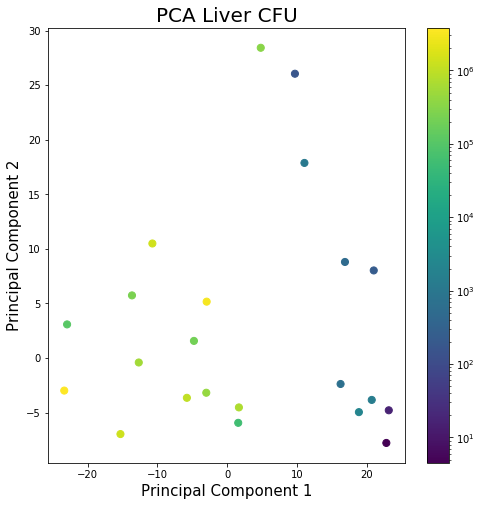

In [13]:
#CATAGORIZATION BY LIVER CFU
finalDf_CFU = pd.concat([principalDf, merged_data[['Liver_CFU']]], axis = 1)
finalDf_CFU = finalDf_CFU[~finalDf_CFU.Liver_CFU.str.contains("-")]
#plotting 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Liver CFU', fontsize = 20)

plt.scatter(finalDf_CFU['principal component 1']
            , finalDf_CFU['principal component 2']
            , c = finalDf_CFU['Liver_CFU'].astype(float)
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

### Fig 6
The above graph illustrates clear grouping amogst low Liver CFU and high Liver CFU counts, where low counts are shown in purple and higher counts are yellow. For certain years, the CFU was not collected and where therefore neglected for the sake of the analysis. The grouping also coincides and aligns with the lab-given labels of "sick" and "healthy," as one would expect (i.e. higher liver CFU mice are more sick and lower CFU mice are less sick). 


## Visualization
The Temperature is also used a metric of clinical data to segregat the data. As show in the graph below there is clear grouping of temperature, where a higher temperature is represented in green and a lower temperature is represented in purple. Notably, the CFU and Temp seem to group in such a way that aligns with sick vs healthy mice. 

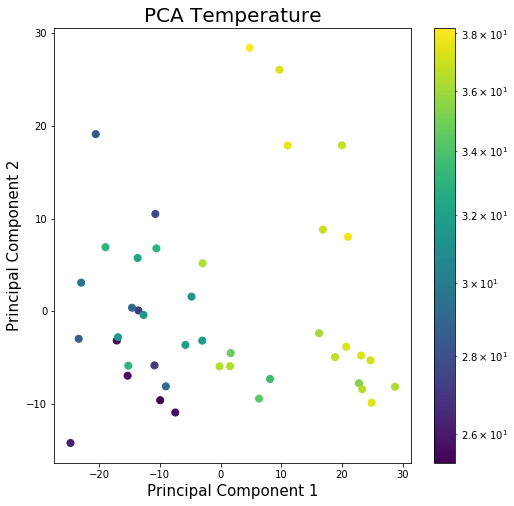

In [14]:
#CATAGORIZATION BY TEMPERATURE
finalDf_temp = pd.concat([principalDf, merged_data[['Final.Temp']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Temperature', fontsize = 20)

plt.scatter(finalDf_temp['principal component 1']
            , finalDf_temp['principal component 2']
            , c = finalDf_temp['Final.Temp']
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

### Fig 7
The above graph illustrates clear grouping amogst low temperature and high temperature mice prior to death, where low temperatures are shown in purple and higher temperatures are yellow. The grouping also coincides and aligns with the lab-given labels of "sick" and "healthy," as one would expect (i.e. lower temperature mice are more sick and higher temperature mice are less sick). 




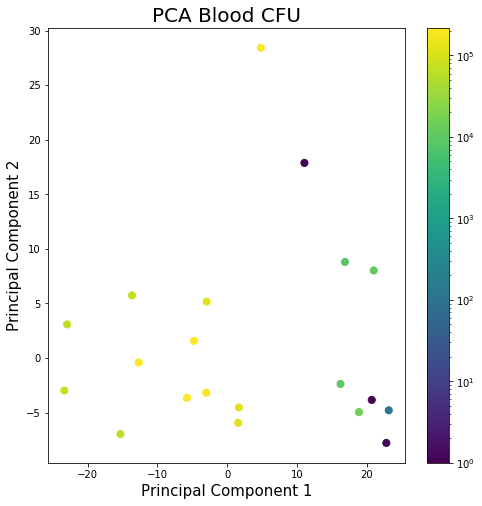

principal component 1  principal component 2 Blood CFU
0               16.233331              -2.375198      9250
1               16.860422               8.804171      8000
2               22.786636              -7.776650         1
4               -4.770076               1.571596    210750
5                1.571590              -5.934073    117500
8               -2.948191               5.167659    125000
14              11.056055              17.877191         1
16             -12.672735              -0.405143    192000
17             -13.644011               5.741097     73500
21             -15.295720              -6.962941     59200
22              18.857116              -4.952847     15200
23              20.983654               8.027769     10800
24              23.136886              -4.784773       125
25              -3.003573              -3.177133    192500
26               1.670392              -4.521734    117500
29              -5.780032              -3.642456    217600
33              20.696754              -3.835300         1
36               4.800212              28.427175    200000
41             -23.347458              -2.979015     76000
42             -22.940631               3.083246     62400

In [15]:
#CATAGORIZATION BY LIVER CFU
finalDf_blood_CFU = pd.concat([principalDf, CFUs_merged[['Blood CFU']]], axis = 1)
finalDf_blood_CFU = finalDf_blood_CFU[~finalDf_blood_CFU['Blood CFU'].str.contains("–")]
finalDf_blood_CFU.loc[finalDf_blood_CFU['Blood CFU'] == "0",'Blood CFU'] = "1"
finalDf_blood_CFU

#plotting 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Blood CFU', fontsize = 20)

plt.scatter(finalDf_blood_CFU['principal component 1']
            , finalDf_blood_CFU['principal component 2']
            , c = finalDf_blood_CFU['Blood CFU'].astype(int)
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()
finalDf_blood_CFU

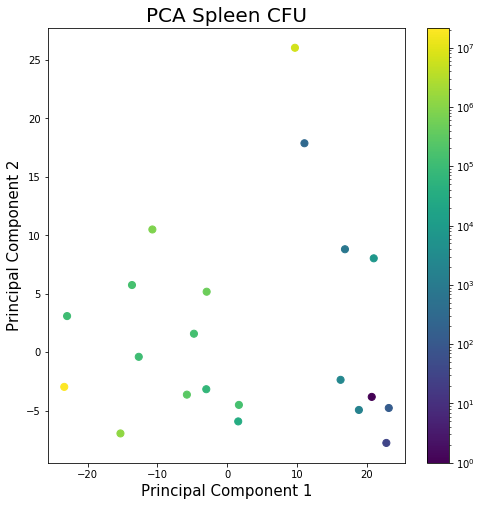

principal component 1  principal component 2 Spleen CFU
0               16.233331              -2.375198       2404
1               16.860422               8.804171        803
2               22.786636              -7.776650         32
4               -4.770076               1.571596     136674
5                1.571590              -5.934073      31390
8               -2.948191               5.167659     475059
14              11.056055              17.877191        296
15               9.695369              26.049121    6666667
16             -12.672735              -0.405143     114943
17             -13.644011               5.741097     151131
21             -15.295720              -6.962941    1336000
22              18.857116              -4.952847       1775
23              20.983654               8.027769       7407
24              23.136886              -4.784773        127
25              -3.003573              -3.177133      69686
26               1.670392              -4.521734     150943
29              -5.780032              -3.642456     292398
33              20.696754              -3.835300          1
38             -10.723704              10.496752     810680
41             -23.347458              -2.979015   21463023
42             -22.940631               3.083246     111794

In [16]:
#CATAGORIZATION BY LIVER CFU
finalDf_Spleen_CFU = pd.concat([principalDf, CFUs_merged[['Spleen CFU']]], axis = 1)
finalDf_Spleen_CFU = finalDf_Spleen_CFU[~finalDf_Spleen_CFU['Spleen CFU'].str.contains("–")]
finalDf_Spleen_CFU.loc[finalDf_Spleen_CFU['Spleen CFU'] == "0",'Spleen CFU'] = "1"


#plotting 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Spleen CFU', fontsize = 20)

plt.scatter(finalDf_Spleen_CFU['principal component 1']
            , finalDf_Spleen_CFU['principal component 2']
            , c = finalDf_Spleen_CFU['Spleen CFU'].astype(int)
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()
finalDf_Spleen_CFU

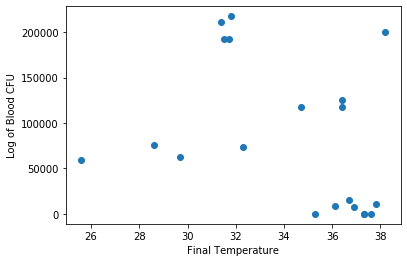

In [17]:
df_CFUs = CFUs_merged[~CFUs_merged['Blood CFU'].isin(['–'])]
x_temp = df_CFUs[['Final.Temp']]
y_CFU = np.array(df_CFUs['Blood CFU'].astype(float))
plt.scatter(x_temp,y_CFU)

plt.xlabel('Final Temperature') 
plt.ylabel('Log of Blood CFU')
plt.show()


C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  


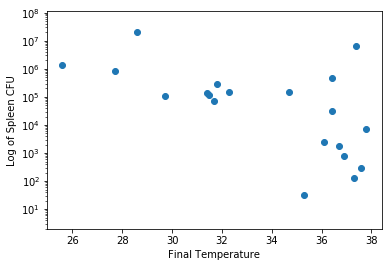

In [18]:
df_CFUs = CFUs_merged[~CFUs_merged['Spleen CFU'].isin(['–'])]
x_temp = df_CFUs[['Final.Temp']]
y_CFU = np.array(df_CFUs['Spleen CFU'].astype(float))
plt.scatter(x_temp,y_CFU)
plt.yscale("log")
plt.ylim(10^8,0)
plt.xlabel('Final Temperature') 
plt.ylabel('Log of Spleen CFU')
plt.show()

## Vizualizing the Relationship Between Temperature and Liver CFU
There appears to be a generally weak correlation between temperature and Liver CFU. Below is a plot of temperature which is show on the x axis and the log of the Liver CFU on the y axis. No clear linear relationship is observed, however there appear to be a cluster of low CFU mice at high temperatures and higher CFU with a few low temperature mice. 

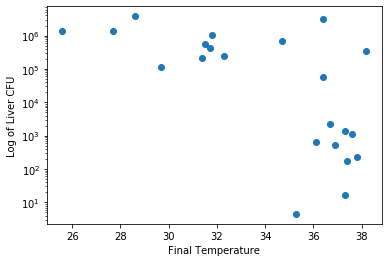

22

In [19]:
df_CFU = merged_data[~merged_data['Liver_CFU'].isin(['-'])]
x_temp = df_CFU[['Final.Temp']]
y_CFU = np.array(df_CFU['Liver_CFU'].astype(float))
plt.scatter(x_temp,y_CFU)
plt.yscale("log")
plt.xlabel('Final Temperature') 
plt.ylabel('Log of Liver CFU')
plt.show()
len(x_temp)

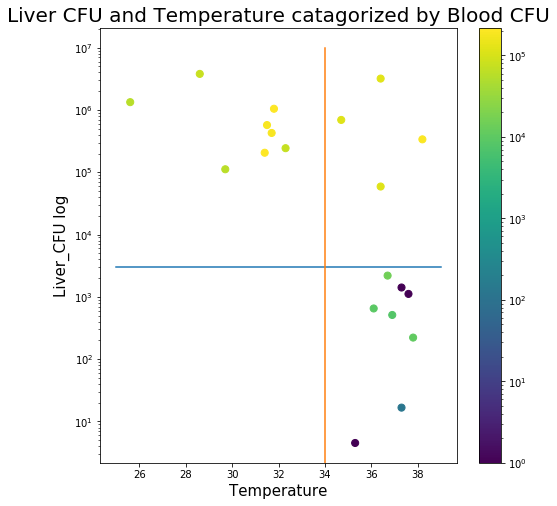

In [20]:

df_temp_cfus = pd.concat([CFUs_merged['Final.Temp'],CFUs_merged['Liver_CFU'], CFUs_merged['Blood CFU']], axis =1)
df_temp_cfus = df_temp_cfus[~df_temp_cfus['Blood CFU'].isin(['–'])]
df_temp_cfus = df_temp_cfus[~df_temp_cfus['Liver_CFU'].isin(['–'])]
df_temp_cfus.loc[df_temp_cfus['Blood CFU'] == '0', 'Blood CFU'] = '1'
df_temp_cfus.loc[df_temp_cfus['Liver_CFU'] == '0', 'Liver_CFU'] = '1'

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Temperature', fontsize = 15)
ax.set_ylabel('Liver_CFU log', fontsize = 15)
ax.set_title('Liver CFU and Temperature catagorized by Blood CFU', fontsize = 20)

plt.scatter(df_temp_cfus[['Final.Temp']]
            , np.array(df_temp_cfus['Liver_CFU'].astype(float))
            , c = df_temp_cfus['Blood CFU'].astype(float)
            , s = 50
            , cmap = 'viridis'
            , norm = matplotlib.colors.LogNorm())
plt.yscale("log")
x_cord = [25,39]
y_cord = [3000,3000]
plt.plot(x_cord, y_cord)
x_cord2 = [34,34]
y_cord2 = [0,10000000]
plt.plot(x_cord2,y_cord2)
plt.colorbar()
plt.show()

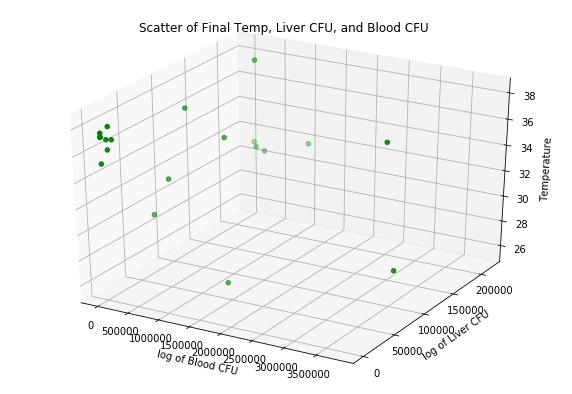

In [21]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

 
# Creating dataset
z = df_temp_cfus[['Final.Temp']]
x = np.array(df_temp_cfus['Liver_CFU'].astype(float))
y = df_temp_cfus['Blood CFU'].astype(float)
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('log of Blood CFU', fontsize = 10)
ax.set_ylabel('log of Liver CFU', fontsize = 10)
ax.set_zlabel('Temperature', fontsize = 10)

# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Scatter of Final Temp, Liver CFU, and Blood CFU ")
#plt.yscale("log")
#plt.xscale("log")

# show plot
plt.show()

### Identify Groups within Blood CFU, Liver CFU, and temperatures
In the above figure, there appear to be three groups that arise. The bottom right quadrant is low temp with low liver and low blood CFU. The top right is high liver CFU, high temp, high liver CFU, and high blood CFU. The top left is low temp, high liver CFU, and high blood CFU. The Cut off for low/high blood CFU is roughly 3,000 (highest CFU of healthy moust is about 2195 CFU), and the cut off for high temp is 35 degrees C. The color bar indicates blood CFU level 


## Figure 8
The above graph shows a relatively weak negative correlation between liver CFU and final temperature. In general, as temperature decreases, Liver CFU increases. No clear linear relationship was observed 

# Multiple Linear Regression Analysis

Multiple Linear Regression is a predictive model that utilizes explanatory variables, in this case the metabolomic profile of the mice, to determine the response variable, which in this case is the temperature and Liver CFU. Using Liver CFU and temperature as our clinical outcomes and metrics for the degree of "sickness" of each mouse, the model helps us visualize how well they can be predicted by the metabolic profiles.   

## Final Temperature
The first clinical outcome investigated was the temperature of the mouse prior to death. A modeling function was used the fit the model to the data and a predicted temperature (yaxis) was plotted against the actual temperature to assess the accuracy of the model.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
#DATA WITH TREATED
#merged_data = pd.read_csv("../raw/final_merged_treatments_jeren.csv")
merged_data = merged_data.drop(['Unnamed: 0'], axis = 1)
metabolites = [col for col in merged_data.columns if 'X' in col]
metabolites2 = [x[1:] for x in metabolites]
# separating out features
df_features = merged_data.loc[:, metabolites]


In [23]:
# Define numeric array of features
x = np.array(df_features)
# Standardizing the features
x = StandardScaler().fit_transform(x)
# Define target matrix (ie Final temp of mouse)
y = np.array(merged_data['Final.Temp'])
print([x.shape, y.shape])
# Assemble feature dataframe with updated metabolite info and standardized
# numeric values
df_metabss = pd.DataFrame(data = x, columns = metabolites2)
df_metabss.head()


[(43, 917), (43,)]


100002945  100002356  100009062  100020727  100003926  100009271  \
0  -0.775438  -0.558323  -0.650191  -0.784096  -1.185705  -0.987625   
1  -0.598332  -0.479257  -0.650191  -0.784096  -1.092017  -0.934880   
2  -1.263155  -0.832636  -0.650191  -0.784096  -0.852976  -0.826819   
3   0.766163   0.474833  -0.650191  -0.784096   0.080020  -0.415049   
4   0.459594   0.205277  -0.650191  -0.696850   0.114559  -0.635674   

   100006374  100008903  100009217  100000657  ...  100002913  100001394  \
0  -0.465027   0.816521   0.265913  -0.042247  ...  -0.345345  -0.737253   
1   1.383910  -1.299356  -1.051650  -0.239717  ...   0.760817   0.720940   
2  -0.465027  -0.200112  -0.856850  -1.350428  ...   0.054509   0.063249   
3  -0.465027  -1.256118  -0.525107  -0.015261  ...  -0.474974  -0.068014   
4  -0.465027  -0.177966   0.469666   1.611612  ...  -0.474974   0.276724   

   100001451       566  100003640  100003641  100003210      1004  100000299  \
0   0.007796 -1.119767   0.337977  -0.086738  -0.332015 -0.517328  -0.024135   
1   0.782838 -0.602812  -0.608285  -0.869704   0.537965  0.169602   0.303545   
2  -0.015092 -1.521816   0.004800  -0.308368  -1.097795 -0.271885   0.709528   
3  -0.192958 -0.898251  -1.200654  -1.028347  -0.391004 -0.634021  -0.917512   
4   0.375047 -0.347352   1.725433   0.323002   0.152599  1.456332   2.865565   

   100000015  
0   0.737817  
1  -0.028945  
2  -0.325483  
3  -0.504011  
4  -1.116452  

[5 rows x 917 columns]

In [24]:
# Begin Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)


#Dataframe of Coeffs and Intercepts 
#print(metabss.columns.shape)
#print(np.transpose(model.coef_).shape)




(917,)


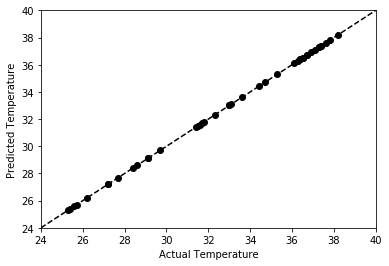

In [25]:
#plotting 
plt.figure()
plt.scatter(y, y_pred,  color='black')
plt.xlabel('Actual Temperature') 
plt.ylabel('Predicted Temperature')
# plot diagonal identity line
x=np.linspace(24,40,100)
plt.xlim(24,40)
plt.ylim(24,40)
plt.plot(x,x,'k--')
plt.show()

### Fig 9
The Predicted vs Actual Temperature graph shows a clear linear relationship. Given that the line appears particularly linear, there were concerns that the model may be overfitting the data. As expected, with 917 predictors, there will be high fidelity between predicted temps and actual temps, i.e. overfitting. A train-test split was conducted to validate the accuracy of the model. 

In [26]:
linearreg_data = pd.DataFrame(data={'metabolite': df_metabss.columns})
linearreg_data['coef'] = np.transpose(model.coef_)
linearreg_data.sort_values(by='coef',ascending=False).head()

metabolite      coef
318  100000008  0.102958
21   100004442  0.101166
880       1248  0.083168
465       1052  0.083020
445  100001295  0.079912

# Train Test Split
The train test split randomly generates two groups from the sample of interest, where the first group's data is used to fit the model, while the second group's data is applied to the model to assess its accuracy. Ultimately, the objective the train test split is to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.


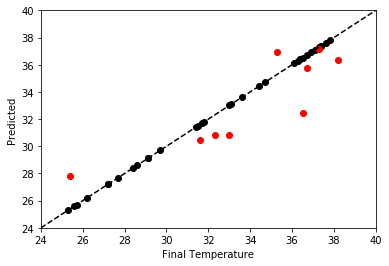

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

#split test
x = df_metabss.values
y = np.array(merged_data['Final.Temp'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)

#Plot Trained
plt.scatter(y_train, y_pred_train,  color='black')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')

#Plot Test
y_pred_test = model.predict(x_test)
plt.scatter(y_test, y_pred_test,  color='red')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')
# plot diagonal identity line
x=np.linspace(24,40,100)
plt.xlim(24,40)
plt.ylim(24,40)
plt.plot(x,x,'k--')
plt.show()

### Fig 10
Overall, the train test split shows that the model appears to have a maintain a good predictive performance in spite of a reduced training set. The black dots represent points used to model and fit the data, whereas the red dots represent the "second group" of data points used to test and estimate the model's performance. The test sample, however, appears to be less accurate as the temperature decreases as the red points appear further and further away from the line formed by the black dots. 

## Final temperature: Univariate Correlation Feature Selection 
 
Univariate correlation feature selection was used to identify specific metabolites that contribute the most to the predictive model. Correlation feature selection pinpoints the variables(in this case specific metabolites) with the highest correlation coefficients and therefore the metabolites that contribute the most to predicting the clincial feature (which in this case is temperature). 


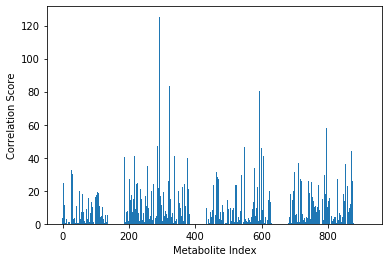

In [28]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression

#Creating target variable
y = np.array(merged_data['Final.Temp'])
#Creat feature varialbes (metabolites)
x = np.array(df_metabss)
#Fitting data into model and transforming, while selecting largest k values with f_regression as score function 
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x,y)
Feature_corr = pd.DataFrame(data={'metabolite': np.ravel(df_metabss.columns), 
                                   'feature': fs.scores_})
#plot the scores
plt.figure()
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xlabel('Metabolite Index')
plt.ylabel('Correlation Score')
plt.show()


### Fig 11 A
The above graph plots the metabolite number (as shown by the x-axis) and the feature score (as shown in the y axis). The peaks represent metabolites with particularly high feature scores. A higher feature score indicates that the variable contributes more to accurately predicting the desired clinical outcome.  


In [29]:
#Renaming metabolite column
Feature_corr.rename(columns={'metabolite':'CHEMICAL ID'}, inplace=True)
#Merging Dataframes
names['CHEMICAL ID']=names['CHEMICAL ID'].astype(str)
feature_table = pd.merge(Feature_corr, names)
#Renaming and organizing by descending order
feature_table.rename(columns={'feature':'feature_corrVal'}, inplace=True)
feature_table = feature_table[['BIOCHEMICAL','CHEMICAL ID','feature_corrVal']].sort_values(by='feature_corrVal',ascending=False)
feature_table.head(20)

BIOCHEMICAL CHEMICAL ID  feature_corrVal
292          alpha-hydroxyisovalerate   100001300       125.331930
182           2S,3R-dihydroxybutyrate   100002284        97.917767
155        2-hydroxy-3-methylvalerate   100001541        97.838397
141          2,3-dihydroxyisovalerate   100002417        86.085153
322           beta-hydroxyisovalerate        1442        83.609523
221                 3-hydroxysuberate   100001143        82.642781
593             myristoleate (14:1n5)   100001198        80.569884
604       N-acetyl-1-methylhistidine*   100004299        77.726242
639                    N-acetylvaline        1084        76.180574
472             glycerophosphoserine*   100015666        74.160582
291          alpha-hydroxyisocaproate   100000706        71.935220
622                   N-acetylglycine   100001006        71.258912
8    1,2-dilinoleoyl-GPE (18:2/18:2)*   100009217        69.813658
625                N-acetylisoleucine   100001276        68.300619
260                 7,8-dihydrofolate         173        65.670418
471    glycerophosphorylcholine (GPC)   100000269        63.060632
4       (R)-3-hydroxybutyrylcarnitine   100003926        62.692158
279                           adipate   100000863        61.862150
910                            valine         566        61.629121
194       3-hydroxy-3-methylglutarate         112        61.195288

### Fig 11 B
The above table presents the 20 metabolites with the highest Feature scores. The table includes the chemical ID number, feature score, and its corresponding biochemical name. 

## Final temperature: Multiple Linear Regression (revisited)
Now, we want to see whether we can obtain a strong predictive model of final temperature using a reduced set of metabolites. So, we created a Multiple Linear Regression Model using only the 20 metabolites with the highest feature selection score to determine how well the metabolites correlate and predict the desired clinical outcome (temperature).

In [30]:
# Define number of metabolites to use for the regression
num_metabs = 20
chosenMetabChemID = feature_table['CHEMICAL ID'].values[:num_metabs]
print(chosenMetabChemID)
print(len(chosenMetabChemID))

#Plotting Extremes
y = np.array(merged_data['Final.Temp'])
print(y.shape)
x = np.array(df_metabss.loc[:,chosenMetabChemID])
print(x.shape)



['100001300' '100002284' '100001541' '100002417' '1442' '100001143'
 '100001198' '100004299' '1084' '100015666' '100000706' '100001006'
 '100009217' '100001276' '173' '100000269' '100003926' '100000863' '566'
 '112']
20
(43,)
(43, 20)


In [31]:
#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)



(20,)


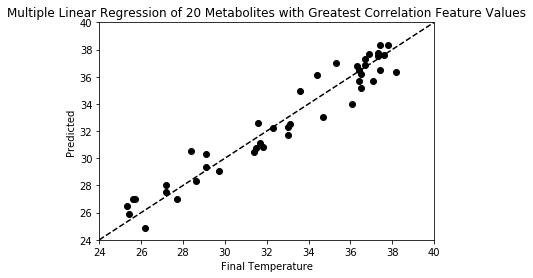

In [32]:
#plotting 
plt.scatter(y, y_pred,  color='black')
plt.title('Multiple Linear Regression of 20 Metabolites with Greatest Correlation Feature Values')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')
# plot diagonal identity line
x=np.linspace(24,40,100)
plt.xlim(24,40)
plt.ylim(24,40)
plt.plot(x,x,'k--')
plt.show()

### Fig 12
The graph plots the predicted temperature (y) and the actual final temperature of the mice in C (x). As shown in the graph above, the multiple linear regression model shows a clear linear relationship. The blue line delineates and emphasizes the linear relationship. This means that we have strong predictive performance of temperature using 20 of the 917 metabolites

## Final temperature: LASSO
Lasso is supervised regression analysis tool selection tool that performs both regularization and feature selection. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients. Hence, LASSO is very conservative when it comes to ruling in metabolites into the model it constructs. Ultimately, LASSO identifies metabolites that are particuarly useful for predicting the clinical data. 

In [33]:
#LASSO Analysis 
# Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
#Defining Variables:
y = np.array(merged_data['Final.Temp'])
x = np.array(df_metabss)

In [34]:
#Test Split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)
#Pipeline Scaling
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
#Optimize alpha-hyperparameter
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )
#Fit the grid search
search = search.fit(x,y)
#Get best alpha
search_alpha = search.best_params_
#Finding important features
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)


In [35]:
#Largest from Lasso
df_lasso = pd.DataFrame({'CHEMICAL ID':df_metabss.columns,'Coeff':coefficients,'Imp':importance})
df_lasso = pd.merge(df_lasso, names)
lasso_top = df_lasso[df_lasso['Imp']>0].sort_values(by='Imp',ascending=False)
print(lasso_top.shape)
lasso_top

(17, 8)


CHEMICAL ID     Coeff       Imp                           BIOCHEMICAL  \
291   100000706 -0.860373  0.860373              alpha-hydroxyisocaproate   
322        1442 -0.793202  0.793202               beta-hydroxyisovalerate   
623   100001293 -0.740355  0.740355                     N-acetylhistidine   
141   100002417 -0.739080  0.739080              2,3-dihydroxyisovalerate   
8     100009217 -0.355032  0.355032      1,2-dilinoleoyl-GPE (18:2/18:2)*   
605   100021760 -0.321177  0.321177               N-acetyl-2-aminoadipate   
441   100001485 -0.217288  0.217288             gamma-glutamylisoleucine*   
851   100021220 -0.195388  0.195388                      succinoyltaurine   
632         192 -0.156932  0.156932                    N-acetylputrescine   
699   100005996 -0.095153  0.095153  octadecenedioylcarnitine (C18:1-DC)*   
610   100021696 -0.077611  0.077611  n-Acetyl-s-(2-hydroxypropyl)cysteine   
243   100002390 -0.074069  0.074069              4-methylbenzenesulfonate   
889         565  0.037632  0.037632                            tryptophan   
446        1102  0.033124  0.033124                gamma-glutamyltyrosine   
465        1052  0.031926  0.031926                             glycerate   
215   100019801 -0.027528  0.027528              3-hydroxyoleoylcarnitine   
279   100000863 -0.000608  0.000608                               adipate   

    SUPER PATHWAY                                        SUB PATHWAY  COMP ID  \
291    Amino Acid          Leucine, Isoleucine and Valine Metabolism    22132   
322    Amino Acid          Leucine, Isoleucine and Valine Metabolism    12129   
623    Amino Acid                               Histidine Metabolism    33946   
141   Xenobiotics                               Food Component/Plant    38276   
8           Lipid                      Phosphatidylethanolamine (PE)    53174   
605    Amino Acid                                  Lysine Metabolism    63920   
441       Peptide                          Gamma-glutamyl Amino Acid    34456   
851    Amino Acid   Methionine, Cysteine, SAM and Taurine Metabolism    63678   
632    Amino Acid                               Polyamine Metabolism    37496   
699         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Dicarbo...    61865   
610   Xenobiotics                                           Chemical    64180   
243   Xenobiotics                                           Chemical    43592   
889    Amino Acid                              Tryptophan Metabolism       54   
446       Peptide                          Gamma-glutamyl Amino Acid     2734   
465  Carbohydrate  Glycolysis, Gluconeogenesis, and Pyruvate Meta...     1572   
215         Lipid    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    61840   
279         Lipid                          Fatty Acid, Dicarboxylate    21134   

            PLATFORM  
291        LC/MS Neg  
322      LC/MS Polar  
623  LC/MS Pos Early  
141      LC/MS Polar  
8     LC/MS Pos Late  
605  LC/MS Pos Early  
441  LC/MS Pos Early  
851      LC/MS Polar  
632  LC/MS Pos Early  
699   LC/MS Pos Late  
610        LC/MS Neg  
243        LC/MS Neg  
889  LC/MS Pos Early  
446  LC/MS Pos Early  
465      LC/MS Polar  
215   LC/MS Pos Late  
279      LC/MS Polar

LASSO identified 17 metabolites as being particularly important to predict final temperature. Let's see the predictive performance now of the LASSO model.

## Final temperature: Multiple Linear Regression via Lasso

In [36]:
# Define number of metabolites to use for the regression
chosenMetabChemID2= lasso_top['CHEMICAL ID']
#Plotting Extremes
y = np.array(merged_data['Final.Temp'])
print(y.shape)
x = np.array(df_metabss.loc[:,chosenMetabChemID2])
print(x.shape)

(43,)
(43, 17)


In [37]:
#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)

(17,)


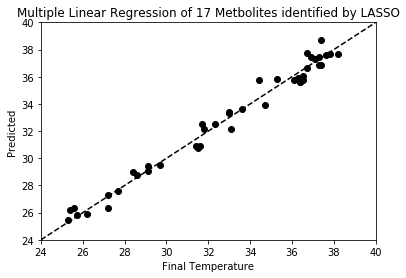

In [38]:
#plotting 
plt.scatter(y, y_pred,  color='black')
plt.title('Multiple Linear Regression of 17 Metbolites identified by LASSO')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')
# plot diagonal identity line
x=np.linspace(24,40,100)
plt.xlim(24,40)
plt.ylim(24,40)
plt.plot(x,x,'k--')
plt.show()

LASSO has great predictive power of final temperature using only 17 metabolites.

## Final temperature: Identifying Pathways 

While it's important to know what metabolites are important for predicting final temperatures, it is also important to infer the pathways that these metabolites belong to and are differentially regulated across temperatures.

After using correlation feature selection and LASSO to identify specific metabolites, the pathways each metabolite is involved in was determined by referencing the discriptions from the metabolomics data. The pathways from the first method (feature selection) were analyzed first 

In [39]:
# Correlation Feature Selection Pathways
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")
merged_feature = pd.merge(metab_def, feature_table, on='BIOCHEMICAL', how='right').sort_values(by='feature_corrVal',ascending=False)
features_temp_top= merged_feature.head(20)
features_temp_top
#alpha-hydroxyisovalerate and 2-hydroxy-3-methylvalerate are up stream in the BCAA pathway, but the others are unknown 


PATHWAY SORTORDER                       BIOCHEMICAL  \
292              424.0          alpha-hydroxyisovalerate   
182             2033.0           2S,3R-dihydroxybutyrate   
155              395.0        2-hydroxy-3-methylvalerate   
141             4769.0          2,3-dihydroxyisovalerate   
322              363.0           beta-hydroxyisovalerate   
221             1981.0                 3-hydroxysuberate   
593             1526.0             myristoleate (14:1n5)   
604               76.0       N-acetyl-1-methylhistidine*   
639              417.0                    N-acetylvaline   
472             2241.0             glycerophosphoserine*   
291              347.0          alpha-hydroxyisocaproate   
622                2.0                   N-acetylglycine   
8               2452.0  1,2-dilinoleoyl-GPE (18:2/18:2)*   
625              387.0                N-acetylisoleucine   
260             4384.0                 7,8-dihydrofolate   
471             2236.0    glycerophosphorylcholine (GPC)   
4               1919.0     (R)-3-hydroxybutyrylcarnitine   
279             1665.0                           adipate   
908              416.0                            valine   
194             3175.0       3-hydroxy-3-methylglutarate   

              SUPER PATHWAY                                      SUB PATHWAY  \
292              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
182                   Lipid                            Fatty Acid, Dihydroxy   
155              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
141             Xenobiotics                             Food Component/Plant   
322              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
221                   Lipid                          Fatty Acid, Monohydroxy   
593                   Lipid            Long Chain Monounsaturated Fatty Acid   
604              Amino Acid                             Histidine Metabolism   
639              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
472                   Lipid                          Phospholipid Metabolism   
291              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
622              Amino Acid         Glycine, Serine and Threonine Metabolism   
8                     Lipid                    Phosphatidylethanolamine (PE)   
625              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
260  Cofactors and Vitamins                                Folate Metabolism   
471                   Lipid                          Phospholipid Metabolism   
4                     Lipid  Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)   
279                   Lipid                        Fatty Acid, Dicarboxylate   
908              Amino Acid        Leucine, Isoleucine and Valine Metabolism   
194                   Lipid                            Mevalonate Metabolism   

     COMP ID         PLATFORM  CHEMICAL ID_x      RI      MASS  \
292  46537.0      LC/MS Polar    100001300.0  1052.0  117.0557   
182  62950.0      LC/MS Polar    100002284.0  1660.0  119.0350   
155  36746.0        LC/MS Neg    100001541.0  1800.0  131.0714   
141  38276.0      LC/MS Polar    100002417.0  1050.0  133.0506   
322  12129.0      LC/MS Polar         1442.0  1149.8  117.0557   
221  31936.0      LC/MS Polar    100001143.0  3000.0  189.0768   
593  32418.0        LC/MS Neg    100001198.0  5346.9  225.1860   
604  43255.0  LC/MS Pos Early    100004299.0  2100.0  212.1028   
639   1591.0        LC/MS Neg         1084.0  1704.0  158.0823   
472  57404.0      LC/MS Polar    100015666.0  3541.0  258.0384   
291  22132.0        LC/MS Neg    100000706.0  1840.0  131.0714   
622  27710.0      LC/MS Polar    100001006.0  1780.0  116.0353   
8    53174.0   LC/MS Pos Late    100009217.0  2150.0  740.5225   
625  33967.0        LC/MS Neg    100001276.0  2325.0  172.0979   
260   1708.0        LC/MS Neg          173.0  1547.2  442.1481   
471  15

### Fig 12 A
The first table desribes the pathway of each metabolite identified


In [40]:
path_results_fs = features_temp_top['SUB PATHWAY'].value_counts()
pathwayNames_fs = path_results_fs.index.to_list()
path_results_fs

Leucine, Isoleucine and Valine Metabolism          7
Phospholipid Metabolism                            2
Histidine Metabolism                               1
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    1
Food Component/Plant                               1
Long Chain Monounsaturated Fatty Acid              1
Glycine, Serine and Threonine Metabolism           1
Fatty Acid, Dihydroxy                              1
Folate Metabolism                                  1
Fatty Acid, Dicarboxylate                          1
Phosphatidylethanolamine (PE)                      1
Mevalonate Metabolism                              1
Fatty Acid, Monohydroxy                            1
Name: SUB PATHWAY, dtype: int64

### Figure 12 B
The above table describes the number of metabolites identifed by correlation feature selection that are involved in each pathway. Similar to LASSO, the most common pathway was Leucine, Isoleucine and Valine Metabolism, for which there were four. These metabolites are 2-hydroxy-3-methylvalerate, alpha-hydroxyisovalerate, beta-hydroxyisovalerate, and N-acetylvaline. 

## Final temperature: Visualizing Pathway metabolites
The code block below shows metabolites belonging to the top 3 pathways. For now, deprecating this due to custom functions written downstream of it.

In [41]:
# Choosing to iterate thru the first 3 pathways
num_paths = 3
# Get Temp values of the mouse
x = merged_data['Final.Temp']

for i in range(num_paths):
    # Subset df_lasso into the specific pathway of interest
    metabs = merged_feature[merged_feature['SUB PATHWAY'] == pathwayNames_fs[i]]
    chemIDs = metabs['CHEMICAL ID_y']
    chemIDs = [str(x) for x in chemIDs]
    metabs_names = list(metabs['BIOCHEMICAL'])
    # need to redefine chemIDs with the "X" in metabolon dataset
    chemIDs2 = ['X' + x for x in chemIDs]
    print(chemIDs)
    if want_plots == 1:
        for j in range(len(chemIDs2)):
            metab_ID = chemIDs2[j]
            # Get values of the metabolite levels in the mouse
            metab_level = merged_data[metab_ID]

            # begin plotting of metabolite level vs Temp
            plt.figure()
            plt.scatter(x, metab_level,c='k')
            plt.xlabel('Final Temperature')
            plt.ylabel('Metabolite Concentration')
            title_str = pathwayNames_fs[i] + '\n' + metabs_names[j]
            plt.title(title_str)
            plt.show()
            

['100001300', '100001541', '1442', '1084', '100000706', '100001276', '566', '1082', '376', '397', '100001149', '100020423', '100020425', '111', '100020427', '100001155', '100001452', '100002458', '2054', '100001594', '1161', '100001055', '100015649', '100001393', '100001509', '100005850', '100015648', '100001597', '100009275', '2051']
['100015666', '100000269', '100001620', '100001621', '1026', '100003397', '100001407', '1256', '1220', '267']
['100004299', '355', '100022036', '100001207', '100001051', '100000263', '100001124', '100002204', '100001293', '100001208', '100001668', '100003434', '100002514', '100000042', '100002910', '100002500', '537', '100001204', '354', '100000044']


The same analysis was then conducted with data from LASSO

In [42]:
#Largest from Lasso
df_lasso = pd.DataFrame({'CHEMICAL ID':df_metabss.columns,'Coeff':coefficients,'Imp':importance})
df_lasso = pd.merge(df_lasso, names)
lasso_temp_top = df_lasso[df_lasso['Imp']>0].sort_values(by='Imp',ascending=False)
print(lasso_temp_top.shape)
lasso_temp_top

(17, 8)


CHEMICAL ID     Coeff       Imp                           BIOCHEMICAL  \
291   100000706 -0.860373  0.860373              alpha-hydroxyisocaproate   
322        1442 -0.793202  0.793202               beta-hydroxyisovalerate   
623   100001293 -0.740355  0.740355                     N-acetylhistidine   
141   100002417 -0.739080  0.739080              2,3-dihydroxyisovalerate   
8     100009217 -0.355032  0.355032      1,2-dilinoleoyl-GPE (18:2/18:2)*   
605   100021760 -0.321177  0.321177               N-acetyl-2-aminoadipate   
441   100001485 -0.217288  0.217288             gamma-glutamylisoleucine*   
851   100021220 -0.195388  0.195388                      succinoyltaurine   
632         192 -0.156932  0.156932                    N-acetylputrescine   
699   100005996 -0.095153  0.095153  octadecenedioylcarnitine (C18:1-DC)*   
610   100021696 -0.077611  0.077611  n-Acetyl-s-(2-hydroxypropyl)cysteine   
243   100002390 -0.074069  0.074069              4-methylbenzenesulfonate   
889         565  0.037632  0.037632                            tryptophan   
446        1102  0.033124  0.033124                gamma-glutamyltyrosine   
465        1052  0.031926  0.031926                             glycerate   
215   100019801 -0.027528  0.027528              3-hydroxyoleoylcarnitine   
279   100000863 -0.000608  0.000608                               adipate   

    SUPER PATHWAY                                        SUB PATHWAY  COMP ID  \
291    Amino Acid          Leucine, Isoleucine and Valine Metabolism    22132   
322    Amino Acid          Leucine, Isoleucine and Valine Metabolism    12129   
623    Amino Acid                               Histidine Metabolism    33946   
141   Xenobiotics                               Food Component/Plant    38276   
8           Lipid                      Phosphatidylethanolamine (PE)    53174   
605    Amino Acid                                  Lysine Metabolism    63920   
441       Peptide                          Gamma-glutamyl Amino Acid    34456   
851    Amino Acid   Methionine, Cysteine, SAM and Taurine Metabolism    63678   
632    Amino Acid                               Polyamine Metabolism    37496   
699         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Dicarbo...    61865   
610   Xenobiotics                                           Chemical    64180   
243   Xenobiotics                                           Chemical    43592   
889    Amino Acid                              Tryptophan Metabolism       54   
446       Peptide                          Gamma-glutamyl Amino Acid     2734   
465  Carbohydrate  Glycolysis, Gluconeogenesis, and Pyruvate Meta...     1572   
215         Lipid    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    61840   
279         Lipid                          Fatty Acid, Dicarboxylate    21134   

            PLATFORM  
291        LC/MS Neg  
322      LC/MS Polar  
623  LC/MS Pos Early  
141      LC/MS Polar  
8     LC/MS Pos Late  
605  LC/MS Pos Early  
441  LC/MS Pos Early  
851      LC/MS Polar  
632  LC/MS Pos Early  
699   LC/MS Pos Late  
610        LC/MS Neg  
243        LC/MS Neg  
889  LC/MS Pos Early  
446  LC/MS Pos Early  
465      LC/MS Polar  
215   LC/MS Pos Late  
279      LC/MS Polar

### Fig 13
The table above shows metabolites identified by LASSO. The table includes the chemical ID number and its corresponding biochemical name. 


In [43]:
lasso_metabs = df_lasso[df_lasso['Imp']>0]
path_results = df_lasso[df_lasso['Imp']>0]['SUB PATHWAY'].value_counts()
pathwayNames = path_results.index.to_list()
path_results

Chemical                                                 2
Gamma-glutamyl Amino Acid                                2
Leucine, Isoleucine and Valine Metabolism                2
Histidine Metabolism                                     1
Fatty Acid Metabolism (Acyl Carnitine, Dicarboxylate)    1
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)          1
Food Component/Plant                                     1
Lysine Metabolism                                        1
Tryptophan Metabolism                                    1
Phosphatidylethanolamine (PE)                            1
Glycolysis, Gluconeogenesis, and Pyruvate Metabolism     1
Polyamine Metabolism                                     1
Methionine, Cysteine, SAM and Taurine Metabolism         1
Fatty Acid, Dicarboxylate                                1
Name: SUB PATHWAY, dtype: int64

### Fig 11 A
The first table desribes the pathway of each metabolite identified
### Fig 11 B
The above table describes the number of metabolites identifed by LASSO that are involved in each pathway. Of all the metabolites selected, 2 were involved in Gamma-glutamyl Amino Acid, 2 in BCAA metabolism, and 2 in chemical. 

In [44]:
# Choosing to iterate thru the first 3 pathways
num_paths = 4
# Get Temp values of the mouse
x = merged_data['Final.Temp']

for i in range(num_paths):
    # Subset df_lasso into the specific pathway of interest
    metabs = df_lasso[df_lasso['SUB PATHWAY'] == pathwayNames[i]]
    chemIDs = metabs['CHEMICAL ID']
    metabs_names = list(metabs['BIOCHEMICAL'])
    # need to redefine chemIDs with the "X" in metabolon dataset
    chemIDs2 = ['X' + x for x in chemIDs]
    if want_plots == 1:
        for j in range(len(chemIDs2)):
            metab_ID = chemIDs2[j]
            # Get values of the metabolite levels in the mouse
            metab_level = merged_data[metab_ID]

            # begin plotting of metabolite level vs Temp
            plt.figure()
            plt.scatter(x, metab_level,c='k')
            plt.xlabel('Final Temperature')
            plt.ylabel('Metabolite Concentration')
            title_str = pathwayNames[i] + '\n' + metabs_names[j]
            plt.title(title_str)
            plt.show()



# Figure: 
The above figure creates the scatter plots for each of the metabolites identified in the top pathways found in LASSO. The x axis is the Final Temperatues while the vertical axis is the metabolite concentration. Overall the metabolite that appears to have the strongest correlationship appear to be from the Leucine, Valine, and Isoleucine metabolism. 

# Liver CFU
The second clinical outcome investigated was the liver CFU of each mouse. A modeling function was used the fit the model to the data and a predicted temperature (yaxis) was plotted against the actual temperature to assess the accuracy of the model.

C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Predicted_Liver_CFU')

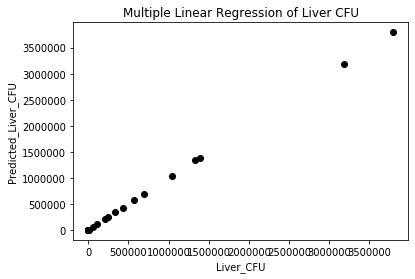

In [45]:
merged_data = pd.read_csv("../raw/final_merged_jeren.csv")
merged_data2 = merged_data.drop(['Unnamed: 0'], axis = 1)

df_CFU = merged_data2[~merged_data2['Liver_CFU'].isin(['-'])]
df_CFU['Liver_CFU'] = df_CFU['Liver_CFU'].astype(float)
# Separating out the features
metab_unstand = df_CFU.loc[:, metabolites].values
# Separating out the Group
y = df_CFU.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(metab_unstand)
metabss2 = pd.DataFrame(data = x, columns = metabolites)
# Taking out the 'X' in the metabolite ID 
metabss2.columns = metabss2.columns.astype(str)
metabss2.columns = metabss2.columns.str[1:]

#Defining variables 
y = np.array(df_CFU['Liver_CFU'])
x = np.array(metabss2)

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
#r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
#print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred, color='black')
#plt.xlim(23, 40)
#plt.ylim(23, 40)
plt.title('Multiple Linear Regression of Liver CFU')
plt.xlabel('Liver_CFU') 
plt.ylabel('Predicted_Liver_CFU')

### Fig 13
The Predicted vs Actual Temperature graph shows a clear linear relationship. Given that the line appears particularly linear, there were concerns that the model may be overfitting the data. A train-test split was conducted to validate the robustness of the model. Similar to the PCA, the mice from which Liver CFU were not collected were excluded from the analysis.

Text(0, 0.5, 'Predicted CFU')

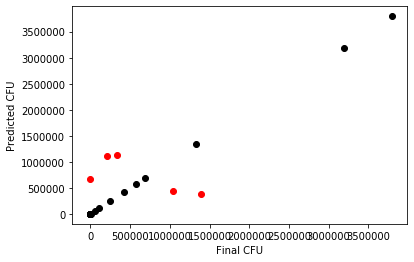

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

#Defining variables 
y = np.array(df_CFU['Liver_CFU'])
x = np.array(metabss2)

#split test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size= 0.2, random_state=1)
model = LinearRegression()
model.fit(x_train1, y_train1)
y_pred_train1 = model.predict(x_train1)

#Plot Trained
plt.scatter(y_train1, y_pred_train1,  color='black')
plt.xlabel('Final CFU') 
plt.ylabel('Predicted CFU')

#Plot Test
y_pred_test1 = model.predict(x_test1)
plt.scatter(y_test1, y_pred_test1,  color='red')
plt.xlabel('Final CFU') 
plt.ylabel('Predicted CFU')

### Fig 14
Overall, the train test split shows that the model appears to be fairly linear. The black dots represent points used to model and fit the data, whereas the red dots represent the "second group" of data points used to test and estimate the model's performance. The test sample, however, appears to be less accurate as the Liver CFU inccreases, given that the red points appear further and further away from the line formed by the black dots as the CFU increases. 

## Liver CFU:  Univariate Correlation Feature Selection

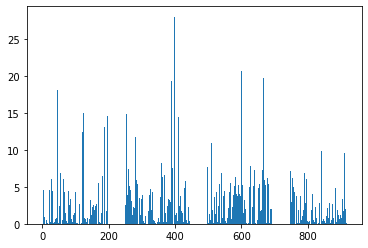

BIOCHEMICAL CHEMICAL ID  feature_corrVal
398              docosadienoate (22:2n6)   100001182        27.970215
683                  nervonate (24:1n9)*   100001231        23.385908
600                  N(1)-acetylspermine        1200        20.670390
666              N1,N12-diacetylspermine   100002132        19.704593
389             dihomolinoleate (20:2n6)        1231        19.341116
599               N('1)-acetylspermidine         187        19.255809
46               1-linoleoyl-GPG (18:2)*   100009227        18.103616
191                   3-aminoisobutyrate        1114        18.008362
691                 nonadecanoate (19:0)         892        17.332973
120                1-stearoyl-GPG (18:0)   100001462        16.311051
665                    N-stearoyltaurine   100003240        15.568079
759             phosphoethanolamine (PE)        1026        15.351296
124            10-nonadecenoate (19:1n9)   100001277        15.004067
254          5-methylthioadenosine (MTA)         212        14.842834
196                 3-hydroxyarachidate*   100019893        14.625709
410         eicosenoate (20:1n9 or 1n11)   100001335        14.412543
162               2-hydroxyphenylacetate         235        14.192495
187  3-(3-amino-3-carboxypropyl)uridine*   100001426        13.086056
720                     p-cresol sulfate   100001315        12.807917
322              beta-hydroxyisovalerate        1442        12.719509

In [47]:
#Creating target variable
y = np.array(df_CFU['Liver_CFU'])
#Creating feature variables (metabolites)
x = np.array(metabss2)
#Fitting data into model and transforming, while selecting largest k values with f_regression as score function 
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x,y)
Feature_corr2 = pd.DataFrame(data={'metabolite': np.ravel(metabss2.columns), 
                                   'feature': fs.scores_})

#plot the scores
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.show()

#Renaming metabolite column
Feature_corr2.rename(columns={'metabolite':'CHEMICAL ID'}, inplace=True)
Feature_corr2['CHEMICAL ID'] = Feature_corr2['CHEMICAL ID'].astype(str)

#Merging Dataframes
names['CHEMICAL ID']=names['CHEMICAL ID'].astype(str)
feature_table2 = pd.merge(Feature_corr2, names)

#Renaming and organizing by descending order
feature_table2.rename(columns={'feature':'feature_corrVal'}, inplace=True)
feature_table2 = feature_table2[['BIOCHEMICAL','CHEMICAL ID','feature_corrVal']]
feature_table2 = feature_table2.sort_values(by='feature_corrVal',ascending=False)
largest_features_fs2 = feature_table2.head (20)
largest_features_fs2


### Fig 15 A
The above graph plots the metabolite number (as shown by the x-axis) and the feature score (as shown in the y axis). The peaks represent metabolites with particularly high feature scores. A higher feature score indicates that the variable contributes more to accurately predicting the desired clinical outcome, which in this case is liver CFU.

### Fig 15 B
The following table presents the 20 metabolites with the highest Feature scores. The table includes the chemical ID number, feature score, and its corresponding biochemical name.

## Liver CFU:  Identifying Pathways (Feature Selection) 
After using correlation feature selection and LASSO to identify specific metabolites, the pathways each metabolite is involved in was determined by referencing the descriptions from the metabolomics data.

In [48]:
#Features Selection CFU
merged_features_CFU = pd.merge(metab_def, feature_table2, on='BIOCHEMICAL', how='right')
largest_features_CFU = merged_features_CFU.head(20)
largest_features_CFU

PATHWAY SORTORDER                                        BIOCHEMICAL  \
0              1642.0        (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1              1648.0         (16 or 17)-methylstearate (a19:0 or i19:0)   
2              4283.0                           (3'-5')-adenylylcytidine   
3              4288.0                         (3'-5')-cytidylylcytidine*   
4              1919.0                      (R)-3-hydroxybutyrylcarnitine   
5              1920.0                      (S)-3-hydroxybutyrylcarnitine   
6              6215.0                     1,2,3-benzenetriol sulfate (2)   
7              2359.0                    1,2-dilinoleoyl-GPC (18:2/18:2)   
8              2452.0                   1,2-dilinoleoyl-GPE (18:2/18:2)*   
9              2278.0                    1,2-dipalmitoyl-GPC (16:0/16:0)   
10             2404.0                   1,2-dipalmitoyl-GPE (16:0/16:0)*   
11             1220.0                       1,5-anhydroglucitol (1,5-AG)   
12             2836.0                    1-(1-enyl-oleoyl)-GPE (P-18:1)*   
13             2804.0  1-(1-enyl-palmitoyl)-2-arachidonoyl-GPE (P-16:...   
14             2801.0  1-(1-enyl-palmitoyl)-2-linoleoyl-GPE (P-16:0/1...   
15             2800.0   1-(1-enyl-palmitoyl)-2-oleoyl-GPE (P-16:0/18:1)*   
16             2802.0  1-(1-enyl-palmitoyl)-2-palmitoyl-GPC (P-16:0/1...   
17             2834.0                 1-(1-enyl-palmitoyl)-GPE (P-16:0)*   
18             2818.0  1-(1-enyl-stearoyl)-2-arachidonoyl-GPE (P-18:0...   
19             2810.0  1-(1-enyl-stearoyl)-2-linoleoyl-GPE (P-18:0/18...   

   SUPER PATHWAY                                        SUB PATHWAY  COMP ID  \
0          Lipid                               Fatty Acid, Branched  38768.0   
1          Lipid                               Fatty Acid, Branched  38296.0   
2     Nucleotide                                       Dinucleotide  52753.0   
3     Nucleotide                                       Dinucleotide  62397.0   
4          Lipid    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)  43264.0   
5          Lipid    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)  52984.0   
6    Xenobiotics                                           Chemical  48762.0   
7          Lipid                           Phosphatidylcholine (PC)  52603.0   
8          Lipid                      Phosphatidylethanolamine (PE)  53174.0   
9          Lipid                           Phosphatidylcholine (PC)  19130.0   
10         Lipid                      Phosphatidylethanolamine (PE)  57341.0   
11  Carbohydrate  Glycolysis, Gluconeogenesis, and Pyruvate Meta...  20675.0   
12         Lipid                                    Lysoplasmalogen  44621.0   
13         Lipid                                        Plasmalogen  52673.0   
14         Lipid                                        Plasmalogen  52677.0   
15         Lipid                                        Plasmalogen  52477.0   
16         Lipid                                        Plasmalogen  52716.0   
17         Lipid                                    Lysoplasmalogen  39270.0   
18         Lipid                                        Plasmalogen  52475.0   
19         Lipid                                        Plasmalogen  52748.0   

           PLATFORM  CHEMICAL ID_x      RI      MASS                     HMDB  \
0         LC/MS Neg    100002945.0  5695.0  269.2487              HMDB0061859   
1         LC/MS Neg    100002356.0  5993.0  297.2799              HMDB0037397   
2         LC/MS Neg    100009062.0  1920.0  571.1308                      NaN   
3         LC/MS Neg    100020727.0  1472.0  547.1195                      NaN   
4   LC/MS Pos Early    100003926.0  2400.0  248.1493              HMDB0013127   
5   LC/MS Pos Early    100009271.0  2340.0  248.1493              HMDB0013127   
6         LC/MS Neg    100006374.0  1709.0  204.9812  HMDB0060018,HMDB0060016   
7    LC/MS Pos Late    100008903.0  2100.0  782.5694              HMDB0008138 

In [49]:
#largest_features_CFU['SUB PATHWAY'].value_counts()
path_results_fs2 = largest_features_CFU['SUB PATHWAY'].value_counts()
pathwayNames_fs2 = path_results_fs2.index.to_list()
path_results_fs2

Plasmalogen                                             6
Phosphatidylcholine (PC)                                2
Lysoplasmalogen                                         2
Dinucleotide                                            2
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)         2
Fatty Acid, Branched                                    2
Phosphatidylethanolamine (PE)                           2
Glycolysis, Gluconeogenesis, and Pyruvate Metabolism    1
Chemical                                                1
Name: SUB PATHWAY, dtype: int64

### Fig 16 A
The first table desribes the pathway of each metabolite identified

### Figure 16 B
The above table describes the number of metabolites identifed by correlation feature selection that are involved in each pathway. The most common pathway was Polyamine Metabolism followed by Long Chain Polyunsaturated Fatty Acid. Leucine, Isoleucine and Valine Metabolism aslo appears in the feature selection but to a lesser degree. 

In [50]:
# Choosing to iterate thru the first 3 pathways
num_paths = 4
# Get Temp values of the mouse
x = df_CFU['Liver_CFU']

if want_plots == 1:
    for i in range(num_paths):
        # Subset df_lasso into the specific pathway of interest
        metabs = merged_features_CFU[merged_features_CFU['SUB PATHWAY'] == pathwayNames_fs2[i]]
        chemIDs = metabs['CHEMICAL ID_y']
        chemIDs = [str(x) for x in chemIDs]
        metabs_names = list(metabs['BIOCHEMICAL'])
        # need to redefine chemIDs with the "X" in metabolon dataset
        chemIDs2 = ['X' + x for x in chemIDs]
        print(chemIDs)
        for j in range(len(chemIDs2)):
            metab_ID = chemIDs2[j]
            # Get values of the metabolite levels in the mouse
            metab_level = df_CFU[metab_ID]

            # begin plotting of metabolite level vs Temp
            plt.figure()
            plt.scatter(x, metab_level,c='k')
            plt.xlabel('Liver CFU')
            plt.ylabel('Metabolite Concentration')
            title_str = pathwayNames_fs2[i] + '\n' + metabs_names[j]
            plt.title(title_str)
            plt.xscale("log")
            plt.show()

## Figure: 
The above figure creates the scatter plots for each of the metabolites identified in the top pathways. The x axis is the log of the liver CFU while the vertical axis is the metabolite concentration. Overall the metabolite that appears to have the strongest correlationship is 5-methylthioadenosine and docosadienate. In general, it appears that there is a weaker correlation between the metabolite level and CFU than with temperature. 

## Liver CFU:  LASSO

LASSO was applied to the CFU data set to identify metabolites and reduce the complexity of the data. 

In [51]:
#LASSO Analysis 
# Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
#Defining Variables:
y = np.array(df_CFU['Liver_CFU'])
x = np.array(metabss2)
#Test Split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)
#Pipeline Scaling
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
#Optimize alpha-hyperparameter
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )
#Fit the grid search
search.fit(x,y)
#Get best alpha
search.best_params_
#Finding important features
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

# Construct dataframe
df_lasso2 = pd.DataFrame({'CHEMICAL ID':metabss2.columns,'coeff':coefficients,'imp':importance})
df_lasso2 = df_lasso2.sort_values(by='imp',ascending=False)
df_lasso2.head()
# Sort be importance descending 
# lasso_largest = list(metabss2.columns[importance > 0])
# lasso_largest

CHEMICAL ID          coeff            imp
0    100002945  540933.312224  540933.312224
9    100000657  293242.304161  293242.304161
7    100008903 -200491.495396  200491.495396
46   100009227  157060.385836  157060.385836
1    100002356  155001.881842  155001.881842

Unlike the data with final temperature, there appeared to be many mor emetabolites that were identified. 

In [52]:
Lasso_ID = pd.merge(df_lasso2, names, on='CHEMICAL ID')
Lasso_ID
print(Lasso_ID.shape)
# remove duplicate rows
Lasso_ID = Lasso_ID.drop_duplicates()
print(Lasso_ID.shape)
Lasso_ID_top = Lasso_ID.head(21)


(917, 8)
(917, 8)


### Fig 16 
A table of of metabolites ID with accompnoying name 

In [53]:
#Counting all of the Pathways involved 
lasso_metabs2 = Lasso_ID[Lasso_ID['imp']>0]
path_results_lasso2 = Lasso_ID.loc[:20,'SUB PATHWAY'].value_counts()
pathwayNames_lasso2 = path_results_lasso2.index.to_list()
path_results_lasso2

Lysophospholipid                                        5
Phosphatidylcholine (PC)                                3
Histidine Metabolism                                    2
Fatty Acid, Branched                                    2
Phosphatidylinositol (PI)                               2
Lysoplasmalogen                                         2
Glycolysis, Gluconeogenesis, and Pyruvate Metabolism    1
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)         1
Plasmalogen                                             1
Fatty Acid, Monohydroxy                                 1
Monoacylglycerol                                        1
Name: SUB PATHWAY, dtype: int64

In [54]:
#Scatter plot of LASSO for CFU 
# Choosing to iterate thru the first 3 pathways
num_paths = 2
# Get Temp values of the mouse
x = df_CFU['Liver_CFU']

if want_plots == 1:
    for i in range(num_paths):
        # Subset Lasso_ID into the specific pathway of interest
        metabs = Lasso_ID[Lasso_ID['SUB PATHWAY'] == pathwayNames_lasso2[i]]
        chemIDs = metabs['CHEMICAL ID']
        metabs_names = list(metabs['BIOCHEMICAL'])
        # need to redefine chemIDs with the "X" in metabolon dataset
        chemIDs2 = ['X' + x for x in chemIDs]
        for j in range(len(chemIDs2)):
            metab_ID = chemIDs2[j]
            # Get values of the metabolite levels in the mouse
            metab_level = df_CFU[metab_ID]

            # begin plotting of metabolite level vs Temp
            plt.figure()
            plt.scatter(x, metab_level,c='k')
            plt.xlabel('Liver CFU')
            plt.ylabel('Metabolite Concentration')
            title_str = pathwayNames_lasso2[i] + '\n' + metabs_names[j]
            plt.title(title_str)
            plt.xscale("log")
            plt.show()


### Figure: 
The above figure creates the scatter plots for each of the metabolites identified in the top pathways. The x axis is the log of the liver CFU while the vertical axis is the metabolite concentration. Overall the metabolite that appears to have the strongest correlationship are 1-linoleoyl-GPG (18:2) and 1-arachidonoyl-GPC

In [55]:
## Performing Feature Selection while Grouping by Temperature

(12, 930)


C:\Users\amisr\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
C:\Users\amisr\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\amisr\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\amisr\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


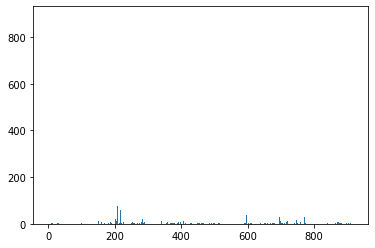

BIOCHEMICAL CHEMICAL ID  feature_corrVal
596  myristoyl dihydrosphingomyelin (d18:0/14:0)*   100009038     8.871239e+02
203                            3-hydroxyhexanoate   100006367     4.809799e+02
670                              N1-methylinosine   100001409     8.720838e+01
162                        2-hydroxyphenylacetate         235     8.006051e+01
208                              3-hydroxylaurate   100001112     7.826166e+01
..                                            ...         ...              ...
2                        (3'-5')-adenylylcytidine   100009062     8.264660e-18
872               tetrahydrocortisol glucuronide    100022013     6.611728e-18
807                                 soyasaponin I   100004481     0.000000e+00
347                               cholate sulfate   100006637              NaN
666                       N1,N12-diacetylspermine   100002132              NaN

[917 rows x 3 columns]

In [56]:
#Separating out the lower temperatures 
Low_temp = df_CFU[df_CFU['Final.Temp']>=35]
print(Low_temp.shape)
#Creating target variable
y = np.array(Low_temp['Liver_CFU'])
#Creating feature variables (metabolites)
x = Low_temp[metabolites]
x.columns = x.columns.str.replace(r'^X', '')

#Fitting data into model and transforming, while selecting largest k values with f_regression as score function 
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x,y)
Feature_corr3 = pd.DataFrame(data={'metabolite': np.ravel(metabss2.columns), 
                                   'feature': fs.scores_})

#plot the scores
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.show()

#Renaming metabolite column
Feature_corr3.rename(columns={'metabolite':'CHEMICAL ID'}, inplace=True)
Feature_corr3['CHEMICAL ID'] = Feature_corr3['CHEMICAL ID'].astype(str)

#Merging Dataframes
names['CHEMICAL ID']=names['CHEMICAL ID'].astype(str)
feature_table3 = pd.merge(Feature_corr3, names)

#Renaming and organizing by descending order
feature_table3.rename(columns={'feature':'feature_corrVal'}, inplace=True)
feature_table3 = feature_table3[['BIOCHEMICAL','CHEMICAL ID','feature_corrVal']]
feature_table3 = feature_table3.sort_values(by='feature_corrVal',ascending=False)
#largest_features_fs3 = feature_table3.head (20)
feature_table3


In [57]:
#Features Selection CFU
merged_low = pd.merge(metab_def, feature_table3, on='BIOCHEMICAL', how='right')
merged_low_top = merged_low.head(4)
merged_low_top


PATHWAY SORTORDER                                  BIOCHEMICAL  \
0             1642.0  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1             1648.0   (16 or 17)-methylstearate (a19:0 or i19:0)   
2             4283.0                     (3'-5')-adenylylcytidine   
3             4288.0                   (3'-5')-cytidylylcytidine*   

  SUPER PATHWAY           SUB PATHWAY  COMP ID   PLATFORM  CHEMICAL ID_x  \
0         Lipid  Fatty Acid, Branched  38768.0  LC/MS Neg    100002945.0   
1         Lipid  Fatty Acid, Branched  38296.0  LC/MS Neg    100002356.0   
2    Nucleotide          Dinucleotide  52753.0  LC/MS Neg    100009062.0   
3    Nucleotide          Dinucleotide  62397.0  LC/MS Neg    100020727.0   

       RI      MASS         HMDB        PUBCHEM CHEMICAL ID_y  feature_corrVal  
0  5695.0  269.2487  HMDB0061859  8181;17903417     100002945     1.329087e-01  
1  5993.0  297.2799  HMDB0037397        3083779     100002356     1.378601e-02  
2  1920.0  571.1308          NaN       10875494     100009062     8.264660e-18  
3  1472.0  547.1195          NaN          94237     100020727     1.101060e+00

In [58]:
merged_low['SUB PATHWAY'].value_counts()
path_results_low_fs = merged_low_top['SUB PATHWAY'].value_counts()
pathwayNames_low_fs = path_results_low_fs.index.to_list()
path_results_low_fs

Dinucleotide            2
Fatty Acid, Branched    2
Name: SUB PATHWAY, dtype: int64

In [59]:
# Choosing to iterate thru the first 3 pathways
num_paths = 4
# Get Temp values of the mouse
x = Low_temp['Liver_CFU']
if want_plots == 1:
    for i in range(num_paths):
        # Subset df_lasso into the specific pathway of interest
        metabs = merged_low[merged_low['SUB PATHWAY'] == pathwayNames_low_fs[i]]
        chemIDs = metabs['CHEMICAL ID_y']
        chemIDs = [str(x) for x in chemIDs]
        metabs_names = list(metabs['BIOCHEMICAL'])
        # need to redefine chemIDs with the "X" in metabolon dataset
        chemIDs2 = ['X' + x for x in chemIDs]
        print(chemIDs)
        for j in range(len(chemIDs)):
            metab_ID = chemIDs2[j]
            # Get values of the metabolite levels in the mouse
            metab_level = Low_temp[metab_ID]
            # begin plotting of metabolite level vs Temp
            plt.figure()
            plt.scatter(x, metab_level,c='k')
            plt.xlabel('Liver CFU')
            plt.ylabel('Metabolite Concentration')
            title_str = pathwayNames_fs2[i] + '\n' + metabs_names[j]
            plt.title(title_str)
            plt.xscale("log")
            plt.show()
    

In [60]:
#LASSO Analysis 
# Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
#Creating target variable
y = np.array(Low_temp['Liver_CFU'])
#Creating feature variables (metabolites)
x = Low_temp[metabolites]
x.columns = x.columns.str.replace(r'^X', '')
#x.columns = x.columns.str.replace(r'^X', '')
#Test Split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)
#Pipeline Scaling
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
#Optimize alpha-hyperparameter
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )
#Fit the grid search
search.fit(x,y)
#Get best alpha
search.best_params_
#Finding important features
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

# Construct dataframe
df_lasso2 = pd.DataFrame({'CHEMICAL ID':metabss2.columns,'coeff':coefficients,'imp':importance})
df_lasso2 = df_lasso2.sort_values(by='imp',ascending=False)
df_lasso2['CHEMICAL ID'] = df_lasso2['CHEMICAL ID'].astype(str)
df_lasso2.head(20)

#Sort be importance descending 
#lasso_largest = list(metabss2.columns[importance > 0])
#lasso_largest

CHEMICAL ID          coeff            imp
4     100003926  371634.606460  371634.606460
3     100020727  280453.694656  280453.694656
21    100004442 -248352.897212  248352.897212
5     100009271  211882.855405  211882.855405
22    100001551  210019.837371  210019.837371
56           55  198567.005625  198567.005625
126   100002781  152068.288759  152068.288759
54    100001204 -149753.913451  149753.913451
58    100000672  148580.645328  148580.645328
1     100002356 -121209.825253  121209.825253
9     100000657  119896.784394  119896.784394
93    100001263 -106780.426027  106780.426027
75    100008914 -104632.051158  104632.051158
0     100002945  100430.123631  100430.123631
70    100009345  -91296.540609   91296.540609
11    100000580   88938.381028   88938.381028
61    100009130   88471.843206   88471.843206
25    100001433   86585.176794   86585.176794
119   100001461  -83512.201550   83512.201550
101   100001869   82077.649764   82077.649764

In [61]:
#Features Selection CFU
metab_def['CHEMICAL ID'] = metab_def['CHEMICAL ID'].astype(str)
merged_low_lasso = pd.merge(metab_def, df_lasso2, on='CHEMICAL ID', how='left')
merged_low_lasso_top = merged_low_lasso[df_lasso2['imp']>0].sort_values(by='imp',ascending=False).head(20)
merged_low_lasso_top


C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


PATHWAY SORTORDER                                   BIOCHEMICAL  \
4                 1919                 (R)-3-hydroxybutyrylcarnitine   
3                 4288                    (3'-5')-cytidylylcytidine*   
21                2592                     1-arachidonoyl-GPA (20:4)   
5                 1920                 (S)-3-hydroxybutyrylcarnitine   
22                2635                   1-arachidonoyl-GPC* (20:4)*   
56                4314                          1-methylnicotinamide   
126               3300                      11-dehydrocorticosterone   
54                  90                             1-methylhistamine   
58                2262       1-myristoyl-2-palmitoyl-GPC (14:0/16:0)   
1                 1648    (16 or 17)-methylstearate (a19:0 or i19:0)   
9                 2278               1,2-dipalmitoyl-GPC (16:0/16:0)   
93                2600                        1-palmitoyl-GPC (16:0)   
75                2297  1-palmitoyl-2-arachidonoyl-GPC (16:0/20:4n6)   
0                 1642   (14 or 15)-methylpalmitate (a17:0 or i17:0)   
70                2310  1-palmitoleoyl-2-linolenoyl-GPC (16:1/18:3)*   
11                1220                  1,5-anhydroglucitol (1,5-AG)   
61                2358   1-oleoyl-2-docosahexaenoyl-GPC (18:1/22:6)*   
25                2862                  1-arachidonylglycerol (20:4)   
119               2669                         1-stearoyl-GPE (18:0)   
101               2333     1-stearoyl-2-arachidonoyl-GPC (18:0/20:4)   

              SUPER PATHWAY  \
4                     Lipid   
3                Nucleotide   
21                    Lipid   
5                     Lipid   
22                    Lipid   
56   Cofactors and Vitamins   
126                   Lipid   
54               Amino Acid   
58                    Lipid   
1                     Lipid   
9                     Lipid   
93                    Lipid   
75                    Lipid   
0                     Lipid   
70                    Lipid   
11             Carbohydrate   
61                    Lipid   
25                    Lipid   
119                   Lipid   
101                   Lipid   

                                           SUB PATHWAY  COMP ID  \
4      Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   
3                                         Dinucleotide    62397   
21                                    Lysophospholipid    46325   
5      Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    52984   
22                                    Lysophospholipid    33228   
56              Nicotinate and Nicotinamide Metabolism    27665   
126                                    Corticosteroids    39779   
54                                Histidine Metabolism    43831   
58                            Phosphatidylcholine (PC)    19258   
1                                 Fatty Acid, Branched    38296   
9                             Phosphatidylcholine (PC)    19130   
93                                    Lysophospholipid    33955   
75                            Phosphatidylcholine (PC)    52462   
0                                 Fatty Acid, Branched    38768   
70                            Phosphatidylcholine (PC)    53180   
11   Glycolysis, Gluconeogenesis, and Pyruvate Meta...    20675   
61                            Phosphatidylcholine (PC)    52697   
25                                    Monoacylglycerol    34397   
119                                   Lysophospholipid    42398   
101                           Phosphatidylcholine (PC)    42450   

            PLATFORM CHEMICAL ID      RI      MASS         HMDB  \
4    LC/MS Pos Early   100003926  2400.0  248.1493  HMDB0013127   
3          LC/MS Neg   100020727  1472.0  547.1195          NaN   
21         LC/MS Neg   100004442  5499.0  457.2361  HMDB0062312   
5    LC/MS Pos Early   100009271  2340.0  248.1493  HMDB0013127   
22    LC/MS Pos Late   100001551  1460.0  544.3398  HMDB0010395   
56   LC/MS Pos Early          

In [62]:
merged_low_lasso_top['SUB PATHWAY'].value_counts()
path_results_low_lasso = merged_low_lasso_top['SUB PATHWAY'].value_counts()
pathwayNames_low_lasso = path_results_low_lasso.index.to_list()
path_results_low_lasso

Phosphatidylcholine (PC)                                6
Lysophospholipid                                        4
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)         2
Fatty Acid, Branched                                    2
Histidine Metabolism                                    1
Corticosteroids                                         1
Dinucleotide                                            1
Glycolysis, Gluconeogenesis, and Pyruvate Metabolism    1
Monoacylglycerol                                        1
Nicotinate and Nicotinamide Metabolism                  1
Name: SUB PATHWAY, dtype: int64

In [63]:
# Choosing to iterate thru the first 3 pathways
num_paths = 2
# Get Temp values of the mouse
x = Low_temp['Liver_CFU']

if want_plots == 1:
    for i in range(num_paths):
        # Subset df_lasso into the specific pathway of interest
        metabs = merged_low_lasso[merged_low_lasso['SUB PATHWAY'] == pathwayNames_low_lasso[i]]
        chemIDs = metabs['CHEMICAL ID']
        chemIDs = [str(x) for x in chemIDs]
        metabs_names = list(metabs['BIOCHEMICAL'])
        # need to redefine chemIDs with the "X" in metabolon dataset
        chemIDs2 = ['X' + x for x in chemIDs]
        print(chemIDs)
        for j in range(len(chemIDs)):
            metab_ID = chemIDs2[j]
            # Get values of the metabolite levels in the mouse
            metab_level = Low_temp[metab_ID]
            # begin plotting of metabolite level vs Temp
            plt.figure()
            plt.scatter(x, metab_level,c='k')
            plt.xlabel('Liver CFU')
            plt.ylabel('Metabolite Concentration')
            title_str = pathwayNames_low_lasso[i] + '\n' + metabs_names[j]
            plt.title(title_str)
            plt.xscale("log")
            plt.show()

# Identifying Subpathways 

The objective of the analysis is to determine how well the individual subpathways correlate to the clinical outcomes, including temperature

## Mapping out relatinoship between Trigonelline and Final Temperature 

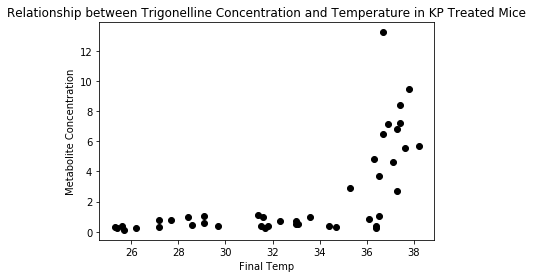

In [64]:
trig_ID = merged_feature[merged_feature['BIOCHEMICAL'] == "trigonelline (N'-methylnicotinate)"]['CHEMICAL ID_y']
trig_ID_char =['X' + trig_ID]
plt.figure()
plt.scatter(merged_data['Final.Temp'],merged_data['X100001092'],c='k')
plt.xlabel('Final Temp')
plt.ylabel('Metabolite Concentration')
title_str = 'Relationship between Trigonelline Concentration and Temperature in KP Treated Mice'
plt.title(title_str)
#plt.xscale("log")
plt.show()


## Visualizing sub-pathways

In [65]:
#Create Function that gets graphs when you input pathway name
def get_graph(pathway, tempThresh = 34):
    #Defining the two groups for the SNR calculation 
    df_temp1 = merged_data[merged_data['Final.Temp']>tempThresh]
    df_temp2 = merged_data[merged_data['Final.Temp']<=tempThresh]

    # Subset dataframe into the specific pathway of interest
    metabs = merged_feature[merged_feature['SUB PATHWAY'] == pathway]
    chemIDs = metabs['CHEMICAL ID_y']
    chemIDs = [str(x) for x in chemIDs]
    metabs_names = list(metabs['BIOCHEMICAL'])
    # need to redefine chemIDs with the "X" in metabolon dataset
    chemIDs2 = ['X' + x for x in chemIDs]
    # define final temps
    x = merged_data['Final.Temp']
    
    for j in range(len(chemIDs2)):
        metab_ID = chemIDs2[j]
        # Get values of the metabolite levels in the mouse
        metab_level = merged_data[metab_ID]
        print(metab_level.shape)
        # Calculating the signal to noise ratio (SNR)
        mean_temp1 = df_temp1[metab_ID].mean()
        std_temp1 = df_temp1[metab_ID].std()
        mean_temp2 = df_temp2[metab_ID].mean()
        std_temp2 = df_temp2[metab_ID].std()
        SNR = abs(mean_temp2 - mean_temp1) / (std_temp2 + std_temp1)
        
        # begin plotting of metabolite level vs Temp
        plt.figure()
        plt.scatter(x, metab_level,c='k')
        plt.xlabel('Final Temperature')
        plt.ylabel('Metabolite Concentration')
        title_str = pathway + '\n' + metabs_names[j] + '\n' + 'SNR = {}'.format(round(SNR,3))
        plt.title(title_str)
        plt.show()

get_graph('Pantothenate and CoA Metabolism')

(43,)


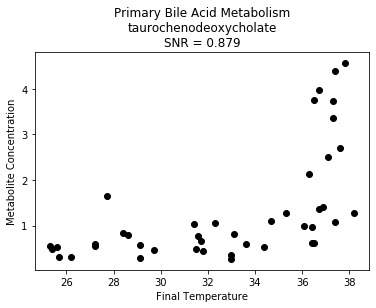

(43,)


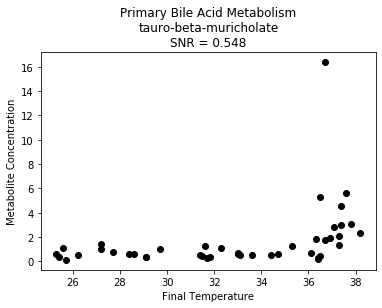

(43,)


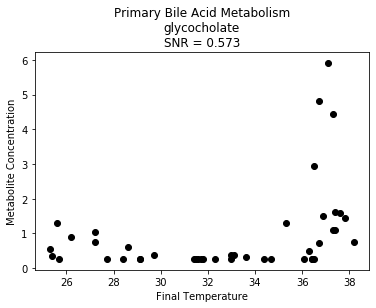

(43,)


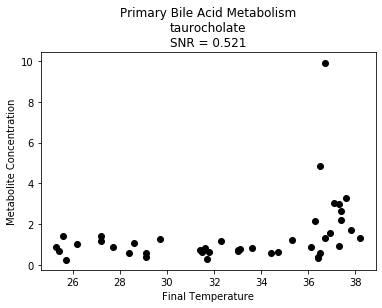

(43,)


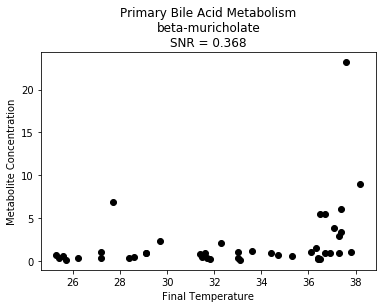

(43,)


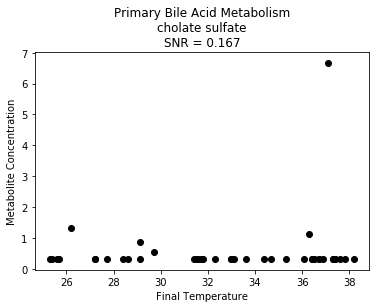

(43,)


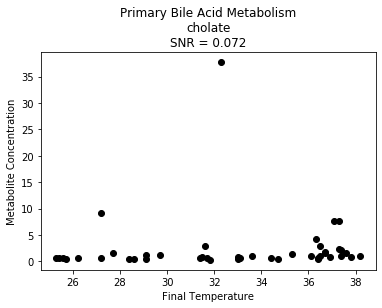

(43,)


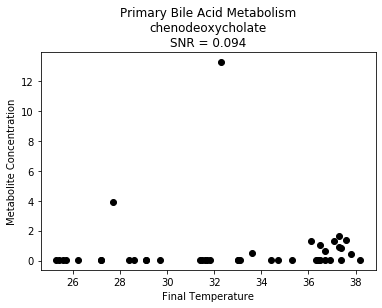

In [66]:
get_graph('Primary Bile Acid Metabolism')

(43,)


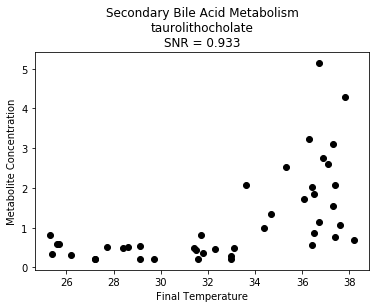

(43,)


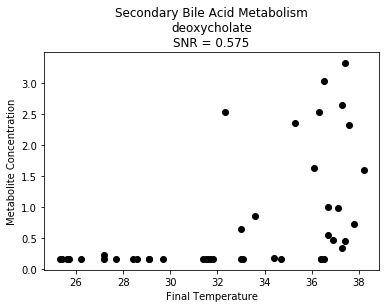

(43,)


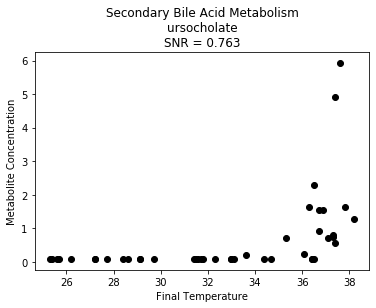

(43,)


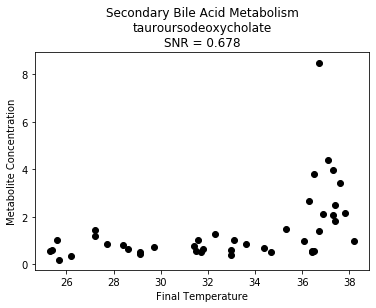

(43,)


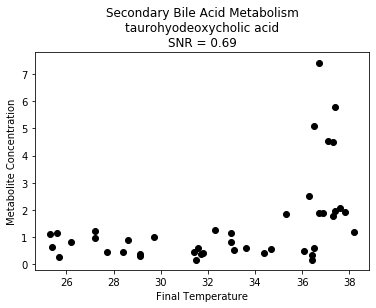

(43,)


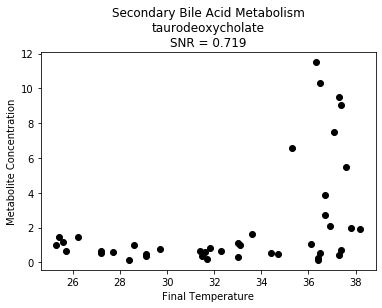

(43,)


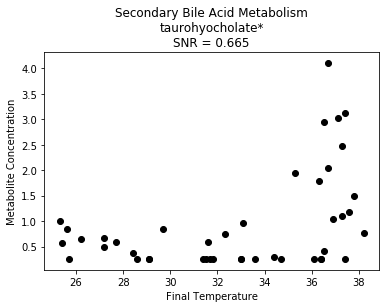

(43,)


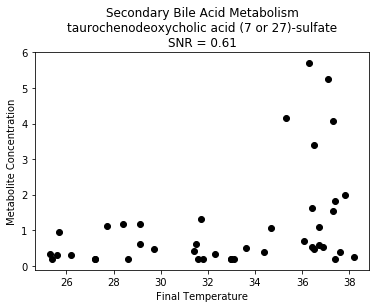

(43,)


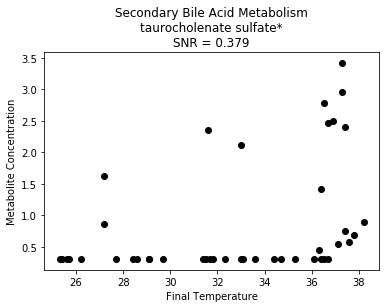

(43,)


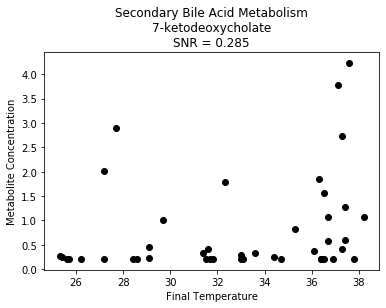

In [67]:
get_graph('Secondary Bile Acid Metabolism')

(43,)


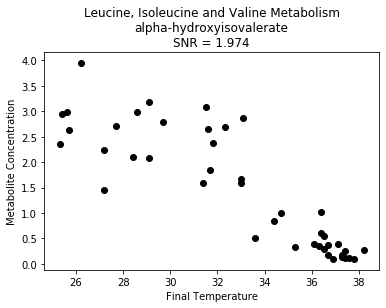

(43,)


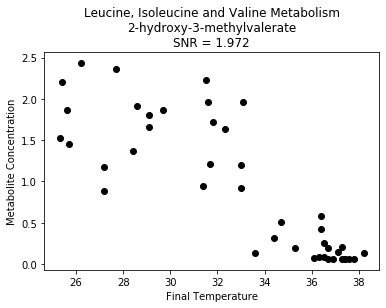

(43,)


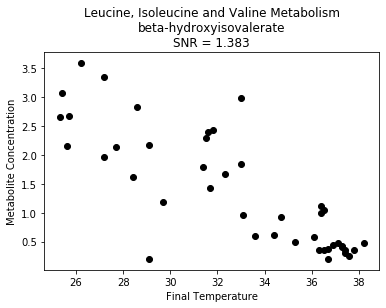

(43,)


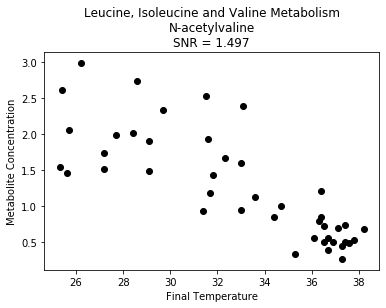

(43,)


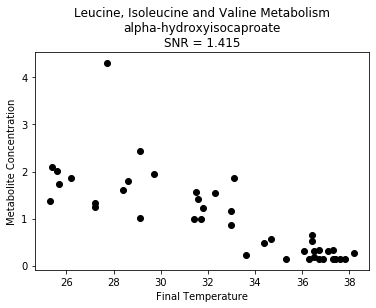

(43,)


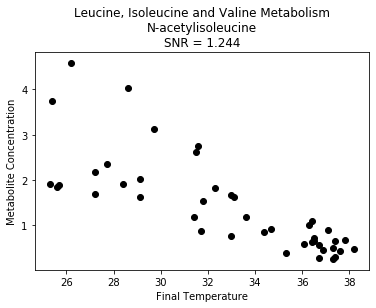

(43,)


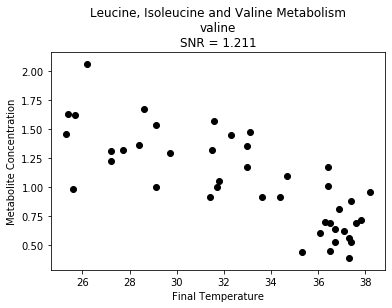

(43,)


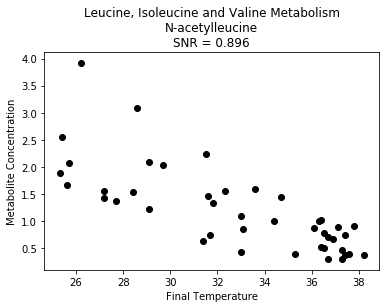

(43,)


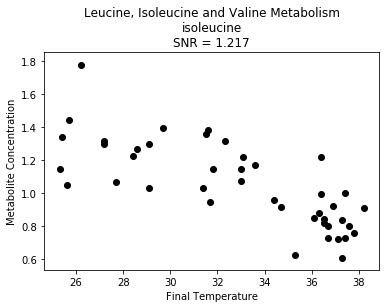

(43,)


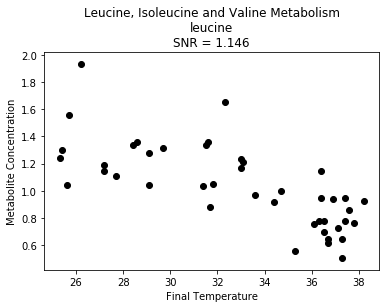

(43,)


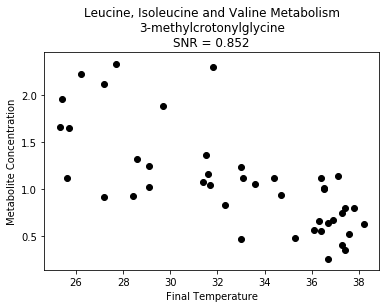

(43,)


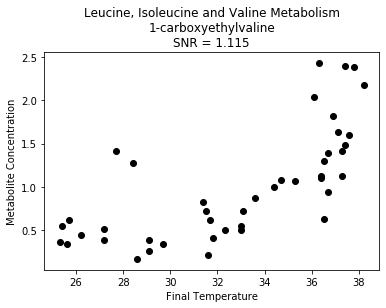

(43,)


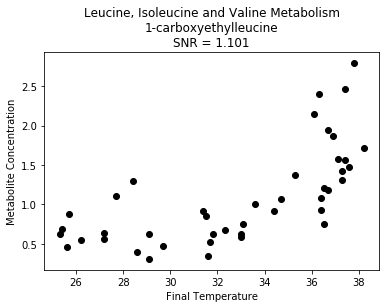

(43,)


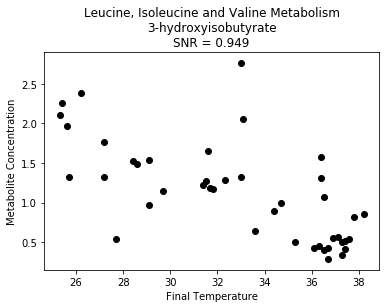

(43,)


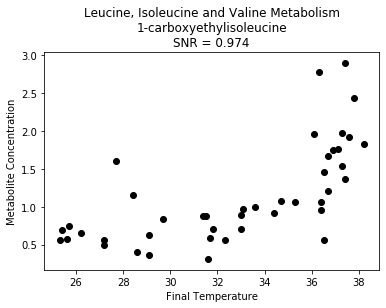

(43,)


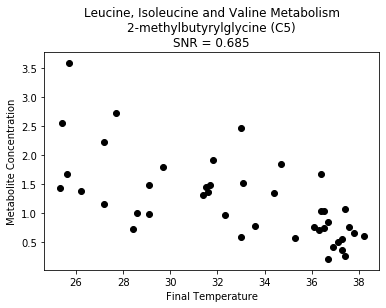

(43,)


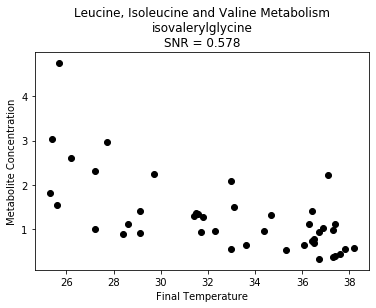

(43,)


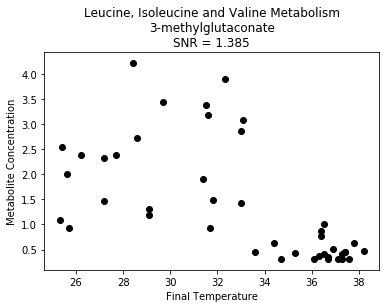

(43,)


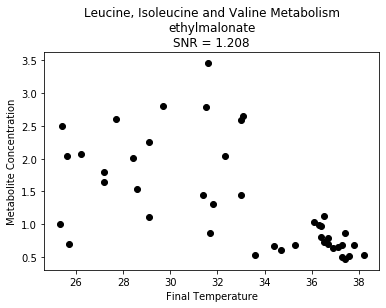

(43,)


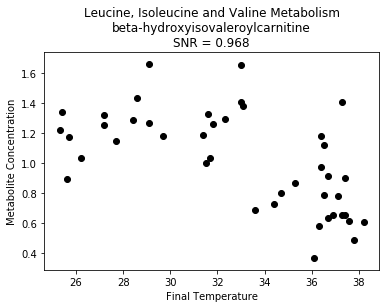

(43,)


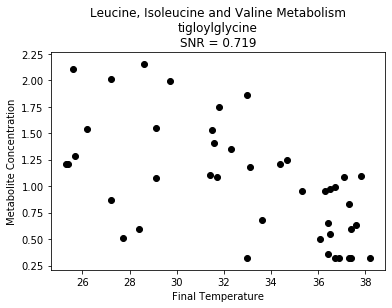

(43,)


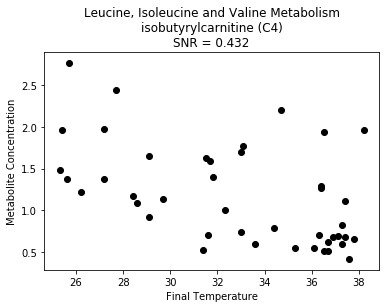

(43,)


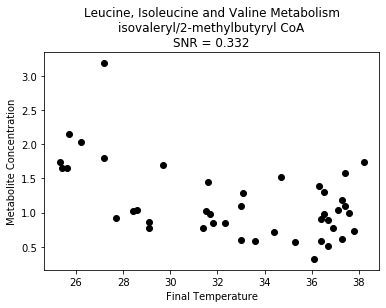

(43,)


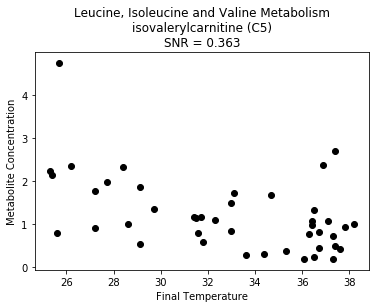

(43,)


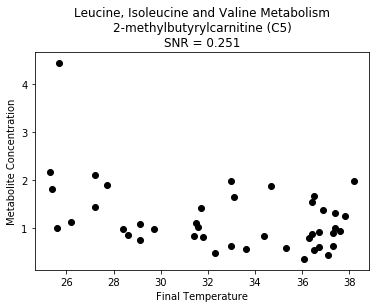

(43,)


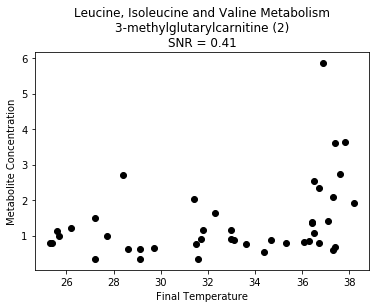

(43,)


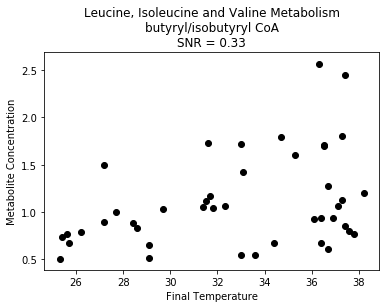

(43,)


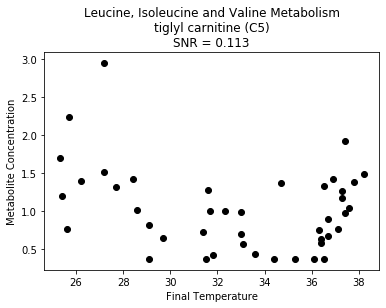

(43,)


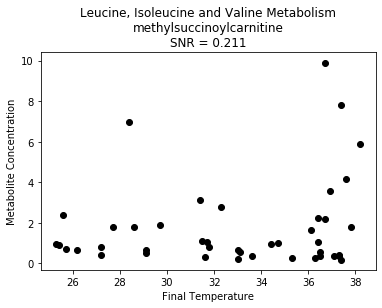

(43,)


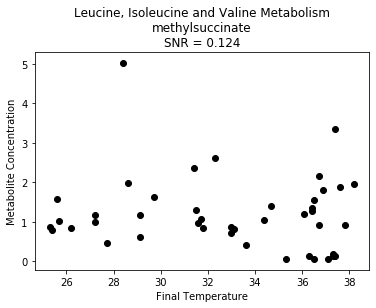

In [68]:
get_graph('Leucine, Isoleucine and Valine Metabolism')

(43,)


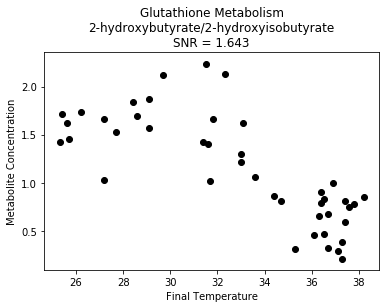

(43,)


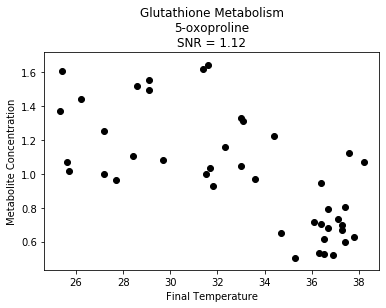

(43,)


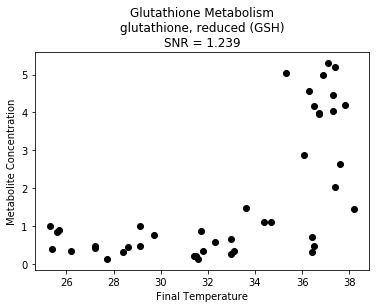

(43,)


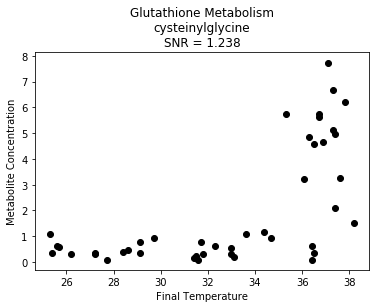

(43,)


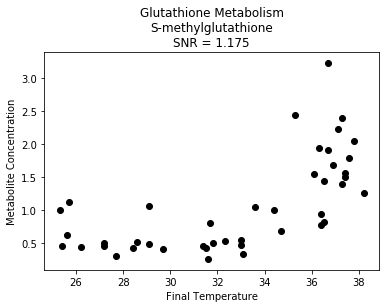

(43,)


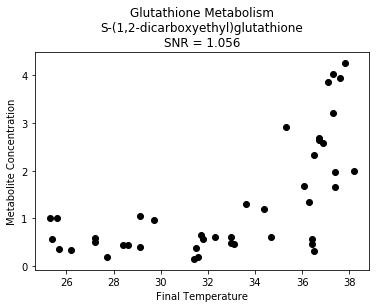

(43,)


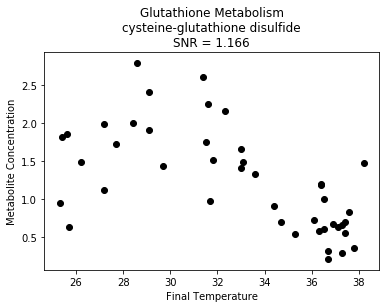

(43,)


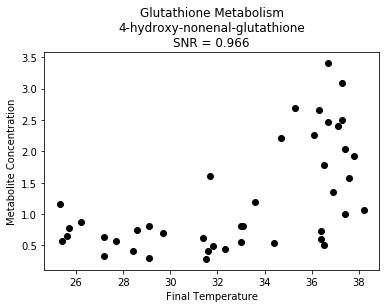

(43,)


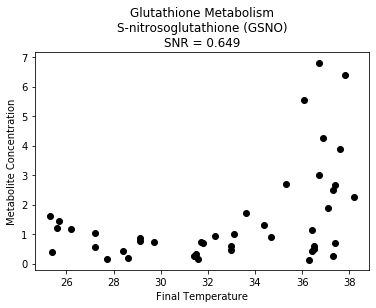

(43,)


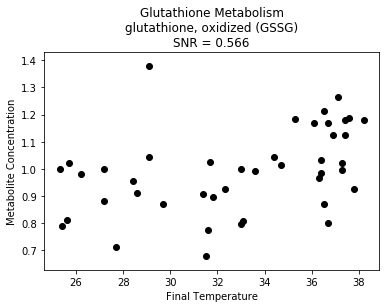

(43,)


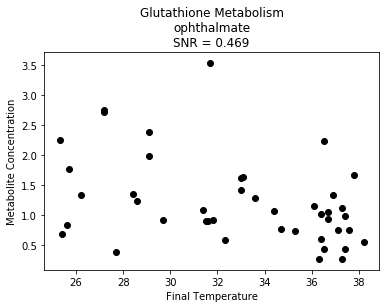

(43,)


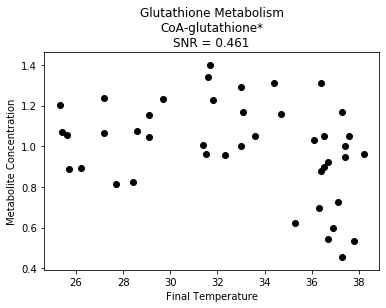

(43,)


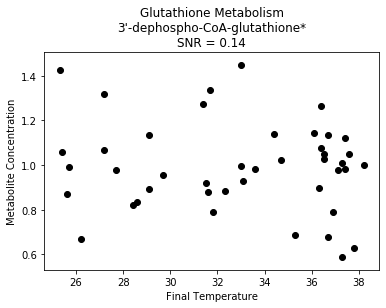

In [69]:
get_graph('Glutathione Metabolism')

(43,)


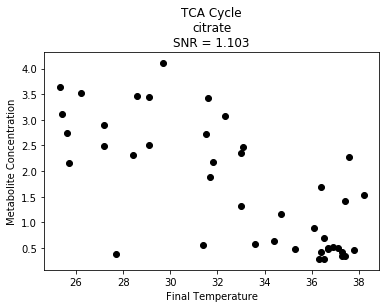

(43,)


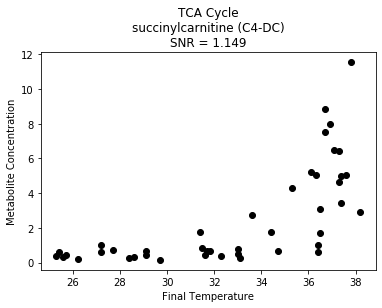

(43,)


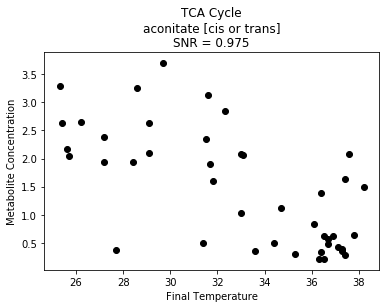

(43,)


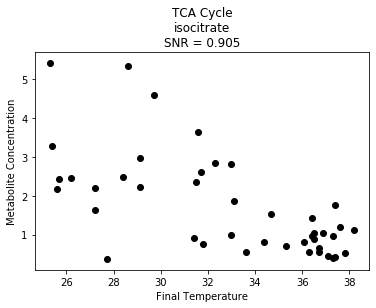

(43,)


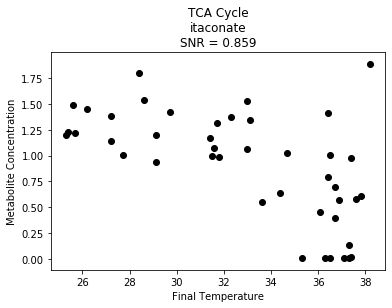

(43,)


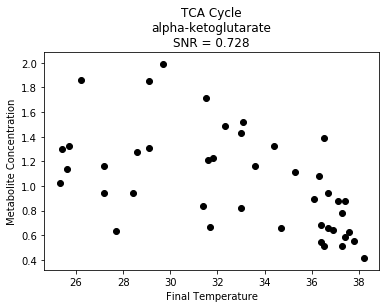

(43,)


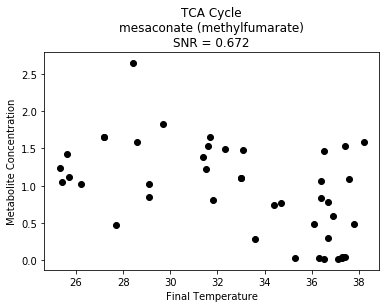

(43,)


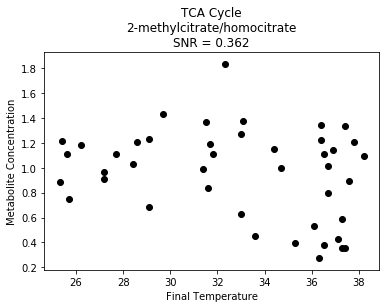

(43,)


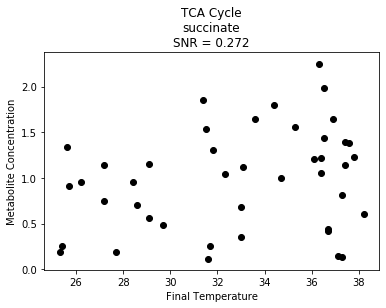

(43,)


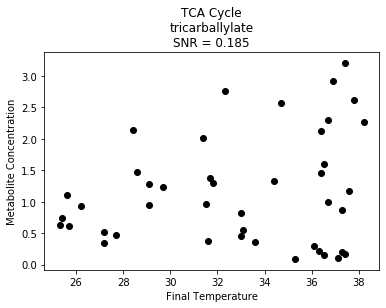

(43,)


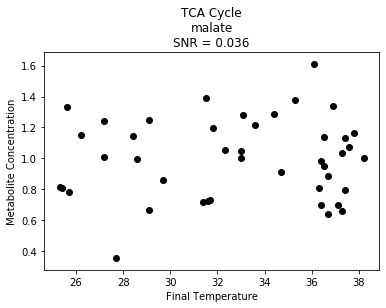

(43,)


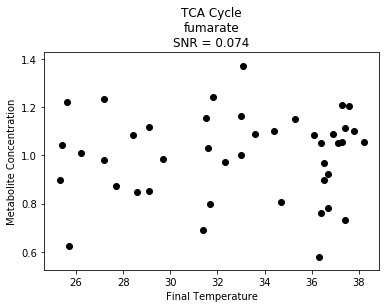

In [70]:
get_graph('TCA Cycle')

(43,)


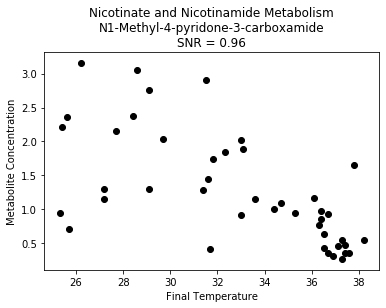

(43,)


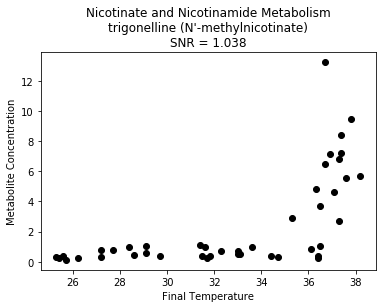

(43,)


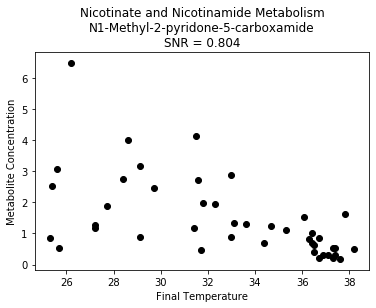

(43,)


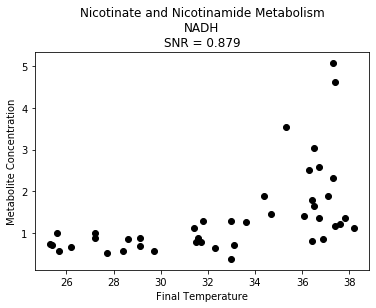

(43,)


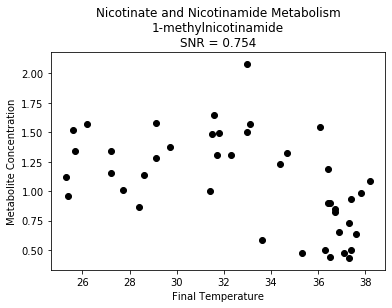

(43,)


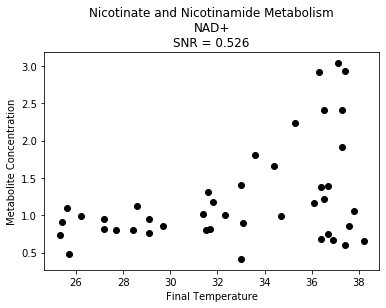

(43,)


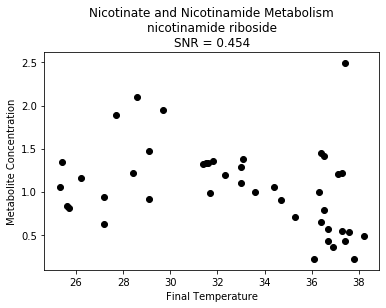

(43,)


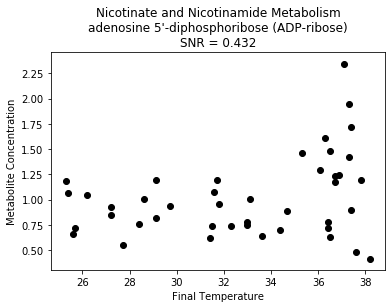

(43,)


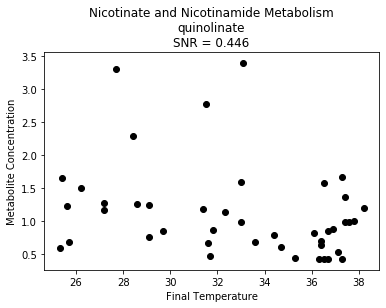

(43,)


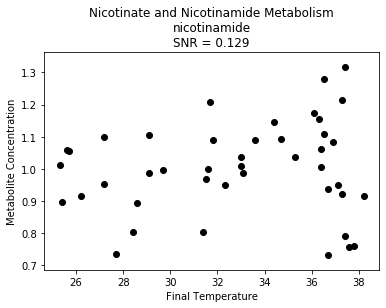

(43,)


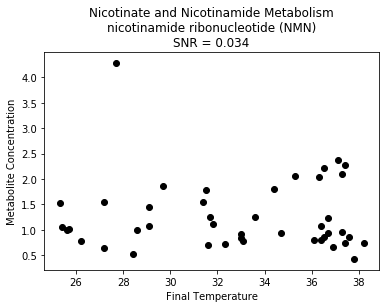

In [71]:
get_graph('Nicotinate and Nicotinamide Metabolism')

## Summarize metabolite-level statistics 

In [72]:
#Feed in the metabolite name (make sure it is in the same order as the Temperature in merged_data)
def metab_vals(merged_data, metab_def, metabolite, temp_thresh = 36):
    from scipy import stats
    # merged_data is a dataframe that includes all of the metabolite concentrations and
    # temperatures for each mouse, along with other clinical features
    # metab_def is a dataframe that contains the Chemical IDs, pathways, and
    # biochemical names of each of the 917 metabolite 
    # metabolite (string) is the individual metabolite of interest
    # temp_thresh (float) is the temperature cut off for the "high temperature" and "low temperature" groups
    
    #The desired out put is a dataframe with a single row containing the metabolite's name, Absolute value of the 
    #pearsonr value, the pearson r p-value, the t-statistic, the t-test p-value, and the SNR score
    
    #Find the metabolite's Chemical ID
    metab_chemID = "X" + metab_def.loc[metab_def['BIOCHEMICAL'] == metabolite, "CHEMICAL ID"].values[0]
    #print(metab_chemID)
    # Create dataframe with chosen metabolite and temperature
    metabolite_df = pd.DataFrame(data={'Concentration': merged_data[metab_chemID].values,
                                       'Temperature': merged_data['Final.Temp']
    })
    temp_high = metabolite_df[metabolite_df['Temperature'] > temp_thresh]
    temp_low = metabolite_df[metabolite_df['Temperature'] <= temp_thresh]
#     print(temp_high)
    corr = stats.pearsonr(metabolite_df['Temperature'], metabolite_df['Concentration'])
   #print(corr)
    [t_stats, p_values] = stats.ttest_ind(temp_low.Concentration,temp_high.Concentration)
    #print(p_values)
    #print(t_stats)
    SNR = (temp_high.Concentration.mean() - temp_low.Concentration.mean()) / (temp_high.Concentration.std() + temp_low.Concentration.std())
    #print(SNR)
    metab_val_df = pd.DataFrame(data={
        "Metabolite": metabolite,
        "Absolute Value of R": abs(corr[0]),
        "R-value":corr[0],
        "Pearson R p-value": corr[1],
        "T-statistic": t_stats,
        "T-test p-value": p_values,
        "SNR": SNR  
    }, index=[0])
    return(metab_val_df)

# example
metab_vals(merged_data, metab_def,'(14 or 15)-methylpalmitate (a17:0 or i17:0)', 36)

Metabolite  Absolute Value of R   R-value  \
0  (14 or 15)-methylpalmitate (a17:0 or i17:0)             0.275001 -0.275001   

   Pearson R p-value  T-statistic  T-test p-value       SNR  
0           0.074301      1.03542        0.306542 -0.169964

In [73]:
#Creating Pathway-level function 
def path_vals(merged_data, metab_def, pathway, temp_thresh = 36, p_val = 0.1):
    from scipy import stats
    # merged_data is a dataframe that includes all of the metabolite concentrations
    # and temperatures for each mouse, along with other clinical features
    # metab_def is a dataframe that contains the Chemical IDs, pathways, and
    # biochemical names of each of the 917 metabolite 
    # pathway (string) is the name of the individual pathway of interest
    # temp_thresh (float) is the temperature cut off for the "high temperature" and "low temperature" groups
    # p_val (float) is the defined alpha-level for the enrichment scores
    
    # The desired out put is two dataframes. 
    # The first (metab_dfs) contains a dataframe of all metabolites in that pathway
    # describing the metabolites' names, Absolute values of the pearsonr values, the pearson r p-values, 
    # the t-statistics, the t-test p-values, and the SNR scores
    # The second (path_df) contains a single-row dataframe which includes the pathway's name, the mean of the 
    # aforementioned features in the first dataframe for all metabolites in that pathway(except the t-statistics and
    # t-test p-values), as well as the enrichment score for that pathway, the number of significant metabolites, and 
    # the total number of metabolites in that pathway
    
    # Identify the metabolites in the defined pathway of interest
    path_metabs = metab_def.loc[metab_def['SUB PATHWAY'] == pathway,'BIOCHEMICAL']
#     print(path_metabs)
    metab_dfs = pd.DataFrame()
    #For loop using the metabolite-level function
    for path_metab in path_metabs:
        metab_df = metab_vals(merged_data, metab_def, path_metab,temp_thresh = temp_thresh)
        metab_dfs = pd.concat([metab_df,metab_dfs])
    metab_dfs['Pathway'] = pathway
#     print(metab_dfs)    
    #Creating a single-rowed dataframe containing pathway summary data for a single pathway
    path_df =  pd.DataFrame({
        'Pathway': pathway,
        'Mean abs of R-value': metab_dfs['Absolute Value of R'].mean(),
        'Mean Pearson R p-value': metab_dfs['Pearson R p-value'].mean(),
        'Mean SNR':  metab_dfs['SNR'].mean(),
        'Mean SNR_abs': abs(metab_dfs['SNR']).mean(),
        'Enrichment Score': sum(metab_dfs['T-test p-value'] <= p_val)/ metab_dfs.shape[0],
        'Number of signif Metabolites': sum(metab_dfs['T-test p-value'] <= p_val),
        'Number of Metabolites':metab_dfs.shape[0]
    }, index=[0])
    return [path_df, metab_dfs]
demo = path_vals(merged_data, metab_def,'Fatty Acid, Branched')
demo[0]

Pathway  Mean abs of R-value  Mean Pearson R p-value  \
0  Fatty Acid, Branched             0.343792                0.040136   

   Mean SNR  Mean SNR_abs  Enrichment Score  Number of signif Metabolites  \
0 -0.285259      0.285259               0.5                             1   

   Number of Metabolites  
0                      2

In [74]:
#Concatenating all of the data frames into a single larger dataframe 
def combine_dfs(merged_data, metab_def, temp_thresh = 36, p_val = 0.1):
    # Identify all unique sub-pathways
    pathways = metab_def['SUB PATHWAY'].unique()
    
    # Initialize results dataframes for collection
    pathway_dfs_concat = pd.DataFrame()
    metab_dfs_concat = pd.DataFrame()
    
    for pathway in pathways:
        # Iterate thru the pathways and collect pathway summary DF and metab-level DF
        pathway_df, metab_dfs = path_vals(merged_data, metab_def, pathway, temp_thresh = temp_thresh, p_val = p_val)
        
        #concatenate the pathway data frames and metab-level DFs 
        pathway_dfs_concat = pd.concat([pathway_dfs_concat, pathway_df])
        metab_dfs_concat = pd.concat([metab_dfs_concat, metab_dfs])
    # Reset index of both collection DFs
    pathway_dfs_concat.reset_index(inplace=True, drop=True)
    metab_dfs_concat.reset_index(inplace=True, drop=True)
    return [pathway_dfs_concat, metab_dfs_concat]    

path_summary_df, metab_summary_df = combine_dfs(merged_data, metab_def, temp_thresh = 35, p_val = 0.1)

In [75]:
# Subset the path_summary_df to identify pathways with >10 metabolites in the pathway and
# sort by enrichment score in descending order
path_summary_df[path_summary_df['Number of Metabolites']>=9].sort_values(by='Enrichment Score', ascending=False).head(20)

Pathway  Mean abs of R-value  \
2     Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)             0.558690   
41         Fructose, Mannose and Galactose Metabolism             0.529302   
59                     Secondary Bile Acid Metabolism             0.450343   
39                             Glutathione Metabolism             0.535030   
38                          Fatty Acid, Dicarboxylate             0.516171   
37               Fatty Acid Metabolism (Acyl Glycine)             0.501754   
12          Leucine, Isoleucine and Valine Metabolism             0.610126   
14                                Tyrosine Metabolism             0.445461   
82                            Phospholipid Metabolism             0.463750   
55  Fatty Acid Metabolism (Acyl Carnitine, Monouns...             0.446716   
33                               Food Component/Plant             0.427154   
10                                   Monoacylglycerol             0.310636   
40                                Benzoate Metabolism             0.431081   
6   Glycolysis, Gluconeogenesis, and Pyruvate Meta...             0.461254   
16             Nicotinate and Nicotinamide Metabolism             0.402870   
11                               Histidine Metabolism             0.487621   
3                                            Chemical             0.459832   
57                               Polyamine Metabolism             0.483214   
68                                          Dipeptide             0.356844   
44           Glycine, Serine and Threonine Metabolism             0.437360   

    Mean Pearson R p-value  Mean SNR  Mean SNR_abs  Enrichment Score  \
2                 0.004810 -0.957023      0.957023          1.000000   
41                0.038747  0.823911      0.892326          1.000000   
59                0.011677  0.697951      0.697951          1.000000   
39                0.034642  0.183564      0.928645          0.923077   
38                0.036979 -0.716212      0.796309          0.920000   
37                0.025218 -0.459186      0.697095          0.909091   
12                0.027075 -0.593283      0.880859          0.900000   
14                0.055099  0.048592      0.616872          0.900000   
82                0.171115  0.311518      0.648063          0.900000   
55                0.101014 -0.420393      0.584746          0.888889   
33                0.093912  0.499021      0.622210          0.852941   
10                0.104035  0.422034      0.430290          0.842105   
40                0.058022  0.202677      0.613030          0.818182   
6                 0.026824  0.616865      0.699837          0.818182   
16                0.125586 -0.032770      0.588814          0.818182   
11                0.071245 -0.361370      0.668538          0.800000   
3                 0.072207 -0.099494      0.640087          0.785714   
57                0.099615 -0.717245      0.717245          0.777778   
68                0.154879 -0.268171      0.462667          0.769231   
44                0.135879 -0.344229      0.615540          0.750000   

    Number of signif Metabolites  Number of Metabolites  
2                              9                      9  
41                             9                      9  
59                            10                     10  
39                            12                     13  
38                            23                     25  
37                            10                     11  
12                            27                     30  
14                             9                     10  
82                             9                     10  
55                             8                      9  
33                            29                     34  
10                            16                     19  
40                             9                     11  
6                              9                     11  
16                      

# GSEA analysis

We wish to perform a pathway-level analysis analogous to the GSEA performed by Subramanian and Mootha in their original PNAS paper. It uses the following steps:

1. Given there are 2 distinct phenotypes (in our case, "healthy" and "sick" mice), compute the SNR of each metabolite and sort them in descending order from most positive to most negative
2. For a metabolite pathway/set you would like to test, walk along  your sorted metabolite list. If you come across a metabolite in your pathway, increase you score by 1. If not, decrease your score by 1.
3. Record the maximum deviation as your "observed" enrichment score. Normalize the enrichment score by dividing by the number of metabolites in that pathway.
4. We need to compare your observed against a null distribution of enrichment scores. So, a) shuffle/permute your phenotype labels and b) repeat steps 1-3 for a total of 1000 times to create a null distribution
5. Compare your observed enrichment against the null for a p-value.

In [11]:
metab_def.head()

PATHWAY SORTORDER                                  BIOCHEMICAL  \
0               1642  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1               1648   (16 or 17)-methylstearate (a19:0 or i19:0)   
2               4283                     (3'-5')-adenylylcytidine   
3               4288                   (3'-5')-cytidylylcytidine*   
4               1919                (R)-3-hydroxybutyrylcarnitine   

  SUPER PATHWAY                                      SUB PATHWAY  COMP ID  \
0         Lipid                             Fatty Acid, Branched    38768   
1         Lipid                             Fatty Acid, Branched    38296   
2    Nucleotide                                     Dinucleotide    52753   
3    Nucleotide                                     Dinucleotide    62397   
4         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   

          PLATFORM  CHEMICAL ID      RI      MASS         HMDB        PUBCHEM  
0        LC/MS Neg    100002945  5695.0  269.2487  HMDB0061859  8181;17903417  
1        LC/MS Neg    100002356  5993.0  297.2799  HMDB0037397        3083779  
2        LC/MS Neg    100009062  1920.0  571.1308          NaN       10875494  
3        LC/MS Neg    100020727  1472.0  547.1195          NaN          94237  
4  LC/MS Pos Early    100003926  2400.0  248.1493  HMDB0013127       53481617

In [12]:
def get_metabolites_temp(merged_df):
    # given the merged_df with both clinical info and metabolites
    # split the dataframe into each
    metab_cols = [col for col in merged_df.columns if 'X' in col]
    df_metabolites = merged_df[metab_cols]
    Final_temps = merged_df['Final.Temp']
    return [df_metabolites, np.array(Final_temps)]

def compute_SNR(df_metabolites, finalTemps, temp_thresh=36):
    # when given the dataframe containing metabolites
    # and the final Temps along with the temp_threshold,
    # compute the SNR value by first identifying mice above/below
    # temp threshold and then computing the SNR values accordingly.
    # Output a ranked list of metabolites by SNR in descending order
    # that has the chemical ID as an index.
    
    # Binarize the temperature into the phenotype. Let "healthy" mice
    # be index 1 and "sick" mice be index 2
    idx_1, idx_2 = np.where(finalTemps>=temp_thresh)[0], np.where(finalTemps<temp_thresh)[0]
    
    # compute the mean, std for the SNR analysis of each metabolite
    mean_1 = df_metabolites.iloc[idx_1,:].mean(axis=0)
    sd_1 = df_metabolites.iloc[idx_1,:].std(axis=0)
    mean_2 = df_metabolites.iloc[idx_2,:].mean(axis=0)
    sd_2 = df_metabolites.iloc[idx_2,:].std(axis=0)
    SNR = (mean_2 - mean_1)/(sd_1+sd_2)
#     print(SNR.shape)
    SNR = SNR.sort_values(ascending=False)
    return SNR

def convert_chemID_to_MetaboliteInfo(chemID_list, metab_def):
    # Given a list of chemIDs as an array, return
    # a dataframe containing those chemIDs, metabolite name,
    # pathway and subpathway info using the metab_def dataframe.
    
    # Use the categorical function form pandas to define the custom order
    # specified by the chemID_list
    metab_def['CHEMICAL ID'] = pd.Categorical(metab_def['CHEMICAL ID'],
                                             categories = chemID_list)
    metab_def = metab_def.sort_values(by='CHEMICAL ID')
    return metab_def

def calculate_observed_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36):
    # generate an output dataframe containing metabolite/pathway info 
    # and SNR value for a defined temp threshold
    
    # get SNR of metabolites in sorted list with chemID as index
    SNR = compute_SNR(df_metabolites, finalTemps, temp_thresh=36)
    
    # convert SNR index into chemIDs by omitting X
    c = [s.replace('X','') for s in SNR.index.values]
    
    # get sorted metab_def based on the custom sorted list c
    metab_def = convert_chemID_to_MetaboliteInfo(c, metab_def)
    
    # create output DF
    SNR_df = metab_def
    SNR_df['SNR'] = SNR.values
    SNR_df = SNR_df.reset_index(drop=True)
    return SNR_df

def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)


def calculate_null_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36,
                      null_trials=1000):
    # Randomly shuffle finalTemps
    finalTemps_null = np.tile(finalTemps, (null_trials,1))
    finalTemps_null = shuffle_along_axis(finalTemps_null, axis=1)
    
    # initialize collection of null SNR_df
    null_SNR_DFs = list()
    for row in range(null_trials):
        # get SNR of metabolites in sorted list with chemID as index
        SNR = compute_SNR(df_metabolites, finalTemps_null[row,:], temp_thresh=36)

        # convert SNR index into chemIDs by omitting X
        c = [s.replace('X','') for s in SNR.index.values]

        # get sorted metab_def based on the custom sorted list c
        metab_def = convert_chemID_to_MetaboliteInfo(c, metab_def)

        # create output DF
        SNR_df = metab_def
        SNR_df['SNR'] = SNR.values
        SNR_df = SNR_df.reset_index(drop=True)

        null_SNR_DFs.append(SNR_df)
    
    return null_SNR_DFs

def get_pathwayNames_numMetabs(metab_def,min_numMetabs=10):
    # return the names of the sub-pathways that have at least
    # the specified number of metabolites from min_numMetabs
    
    # First get unique pathway names and counts
    unique_paths = pd.value_counts(metab_def['SUB PATHWAY'])
    unique_pathNames = unique_paths.index.values
    SelectedPath_Names = unique_pathNames[unique_paths>min_numMetabs]
    SelectedPath_Vals = unique_paths[unique_paths>min_numMetabs].values
    df_Paths = pd.DataFrame({'Pathway':SelectedPath_Names,
                            'Num_Metabs': SelectedPath_Vals})
    return df_Paths

def compute_NES(df_SNR, pathwayName, numMetabs):
    # Begin by computing the NES for the given SNR. We do this by first creating 
    # a vector the length of the metabolites. If the metabolite is in pathway, we add 1.
    # If not in pathway, we have to decrease by an increment. Knowing the number of metabolites
    # in a pathway, we can create a normalization scheme such that we reach 0 by the time
    # we are done iterating thru all the metabolites. For example, if we had 20 genes in a 
    # metabolite set and we are increasing them by 1, we will decrease by 20/(917-20) where
    # 917 is the total number of metabolites. Thus, the generealized formula is 
    # (# of metabolites in pathway)/ (total # of metabolites - # of metabolites in pathway)
    
    # Then, take cumulative sum and record it. Take max. absolute value, divide by 
    # number of metabolites in the pathway, and record as NES.
    
    # initialize results array with the decrease increment
    array_ranked = np.full((df_SNR.shape[0]),-numMetabs/(df_SNR.shape[0]-numMetabs))
#     print(array_ranked.shape)
    # Identify metabolite indices that belong to pathway
    idx = df_SNR[df_SNR['SUB PATHWAY']==pathwayName].index.values
    # Change the metabolites to be +1 if in that pathway
    array_ranked[idx] = 1
    # obtain cumulative sum
    array_enrichment = np.cumsum(array_ranked)
    # compute NES
    NES = max(abs(array_enrichment)) / numMetabs
    return [array_enrichment, NES]
    

def compute_enrichment_pathway(df_SNR_obs, list_df_SNR_null, pathwayName, numMetabs):
    # For given pathway, compute 1) observed NES, 2) the null distribution of NES,
    # 3) the p-value. 
    
    # compute observed NES
    [enrichArr_obs, NES_obs] = compute_NES(df_SNR_obs, pathwayName, numMetabs)
    
    # compute NES values for null distribution
    null_NES = np.zeros((len(list_df_SNR_null)))
    for i in range(len(list_df_SNR_null)):
        [arr,null_NES[i]] = compute_NES(list_df_SNR_null[i], pathwayName, numMetabs)
        
    # Calculate the percentile of the observed NES given the null distribution
    percentileVal = np.percentile(null_NES, NES_obs)
    # Translate this to a p-value
    p_val = min([percentileVal/100, 1-(percentileVal/100)])

    return [enrichArr_obs, NES_obs, p_val]

def perform_GSEA(df_SNR_obs, list_df_SNR_null, metab_def, min_numMetabs=10, want_plots = 0):
    # Take in the observed SNR df, the null distributions, the metabolite definitions
    # df, and the specified minimum # of metabolites per pathway for the analysis.
    # Output a 1) summary dataframe containing the NES and p-value of the pathway
    # and 2) a plot of the pathway
    
    df_Paths = get_pathwayNames_numMetabs(metab_def,min_numMetabs)
    
    # Iterate through each of the pathways
    results_NES_obs = []
    results_pVals = []
    for i in range(df_Paths.shape[0]):
        # Define pathway
        pathName, numMetabs = df_Paths.loc[i,:]
        # print([pathName, numMetabs])
        
        # get out the enrichment array and the associated p-value. Record in results arrays
        [array_enriched,NES_obs, pVal] = compute_enrichment_pathway(df_SNR_obs, list_df_SNR_null, pathName, numMetabs)
        results_NES_obs.append(NES_obs)
        results_pVals.append(pVal)
        
        # Begin plotting
        if want_plots == 1:
            fig, ax = plt.subplots()
            plt.plot(range(len(array_enriched)),array_enriched)
            plt.hlines(0,xmin=0, xmax=916,linestyles='--',color='k')
            plt.xlabel('Metabolite Index (Enriched in Sick to Enriched in Healthy)')
            plt.ylabel('Running Enrichment Score')
            plt.title(pathName + '\n NES = {} (p = {:.3e})'.format(round(NES_obs,4), pVal))
            plt.tight_layout()
            plt.show()

    # Assemble output summary dataframe
    df_gsea = pd.DataFrame({'Pathway':df_Paths.Pathway,
                           'Num_Metabs':df_Paths.Num_Metabs,
                           'NES':results_NES_obs,
                           'p-value':results_pVals})
    return df_gsea
        
        

In [13]:
# split merged data to get metabolite DF and finalTemps list
df_metabolites, finalTemps = get_metabolites_temp(merged_data)

In [14]:
# Calculate the observed and null SNR values and return their respective dataframes

SNR_df_obs = calculate_observed_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36)
list_nullSNR_DFs = calculate_null_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36,
                      null_trials=1000)


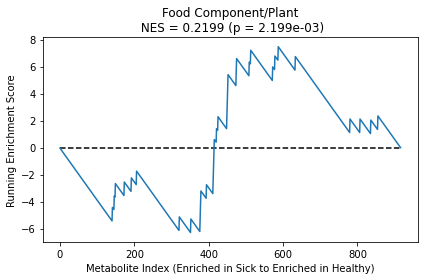

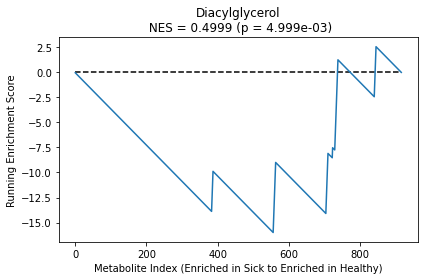

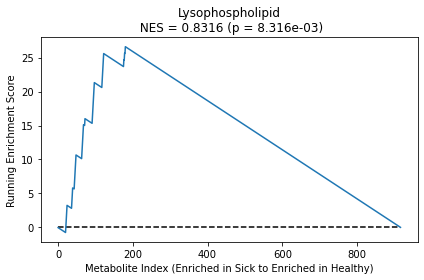

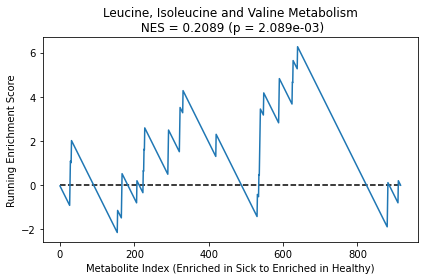

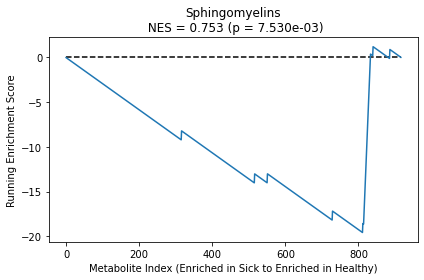

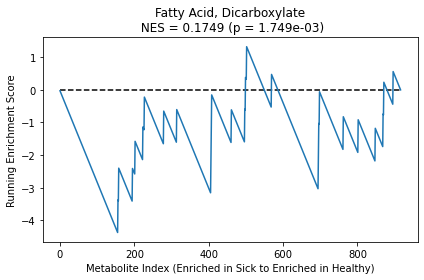

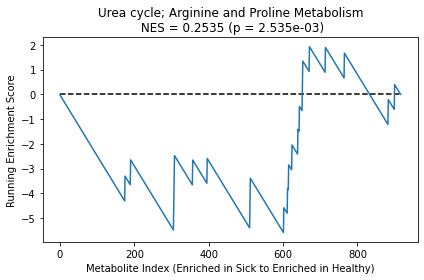

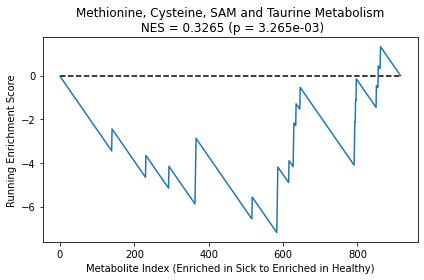

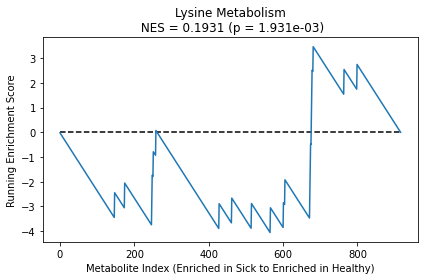

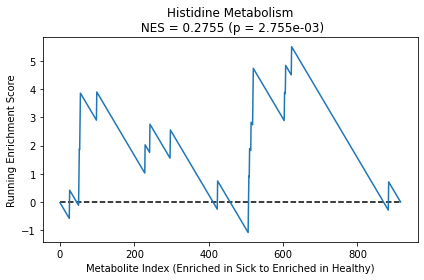

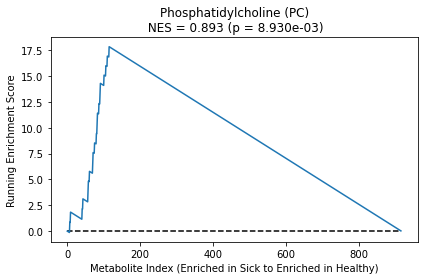

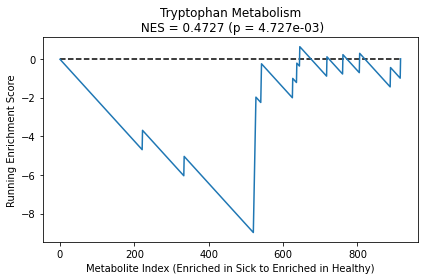

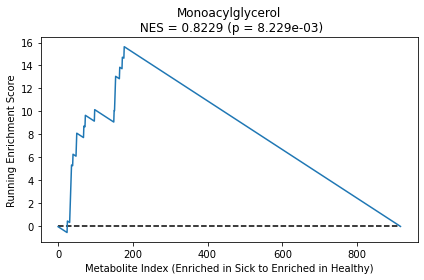

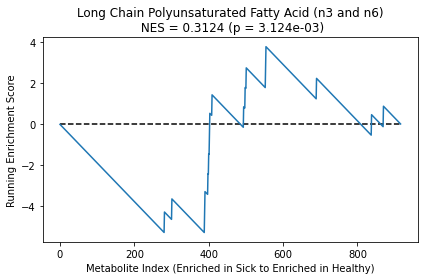

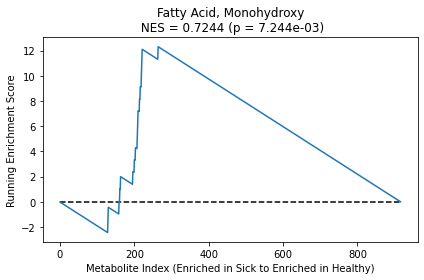

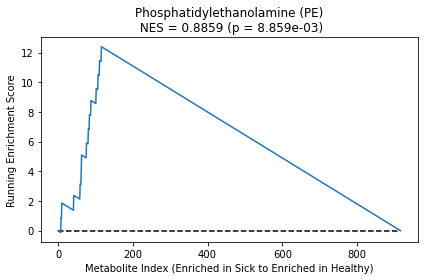

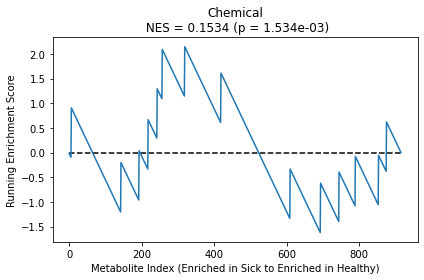

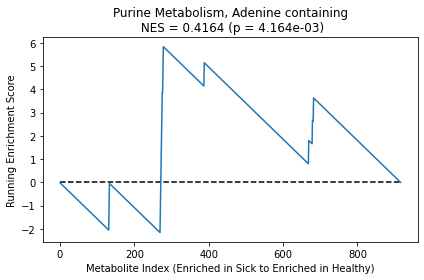

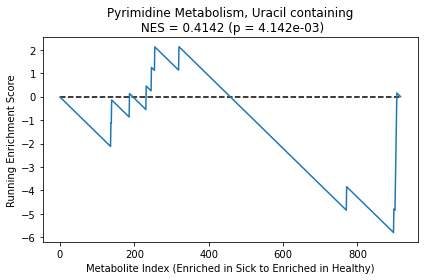

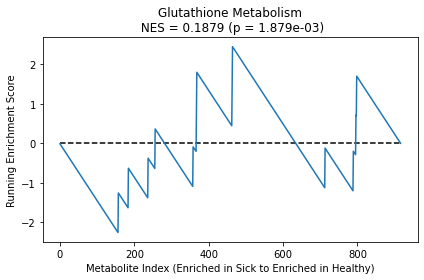

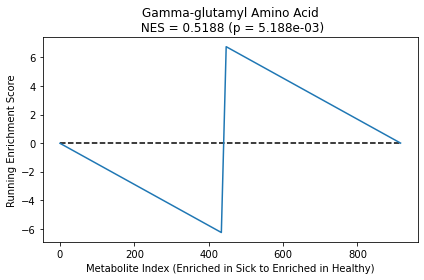

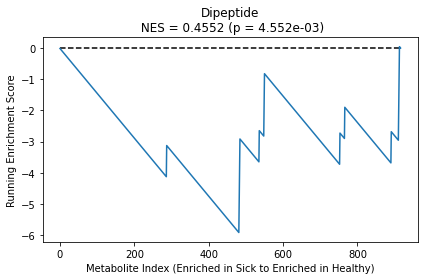

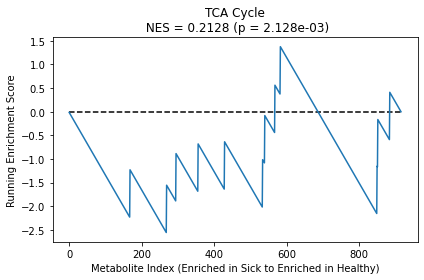

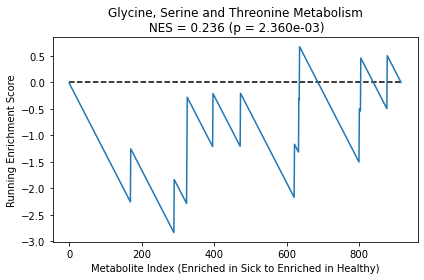

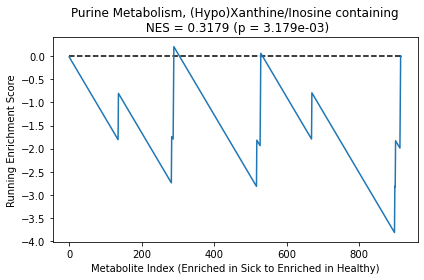

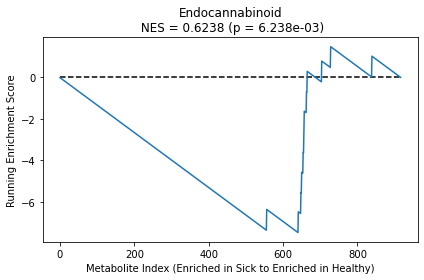

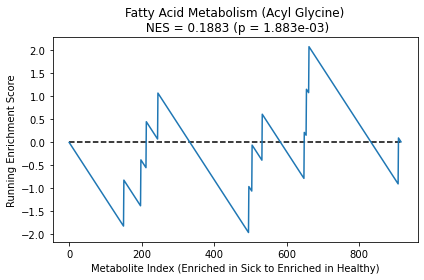

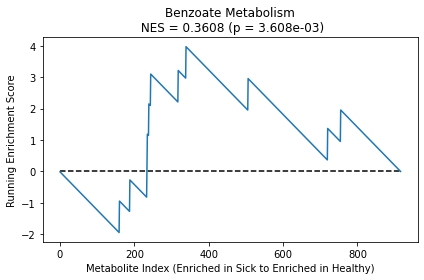

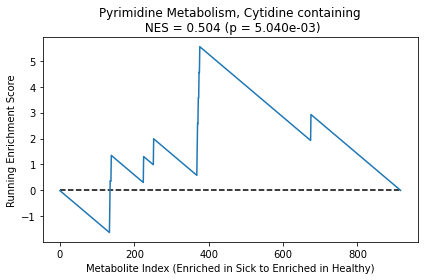

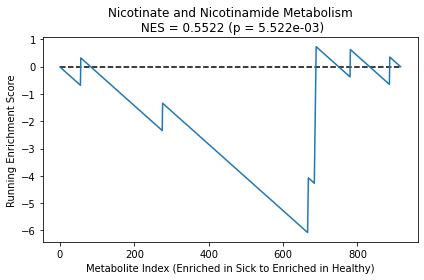

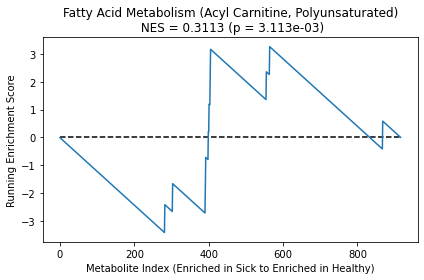

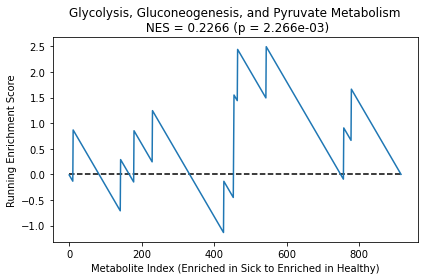

In [15]:
df_gsea = perform_GSEA(SNR_df_obs, list_nullSNR_DFs, metab_def, 10, 1)

In [81]:
df_gsea.sort_values(by='NES',ascending=False)

Pathway  Num_Metabs       NES  \
12                                   Monoacylglycerol          19  0.685676   
0                                Food Component/Plant          34  0.557391   
5                           Fatty Acid, Dicarboxylate          25  0.496951   
31  Glycolysis, Gluconeogenesis, and Pyruvate Meta...          11  0.479330   
3           Leucine, Isoleucine and Valine Metabolism          30  0.420105   
27               Fatty Acid Metabolism (Acyl Glycine)          11  0.418623   
9                            Phosphatidylcholine (PC)          20  0.391472   
14                            Fatty Acid, Monohydroxy          17  0.372614   
26         Pyrimidine Metabolism, Cytidine containing          11  0.364539   
29                                Benzoate Metabolism          11  0.363335   
19                             Glutathione Metabolism          13  0.355939   
21                          Gamma-glutamyl Amino Acid          13  0.339602   
13  Long Chain Polyunsaturated Fatty Acid (n3 and n6)          17  0.332288   
4                                      Sphingomyelins          26  0.331909   
10                               Histidine Metabolism          20  0.314604   
1                                      Diacylglycerol          32  0.309605   
18           Pyrimidine Metabolism, Uracil containing          14  0.299003   
30  Fatty Acid Metabolism (Acyl Carnitine, Polyuns...          11  0.292093   
20                                          Dipeptide          13  0.273570   
22  Purine Metabolism, (Hypo)Xanthine/Inosine cont...          12  0.272007   
16              Purine Metabolism, Adenine containing          14  0.271872   
24                                    Endocannabinoid          12  0.270442   
2                                    Lysophospholipid          32  0.268573   
23                                          TCA Cycle          12  0.262431   
25           Glycine, Serine and Threonine Metabolism          12  0.256906   
8                                   Lysine Metabolism          21  0.256324   
17                      Phosphatidylethanolamine (PE)          14  0.225360   
6    Methionine, Cysteine, SAM and Taurine Metabolism          22  0.201676   
7         Urea cycle; Arginine and Proline Metabolism          22  0.156729   
15                                           Chemical          14  0.155039   
28             Nicotinate and Nicotinamide Metabolism          11  0.150612   
11                              Tryptophan Metabolism          19  0.147404   

     p-value  
12  0.001558  
0   0.000880  
5   0.001199  
31  0.001315  
3   0.000956  
27  0.001355  
9   0.001061  
14  0.001091  
26  0.001287  
29  0.001286  
19  0.001213  
21  0.001160  
13  0.001581  
4   0.000839  
10  0.000998  
1   0.000830  
18  0.001019  
30  0.001385  
20  0.001290  
22  0.001155  
16  0.000992  
24  0.001267  
2   0.000954  
23  0.001152  
25  0.001129  
8   0.000945  
17  0.001049  
6   0.000771  
7   0.000830  
15  0.000991  
28  0.001152  
11  0.000974

# Investigating Differences in Glycolysis, TCA cycle

In [142]:
import seaborn as sns
glycolysis_metabs = ['glucose','1,5-anhydroglucitol (1,5-AG)',
                     'glucose 6-phosphate','Isobar: hexose diphosphates',
                     '2,3-diphosphoglycerate','3-phosphoglycerate','2-phosphoglycerate',
                     'phosphoenolpyruvate (PEP)','pyruvate','lactate']
TCA_metabs = ['pyruvate','lactate','acetyl-CoA', 'citrate','aconitate [cis or trans]','itaconate',
             'isocitrate','alpha-ketoglutarate','propionyl CoA','succinate','fumarate',
             'mesaconate (methylfumarate)','malate']
Energy_metabs = ['diadenosine triphosphate',"adenosine 3',5'-diphosphate","adenosine 3',5'-cyclic monophosphate (cAMP)",
                'NADH','NAD+']

glutamate_metabs = ['glutamine','glutamate','alpha-ketoglutarate','glycine','cysteine','gamma-glutamylcysteine',
                    'glutathione, reduced (GSH)','glutathione, oxidized (GSSG)','5-oxoproline',
                    'proline','citrulline','aspartate','arginine']

aminoAcids_metabs = ['arginine','histidine','lysine','aspartate','glutamate',
                    'serine','threonine','asparagine','glutamine','cysteine',
                    'glycine','proline',
                     'alanine','valine','isoleucine','leucine','methionine',
                     'phenylalanine','tyrosine','tryptophan']

bcaa_metabs = ['leucine','isoleucine','valine','N-acetylleucine','N-acetylisoleucine', 'N-acetylvaline', 
               'alpha-ketoglutarate','isovaleryl/2-methylbutyryl CoA','butyryl/isobutyryl CoA',
              '3-methylcrotonylglycine','tigloylglycine','3-methylglutaconate',
              '3-hydroxy-3-methylgluratrate', '3-hydroxyisobutyrate','propionyl CoA','acetyl-CoA']

leucine_metabs = ['leucine','N-acetylleucine','1-carboxyethylleucine','alpha-hydroxyisocaproate',
                  'isovaleryl/2-methylbutyryl CoA','isovalerylglycine','isovalerylcarnitine (C5)','3-methylcrotonylglycine',
                  'beta-hydroxyisovalerate','beta-hydroxyisovaleroylcarnitine','3-methylglutaconate','3-methylglutarylcarnitine (2)',
                  '3-hydroxy-3-methylglutarate', 'acetyl-CoA']

isoleucine_metabs = ['isoleucine','N-acetylisoleucine','1-carboxyethylisoleucine',
                     '2-hydroxy-3-methylvalerate','2-methylbutyrylcarnitine (C5)','2-methylbutyrylglycine (C5)',
                     'tiglyl carnitine (C5)','tigloylglycine','butyryl/isobutyryl CoA',
                     'ethylmalonate','methylsuccinate','methylsuccinoylcarnitine','acetyl-CoA']


valine_metabs = ['valine','N-acetylvaline','1-carboxyethylvaline',
                 'alpha-hydroxyisovalerate','butyryl/isobutyryl CoA','isobutyrylcarnitine (C4)','3-hydroxyisobutyrate',
                'propionyl CoA']

leucine_abridged_metabs = ['leucine','N-acetylleucine',
                  'isovaleryl/2-methylbutyryl CoA','isovalerylglycine',
                  'beta-hydroxyisovalerate','3-methylglutaconate',
                  '3-hydroxy-3-methylglutarate', 'acetyl-CoA']

isoleucine_abridged_metabs = ['isoleucine','N-acetylisoleucine','2-methylbutyrylglycine (C5)',
                     'tigloylglycine','butyryl/isobutyryl CoA','acetyl-CoA']


valine_abridged_metabs = ['valine','N-acetylvaline','alpha-hydroxyisovalerate','butyryl/isobutyryl CoA',
                          '3-hydroxyisobutyrate','propionyl CoA']



# https://www.researchgate.net/publication/288663571/figure/fig7/AS:340012789977090@1458076774277/Pathways-for-branched-chain-amino-acid-catabolism-Valine-degradation-produces-one.png


def get_chemIDlist(metab_def, list_metabs):
    chemIDlist = list()
    for i in range(len(list_metabs)):
        string = list_metabs[i]
        print(string)
        chemIDlist.append(metab_def.loc[metab_def['BIOCHEMICAL']==string, 'CHEMICAL ID'].iloc[0])
#     df_list = metab_def[metab_def.BIOCHEMICAL.isin(list_metabs)]
    print(chemIDlist)
    chemIDlist = ['X'+str(string) for string in chemIDlist]
    return chemIDlist

def plot_swarm_metabs(df_in, temp_thresh, rotation_val, title_str, fig_size, marker_size):
    df = pd.melt(df_in, id_vars='Final_Temp')
    df['Temp_binary'] = np.where(df['Final_Temp'] >= temp_thresh, "$\geq$ {}C".format(round(temp_thresh)),
                                  "< {}C".format(round(temp_thresh)))
    fig, ax = plt.subplots(figsize=fig_size)
    sns.set_context("talk")
#     sns.set(font_scale=1.4)
#     sns.stripplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=7,jitter=True,dodge=True)
    sns.swarmplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=marker_size, dodge=True)
    sns.boxplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax,
#                 showmeans=True,
#                 meanline=True,
                medianprops={'color':'k','ls':'-','lw':3},
                meanprops={'visible': False},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[2:4], labels[2:4])
    
    ax.tick_params(axis='x', rotation=rotation_val)
    plt.xlabel('Metabolite')
    plt.ylabel('Median-Normalized Value')
    plt.title(title_str)
    plt.show()
    
def plot_violin_metabs(df_in, temp_thresh, rotation_val, title_str, fig_size, marker_size,fn_out):
    df = pd.melt(df_in, id_vars='Final_Temp')
    df['Temp_binary'] = np.where(df['Final_Temp'] >= temp_thresh, "$\geq$ {}C".format(round(temp_thresh)),
                                  "< {}C".format(round(temp_thresh)))
    fig, ax = plt.subplots(figsize=fig_size)
    sns.set_context("talk")
#     sns.set(font_scale=1.4)
#     sns.stripplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=7,jitter=True,dodge=True)
    sns.violinplot(x='variable', y='value',hue="Temp_binary",
                   data=df,ax=ax, split=False,
                  scale="count", inner="quartile")
    sns.swarmplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=marker_size, dodge=True, color="black")
    
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2])

    ax.tick_params(axis='x', rotation=rotation_val)
    plt.xlabel('Metabolite')
    plt.ylabel('Median-Normalized Value')
    plt.title(title_str)
    plt.tight_layout()
    plt.savefig(fn_out)
    plt.show()

In [83]:
# Subset DF to include Energy_metabs
merged_data.head()

Unnamed: 0 parent_sample_name  Group CLIENT_IDENTIFIER PARAM_AGE  \
0           1         HARV-24509  EH_WT               EH5        8w   
1           2         HARV-24510  EH_WT               EH7        8w   
2           3         HARV-24511  EH_WT               EH9        6w   
3           4         HARV-24512  EH_WT              EH11        7w   
4           5         HARV-24514  ES_WT               ES4        8w   

  PARAM_ANIMAL_ID PARAM_CLIENT_SAMPLE_ID PARAM_GENDER PARAM_GROUP_ID  \
0      12.7.18_#7       Early healthy WT            M          EH_WT   
1     12.7.18_#11       Early healthy WT            F          EH_WT   
2       2.1.19_#6       Early healthy WT            M          EH_WT   
3      6.11.19_#7       Early healthy WT            F          EH_WT   
4     12.7.18_#14          Early sick WT            F          ES_WT   

   HPI.Sacced  ...  X100001394 X100001451    X566  X100003640  X100003641  \
0          60  ...      0.2880     1.0257  0.6015      1.1362      1.0880   
1          60  ...      1.5633     1.5438  0.8071      0.7525      0.7213   
2          46  ...      0.9881     1.0104  0.4416      1.0011      0.9842   
3          57  ...      0.8733     0.8915  0.6896      0.5123      0.6470   
4          60  ...      1.1748     1.2712  0.9087      1.6988      1.2799   

   X100003210   X1004  X100000299  X100000015  year  
0      0.9940  0.9168      1.2714      1.2557  2018  
1      1.3981  1.0934      1.5455      0.8756  2018  
2      0.6383  0.9799      1.8851      0.7286  2019  
3      0.9666  0.8868      0.5241      0.6401  2019  
4      1.2191  1.4242      3.6886      0.3365  2018  

[5 rows x 931 columns]

### Energy sources

In [84]:
chemID_energy = get_chemIDlist(metab_def, Energy_metabs)
chemID_energy

['X100002712', 'X1214', 'X207', 'X428', 'X1310']

In [85]:
df_1 = merged_data.loc[:,chemID_energy]
df_1.columns = ['ATP','ADP','cAMP','NADH','NAD']
df_1['ATP/ADP'] = df_1.ATP / df_1.ADP
df_1['ATP/cAMP'] = df_1.ATP / df_1.cAMP
df_1['NAD/NADH'] = df_1.NAD / df_1.NADH
df_1['Final_Temp'] = merged_data['Final.Temp']
df_1.head()

ATP     ADP    cAMP    NADH     NAD   ATP/ADP  ATP/cAMP  NAD/NADH  \
0  1.8042  1.0181  0.8351  1.4050  1.1703  1.772125  2.160460  0.832954   
1  0.9636  0.3177  0.9181  0.8378  0.6726  3.033050  1.049559  0.802817   
2  0.9108  0.4369  0.7278  3.5339  2.2410  2.084688  1.251443  0.634144   
3  1.0078  1.0724  0.8302  1.6462  1.2176  0.939761  1.213924  0.739643   
4  0.8683  0.8313  0.9380  1.1204  1.0109  1.044509  0.925693  0.902267   

   Final_Temp  
0        36.1  
1        36.9  
2        35.3  
3        36.5  
4        31.4

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


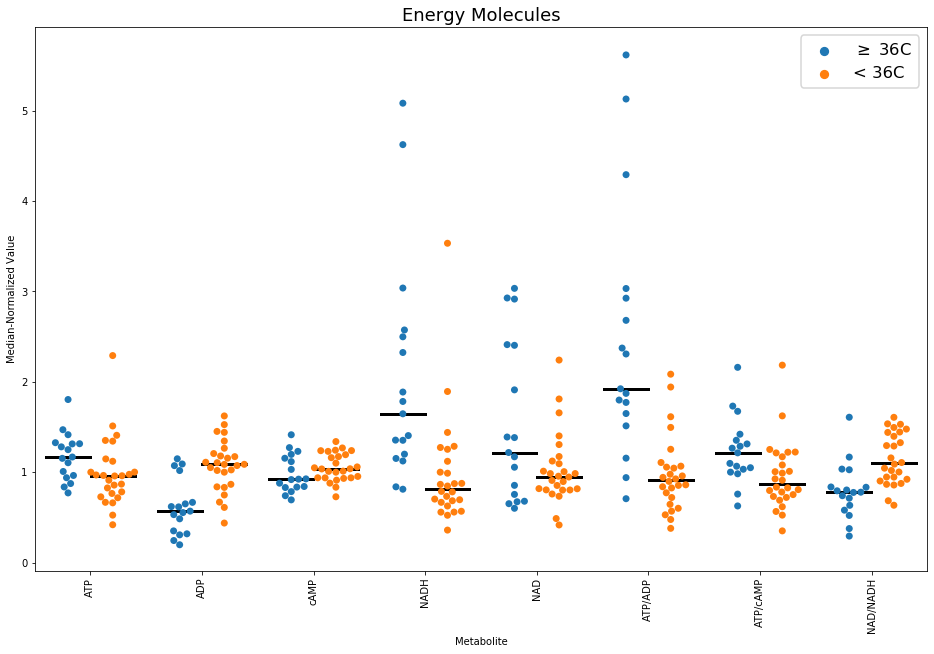

In [86]:
plot_swarm_metabs(df_1, 36,90,'Energy Molecules',(16,10),7)

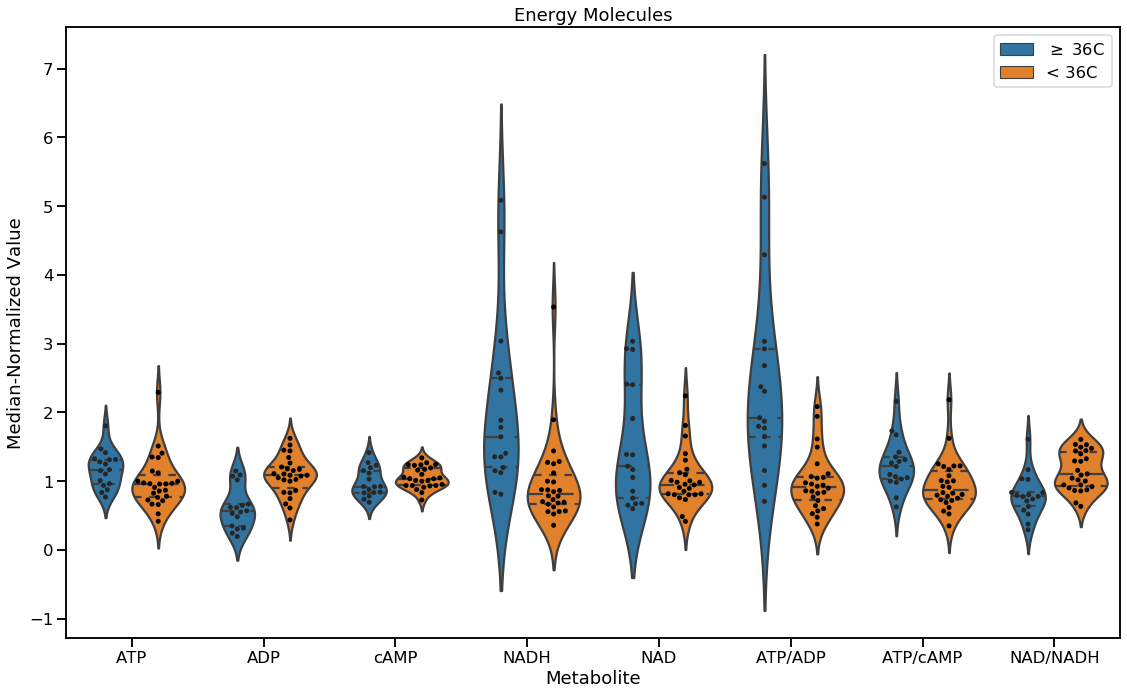

In [87]:
plot_violin_metabs(df_1, 36,0,'Energy Molecules',(16,10),5,'../processed/violin_energymolecules.png')

### Glycolysis

In [88]:
# repeat for glycolysis 
chemID_glyco = get_chemIDlist(metab_def, glycolysis_metabs)
chemID_glyco

['X572',
 'X100000580',
 'X291',
 'X100002180',
 'X1227',
 'X132',
 'X100000093',
 'X463',
 'X823',
 'X482']

In [89]:
df_2 = merged_data.loc[:,chemID_glyco]
df_2.columns = ['glucose','1,5-anhydroglucitol',
                'glucose 6-phosphate','hexose diphosphates',
                '2,3-diphosphoglycerate','3-phosphoglycerate',
                '2-phosphoglycerate','phosphoenolpyruvate',
                'pyruvate','lactate']
df_2['Final_Temp'] = merged_data['Final.Temp']
df_2.head()

glucose  1,5-anhydroglucitol  glucose 6-phosphate  hexose diphosphates  \
0   4.3787               2.0301               3.4676               1.8054   
1   5.1987               4.4957               4.1887               0.5094   
2   6.8774               2.3847               6.4982               0.9946   
3   1.0000               1.3870               0.5759               0.8557   
4   0.7993               0.2529               0.3369               1.1934   

   2,3-diphosphoglycerate  3-phosphoglycerate  2-phosphoglycerate  \
0                  2.3496              0.9980              1.2864   
1                  0.9701              0.7890              0.8760   
2                  1.0000              1.4869              1.4034   
3                  1.5085              1.4924              1.3142   
4                  1.9029              1.0880              1.3077   

   phosphoenolpyruvate  pyruvate  lactate  Final_Temp  
0               2.1997    1.4849   4.2316        36.1  
1               1.0545    1.3657   3.1496        36.9  
2               1.7625    1.7964   3.6077        35.3  
3               1.0000    0.6620   0.8747        36.5  
4               0.9619    0.7313   1.1182        31.4

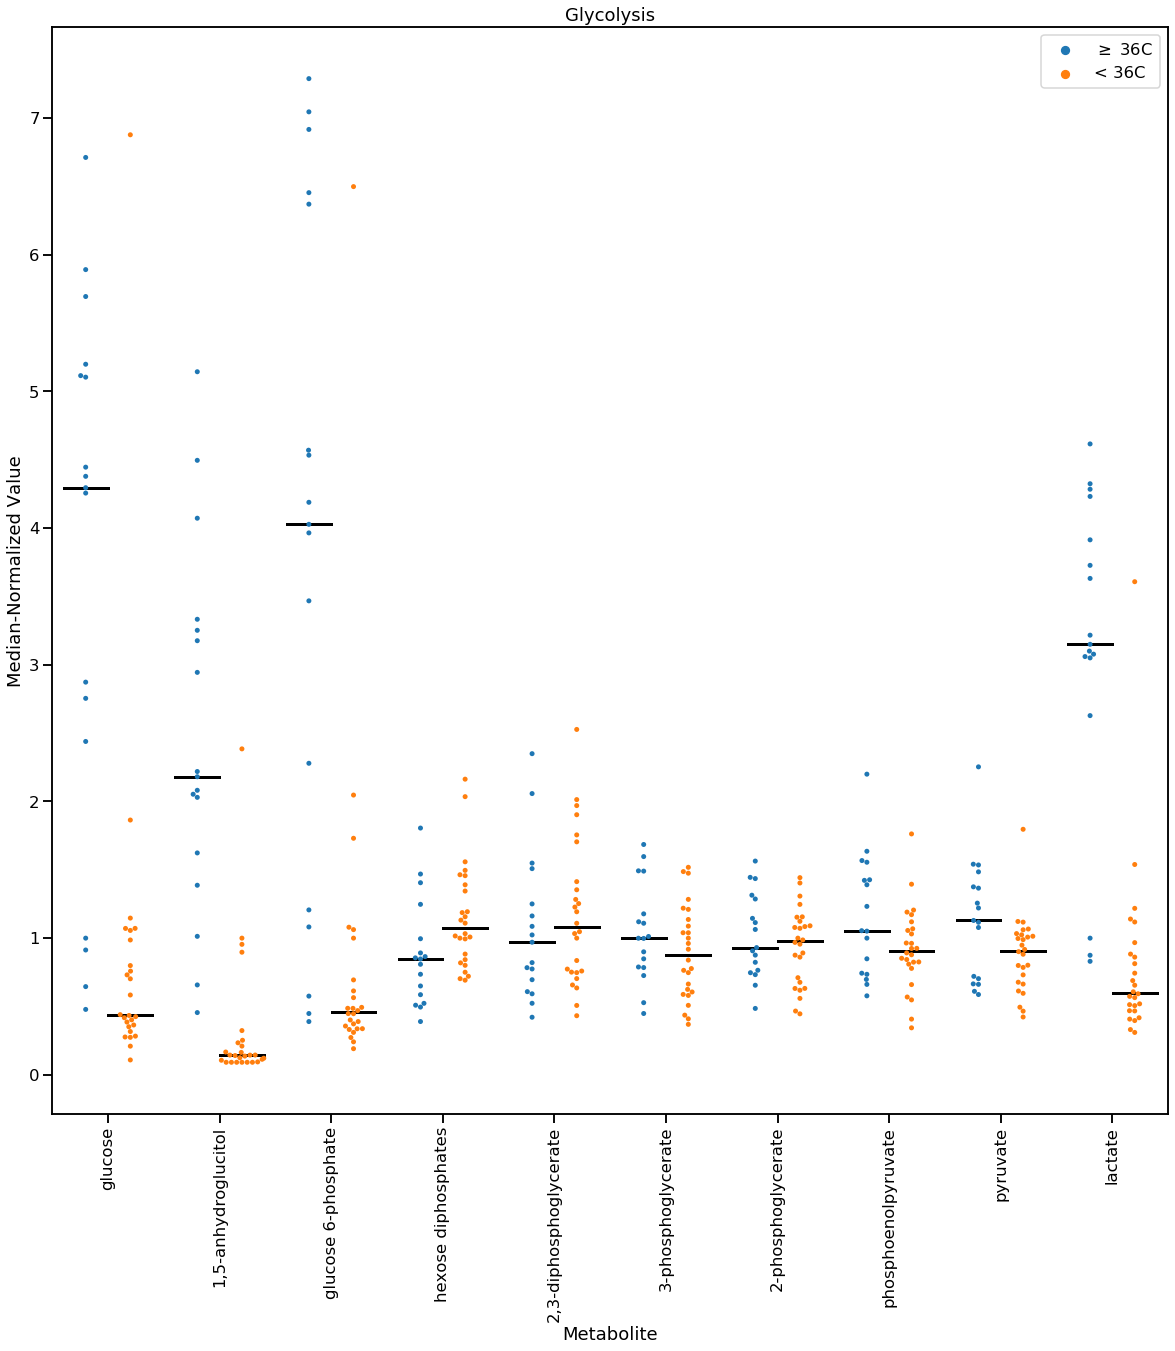

In [90]:
plot_swarm_metabs(df_2, 36,90,'Glycolysis',(20,20),5)

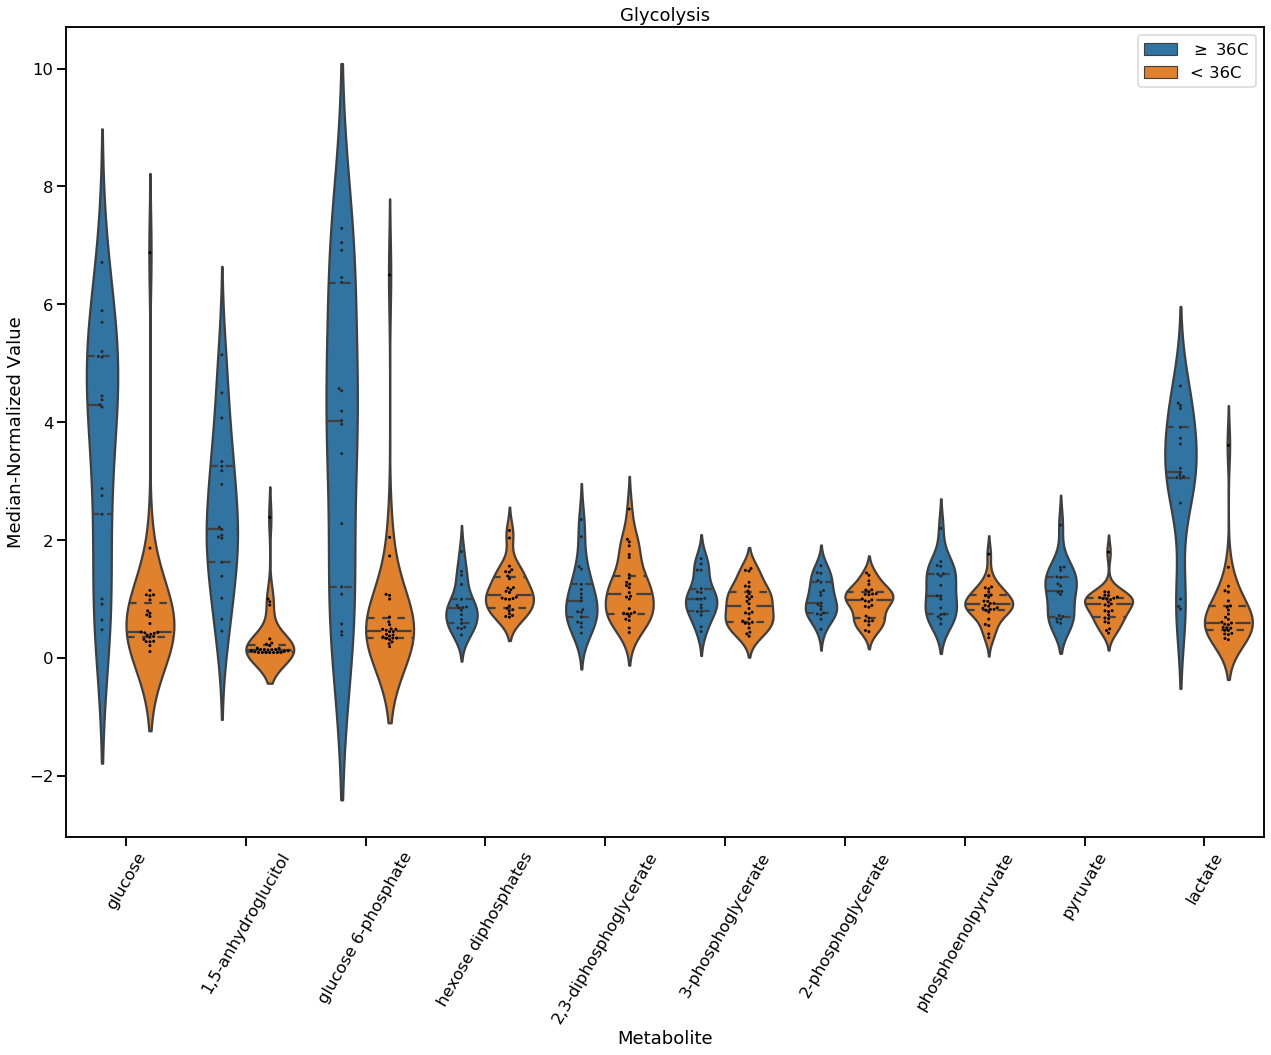

In [91]:
plot_violin_metabs(df_2, 36,60,'Glycolysis',(18,15),3,'../processed/violin_glycolysis.png')

### TCA

In [92]:
# repeat for TCA
chemID_TCA = get_chemIDlist(metab_def, TCA_metabs)
chemID_TCA

['X823',
 'X482',
 'X1830',
 'X1124',
 'X100001359',
 'X100000455',
 'X1206',
 'X93',
 'X100000355',
 'X252',
 'X330',
 'X100000446',
 'X409']

In [93]:
df_3 = merged_data.loc[:,chemID_TCA]
df_3.columns = ['pyruvate','lactate','acetyl-CoA', 'citrate','aconitate','itaconate',
             'isocitrate','alpha-ketoglutarate','propionyl CoA','succinate','fumarate',
             'methylfumarate','malate']
df_3['alpha-KG/succinate'] = df_3['alpha-ketoglutarate'] / df_3['succinate']
df_3['itaconate/succinate'] = df_3['itaconate'] / df_3['succinate']

df_3['Final_Temp'] = merged_data['Final.Temp']
df_3.head()

pyruvate  lactate  acetyl-CoA  citrate  aconitate  itaconate  isocitrate  \
0    1.4849   4.2316      0.9974   0.8943     0.8339     0.4489      0.8210   
1    1.3657   3.1496      1.0026   0.5156     0.6282     0.5674      1.0512   
2    1.7964   3.6077      1.8163   0.4788     0.3027     0.0088      0.7090   
3    0.6620   0.8747      2.0241   0.6945     0.6163     1.0012      1.0413   
4    0.7313   1.1182      0.8508   0.5673     0.4979     1.1740      0.9037   

   alpha-ketoglutarate  propionyl CoA  succinate  fumarate  methylfumarate  \
0               0.8966         1.2169     1.2018    1.0844          0.4864   
1               0.6442         2.1693     1.6488    1.0863          0.5888   
2               1.1144         1.9246     1.5581    1.1510          0.0260   
3               0.5148         1.3032     1.4394    0.9691          1.4686   
4               0.8342         1.0780     1.8561    0.6895          1.3864   

   malate  alpha-KG/succinate  itaconate/succinate  Final_Temp  
0  1.6079            0.746048             0.373523        36.1  
1  1.3357            0.390708             0.344129        36.9  
2  1.3757            0.715230             0.005648        35.3  
3  1.1372            0.357649             0.695568        36.5  
4  0.7201            0.449437             0.632509        31.4

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


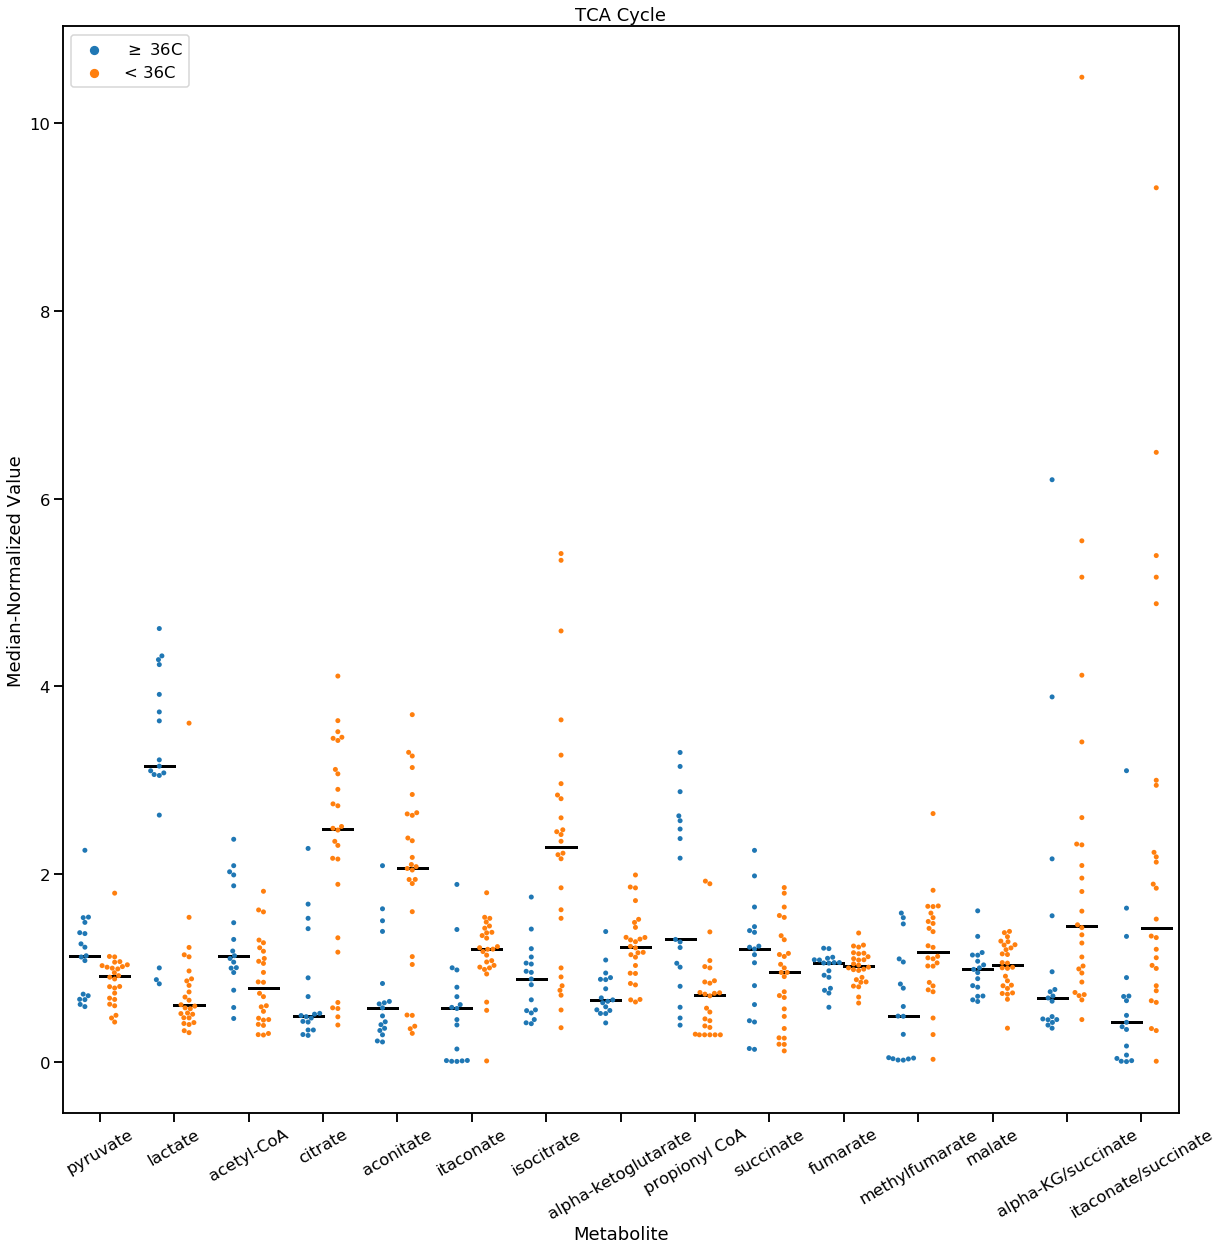

In [94]:
plot_swarm_metabs(df_3, 36,30,'TCA Cycle',(20,20),5)

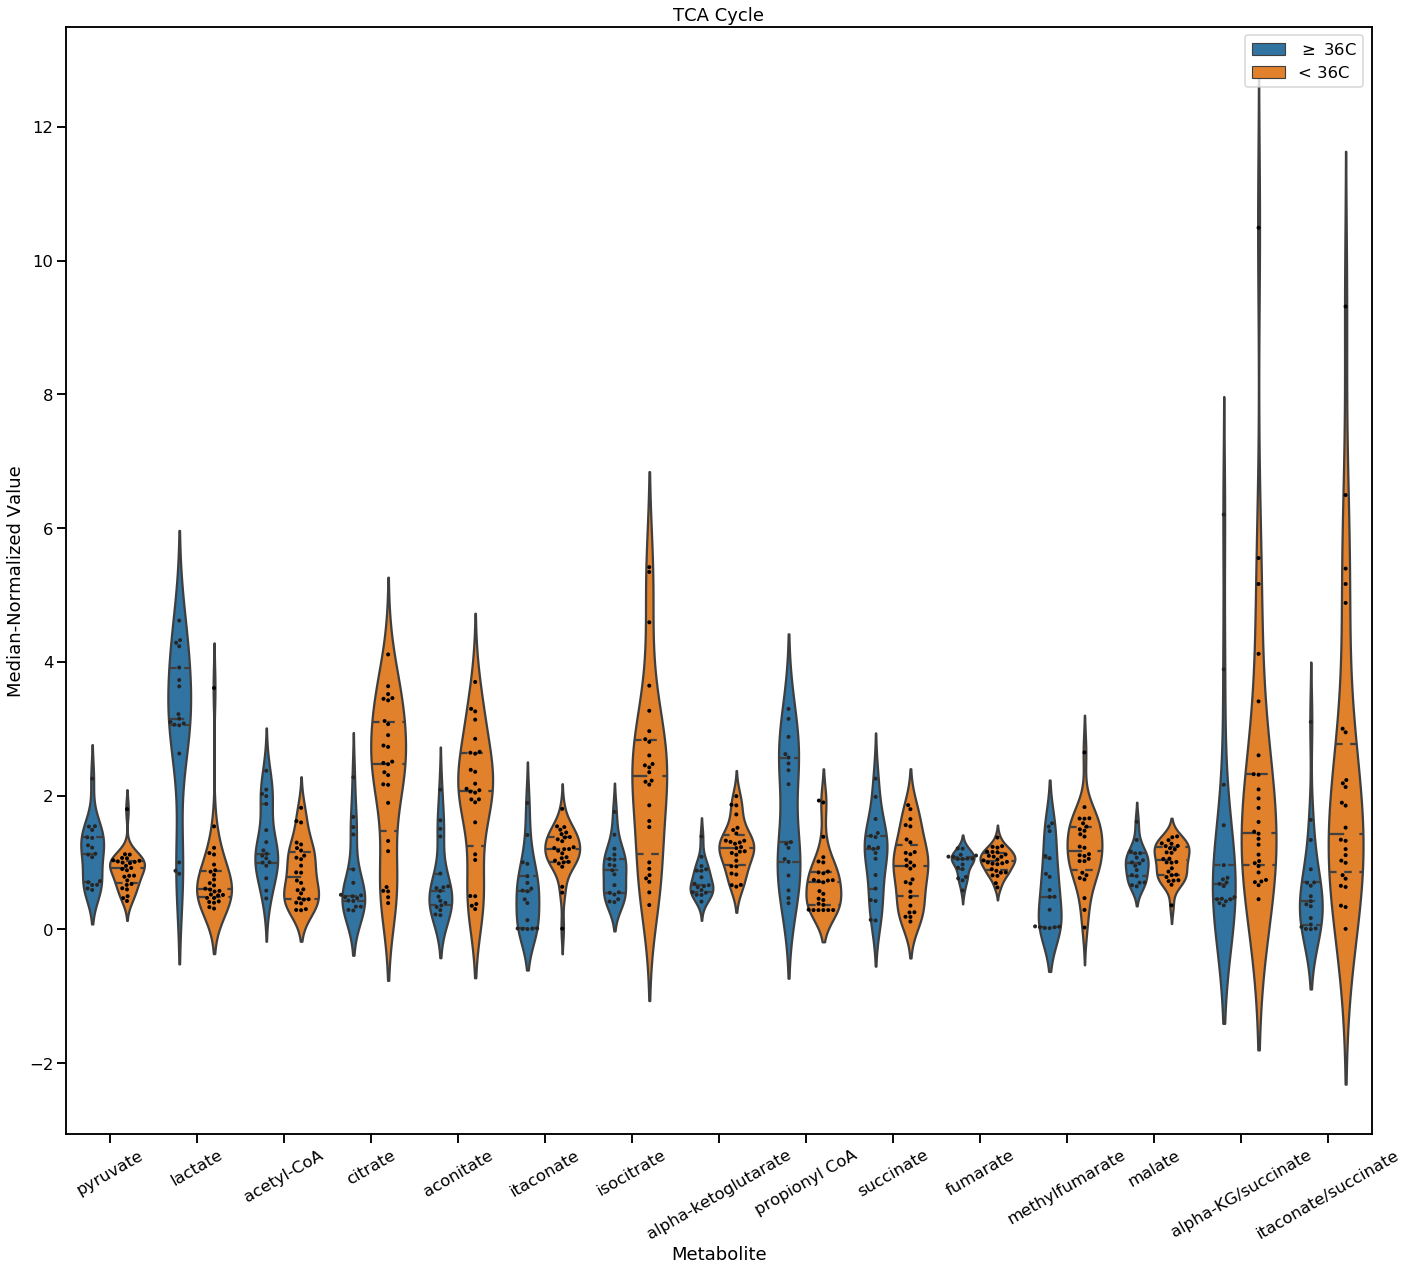

In [95]:
plot_violin_metabs(df_3, 36,30,'TCA Cycle',(20,18),4,'../processed/violin_TCA.png')

### Glutamine metab

In [96]:
# repeat for glutamine
chemID_glut = get_chemIDlist(metab_def, glutamate_metabs)
chemID_glut

['X563',
 'X561',
 'X93',
 'X340',
 'X800',
 'X1036',
 'X496',
 'X448',
 'X1021',
 'X480',
 'X391',
 'X234',
 'X231']

In [97]:
df_4 = merged_data.loc[:,chemID_glut]
df_4.columns = ['glutamine','glutamate','alpha-ketoglutarate','glycine','cysteine','gamma-glutamylcysteine',
                    'GSH','GSSG','5-oxoproline','proline','citrulline','aspartate','arginine']
df_4['Final_Temp'] = merged_data['Final.Temp']
df_4.head()

glutamine  glutamate  alpha-ketoglutarate  glycine  cysteine  \
0     0.6664     0.9389               0.8966   1.0400    1.2209   
1     0.5963     1.0734               0.6442   0.8835    1.3271   
2     0.7331     0.8551               1.1144   1.1262    0.9508   
3     0.6870     1.0220               0.5148   0.8538    0.9722   
4     1.4299     1.1964               0.8342   0.7506    1.1955   

   gamma-glutamylcysteine     GSH    GSSG  5-oxoproline  proline  citrulline  \
0                  2.1287  2.8817  1.1702        0.7146   1.0063      1.0015   
1                  6.2252  4.9837  1.1231        0.5237   1.1434      0.8497   
2                  5.8977  5.0294  1.1851        0.5058   0.6568      0.7593   
3                  0.5930  0.4762  0.8710        0.6170   0.7858      1.0683   
4                  0.2770  0.2202  0.9084        1.6203   1.0225      0.9578   

   aspartate  arginine  Final_Temp  
0     1.1283    1.1085        36.1  
1     1.0247    0.9704        36.9  
2     0.6934    0.5950        35.3  
3     1.1339    1.1002        36.5  
4     0.6295    0.8879        31.4

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


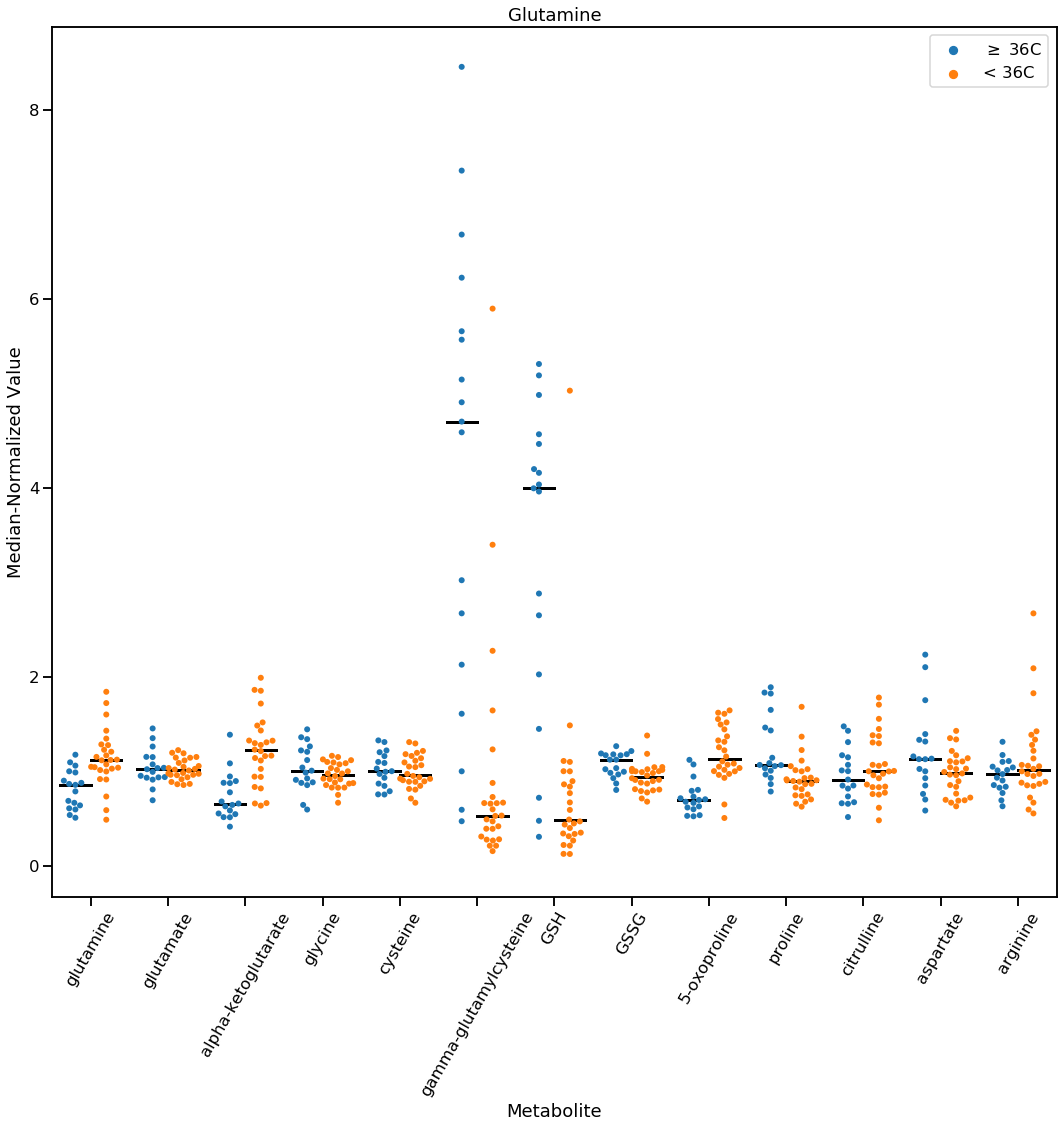

In [98]:
plot_swarm_metabs(df_4, 36,60, 'Glutamine',(18,16),6)

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


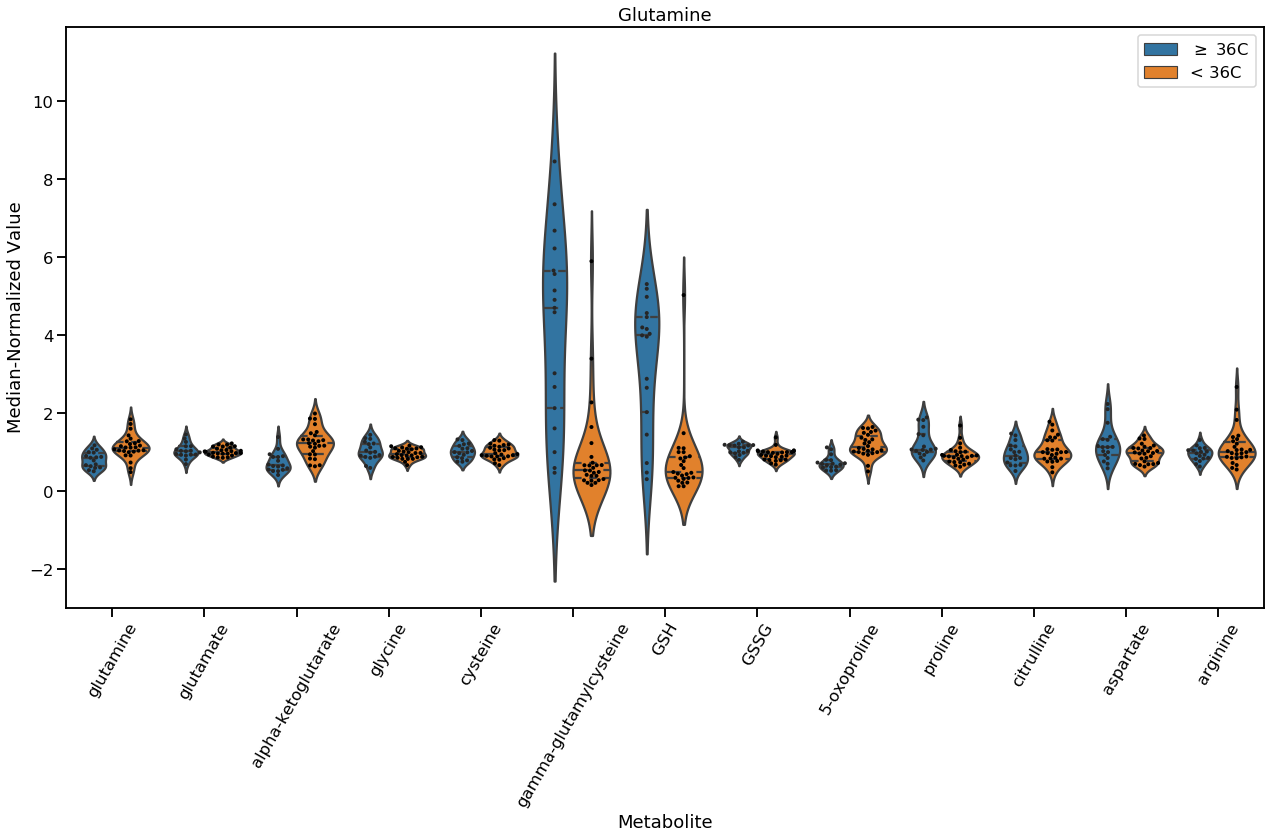

In [99]:
plot_violin_metabs(df_4, 36,60, 'Glutamine',(18,12),4,'../processed/violin_glutamine.png')

Oxoproline and GSH and gamma-glutamylcysteine are differential

### Amino acids

In [100]:
# repeat for amino acids
chemID_AA = get_chemIDlist(metab_def, aminoAcids_metabs)
chemID_AA

['X231',
 'X355',
 'X407',
 'X234',
 'X561',
 'X503',
 'X564',
 'X917',
 'X563',
 'X800',
 'X340',
 'X480',
 'X811',
 'X566',
 'X376',
 'X397',
 'X415',
 'X460',
 'X815',
 'X565']

In [101]:
df_5 = merged_data.loc[:,chemID_AA]
# df_5.columns = ['arginine','histidine','lysine','aspartate','glutamate',
#                     'serine','threonine','asparagine','glutamine','cysteine',
#                     'glycine','proline',
#                      'alanine','valine','isoleucine','leucine','methionine',
#                      'phenylalanine','tyrosine','tryptophan']
df_5.columns = aminoAcids_metabs
df_5['Final_Temp'] = merged_data['Final.Temp']
df_5.head()

arginine  histidine  lysine  aspartate  glutamate  serine  threonine  \
0    1.1085     0.8611  0.9447     1.1283     0.9389  1.0822     0.8875   
1    0.9704     0.5584  1.1625     1.0247     1.0734  0.9910     0.9336   
2    0.5950     0.8900  0.7348     0.6934     0.8551  1.0196     0.7846   
3    1.1002     0.7720  1.0260     1.1339     1.0220  0.8883     0.8522   
4    0.8879     1.1573  0.8157     0.6295     1.1964  0.6499     1.0634   

   asparagine  glutamine  cysteine  ...  proline  alanine  valine  isoleucine  \
0      1.5500     0.6664    1.2209  ...   1.0063   1.6959  0.6015      0.8461   
1      0.9275     0.5963    1.3271  ...   1.1434   2.1213  0.8071      0.9178   
2      0.8645     0.7331    0.9508  ...   0.6568   2.1004  0.4416      0.6254   
3      0.9430     0.6870    0.9722  ...   0.7858   0.9532  0.6896      0.8433   
4      1.0007     1.4299    1.1955  ...   1.0225   0.8946  0.9087      1.0290   

   leucine  methionine  phenylalanine  tyrosine  tryptophan  Final_Temp  
0   0.7514      1.0285         0.8237    1.0566      1.3245        36.1  
1   0.9376      1.6441         1.0147    1.2030      1.3250        36.9  
2   0.5589      0.7649         0.6118    0.9125      0.6514        35.3  
3   0.7792      0.8079         0.7567    0.8224      1.1280        36.5  
4   1.0343      1.0220         0.9880    1.0876      1.1022        31.4  

[5 rows x 21 columns]

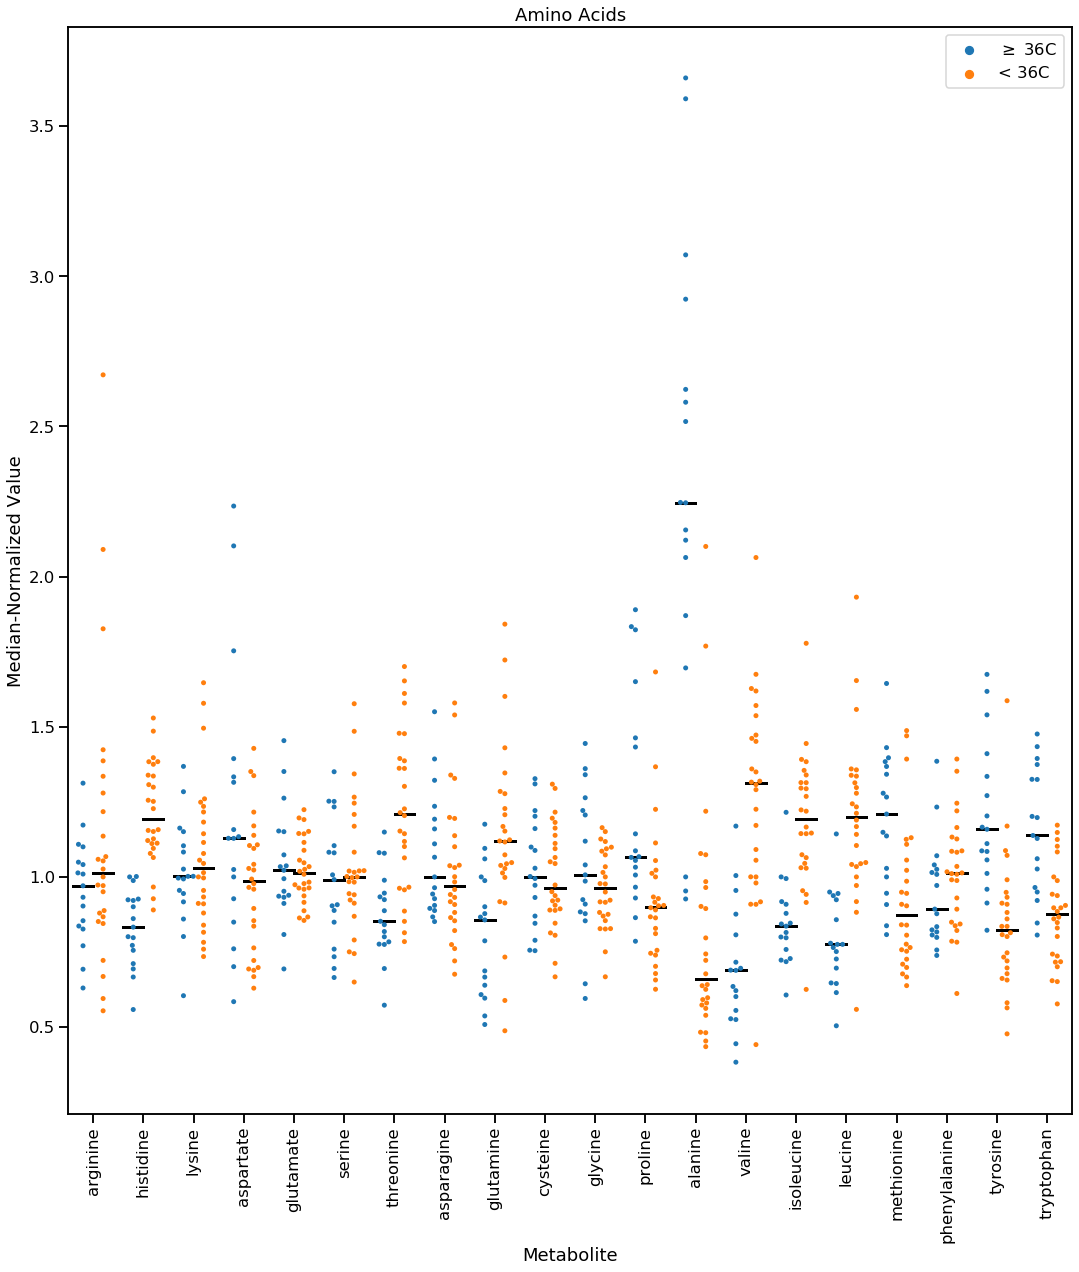

In [102]:
plot_swarm_metabs(df_5, 36,90, 'Amino Acids',(18,20),5)

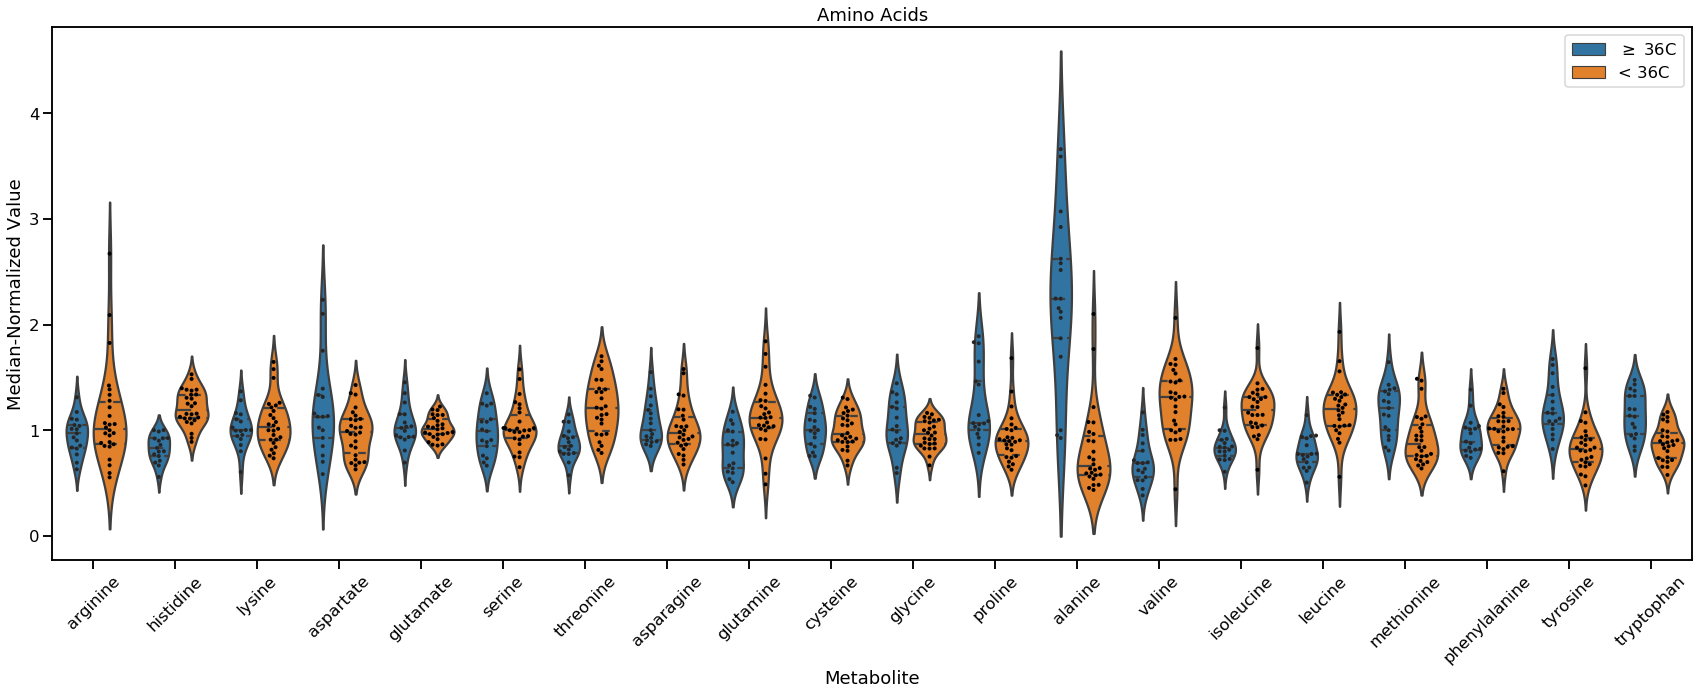

In [103]:
plot_violin_metabs(df_5, 36,45, 'Amino Acids',(24,10),4,'../processed/violin_aminoacids.png')

Histidine, Threonine, glutamine, BCAAs, alanine seem differential

## BCAA

In [104]:
# repeat for glycolysis 
chemID_leucine = get_chemIDlist(metab_def, leucine_metabs)
chemID_isoleucine = get_chemIDlist(metab_def, isoleucine_metabs)
chemID_valine = get_chemIDlist(metab_def, valine_metabs)

chemID_leucine_abr = get_chemIDlist(metab_def, leucine_abridged_metabs)
chemID_isoleucine_abr = get_chemIDlist(metab_def, isoleucine_abridged_metabs)
chemID_valine_abr = get_chemIDlist(metab_def, valine_abridged_metabs)



In [105]:
df_6 = merged_data.loc[:,chemID_leucine]
df_7 = merged_data.loc[:,chemID_isoleucine]
df_8 = merged_data.loc[:,chemID_valine]

df_9 = merged_data.loc[:,chemID_leucine_abr]
df_10 = merged_data.loc[:,chemID_isoleucine_abr]
df_11 = merged_data.loc[:,chemID_valine_abr]

df_6.columns = ['leucine','N-acetylleucine','1-carboxyethylleucine','alpha-hydroxyisocaproate',
                  'isovaleryl CoA','isovalerylglycine','isovalerylcarnitine','3-methylcrotonylglycine',
                  'beta-hydroxyisovalerate','beta-hydroxyisovaleroylcarnitine','3-methylglutaconate','3-methylglutarylcarnitine',
                  '3-hydroxy-3-methylglutarate', 'acetyl-CoA']

df_7.columns = ['isoleucine','N-acetylisoleucine','1-carboxyethylisoleucine',
                     '2-hydroxy-3-methylvalerate','2-methylbutyrylcarnitine','2-methylbutyrylglycine',
                     'tiglyl carnitine','tigloylglycine','butyryl/isobutyryl CoA',
                     'ethylmalonate','methylsuccinate','methylsuccinoylcarnitine','acetyl-CoA']


df_8.columns = ['valine','N-acetylvaline','1-carboxyethylvaline',
                 'alpha-hydroxyisovalerate','butyryl/isobutyryl CoA','isobutyrylcarnitine','3-hydroxyisobutyrate',
                'propionyl CoA']

df_9.columns = leucine_abridged_metabs
df_10.columns = isoleucine_abridged_metabs
df_11.columns = valine_abridged_metabs


df_6['Final_Temp'] = merged_data['Final.Temp']
df_7['Final_Temp'] = merged_data['Final.Temp']
df_8['Final_Temp'] = merged_data['Final.Temp']

df_9['Final_Temp'] = merged_data['Final.Temp']
df_10['Final_Temp'] = merged_data['Final.Temp']
df_11['Final_Temp'] = merged_data['Final.Temp']

df_6.head()

leucine  N-acetylleucine  1-carboxyethylleucine  alpha-hydroxyisocaproate  \
0   0.7514           0.8666                 2.1458                    0.3016   
1   0.9376           0.6646                 1.8699                    0.1348   
2   0.5589           0.3959                 1.3781                    0.1348   
3   0.7792           0.7722                 0.7478                    0.3116   
4   1.0343           0.6216                 0.9212                    0.9917   

   isovaleryl CoA  isovalerylglycine  isovalerylcarnitine  \
0          0.3218             0.6592               0.1839   
1          0.7804             1.0289               2.3714   
2          0.5727             0.5259               0.3742   
3          1.2996             0.7734               1.3345   
4          0.7806             1.2972               1.1733   

   3-methylcrotonylglycine  beta-hydroxyisovalerate  \
0                   0.5635                   0.5863   
1                   0.6669                   0.4492   
2                   0.4728                   0.4883   
3                   1.0000                   1.0551   
4                   1.0712                   1.7943   

   beta-hydroxyisovaleroylcarnitine  3-methylglutaconate  \
0                            0.3673               0.3065   
1                            0.6498               0.5106   
2                            0.8644               0.4270   
3                            1.1174               1.0000   
4                            1.1857               1.9021   

   3-methylglutarylcarnitine  3-hydroxy-3-methylglutarate  acetyl-CoA  \
0                     0.8067                       0.4443      0.9974   
1                     5.8692                       0.4089      1.0026   
2                     0.7808                       0.1373      1.8163   
3                     2.5312                       1.5037      2.0241   
4                     2.0243                       3.1458      0.8508   

   Final_Temp  
0        36.1  
1        36.9  
2        35.3  
3        36.5  
4        31.4

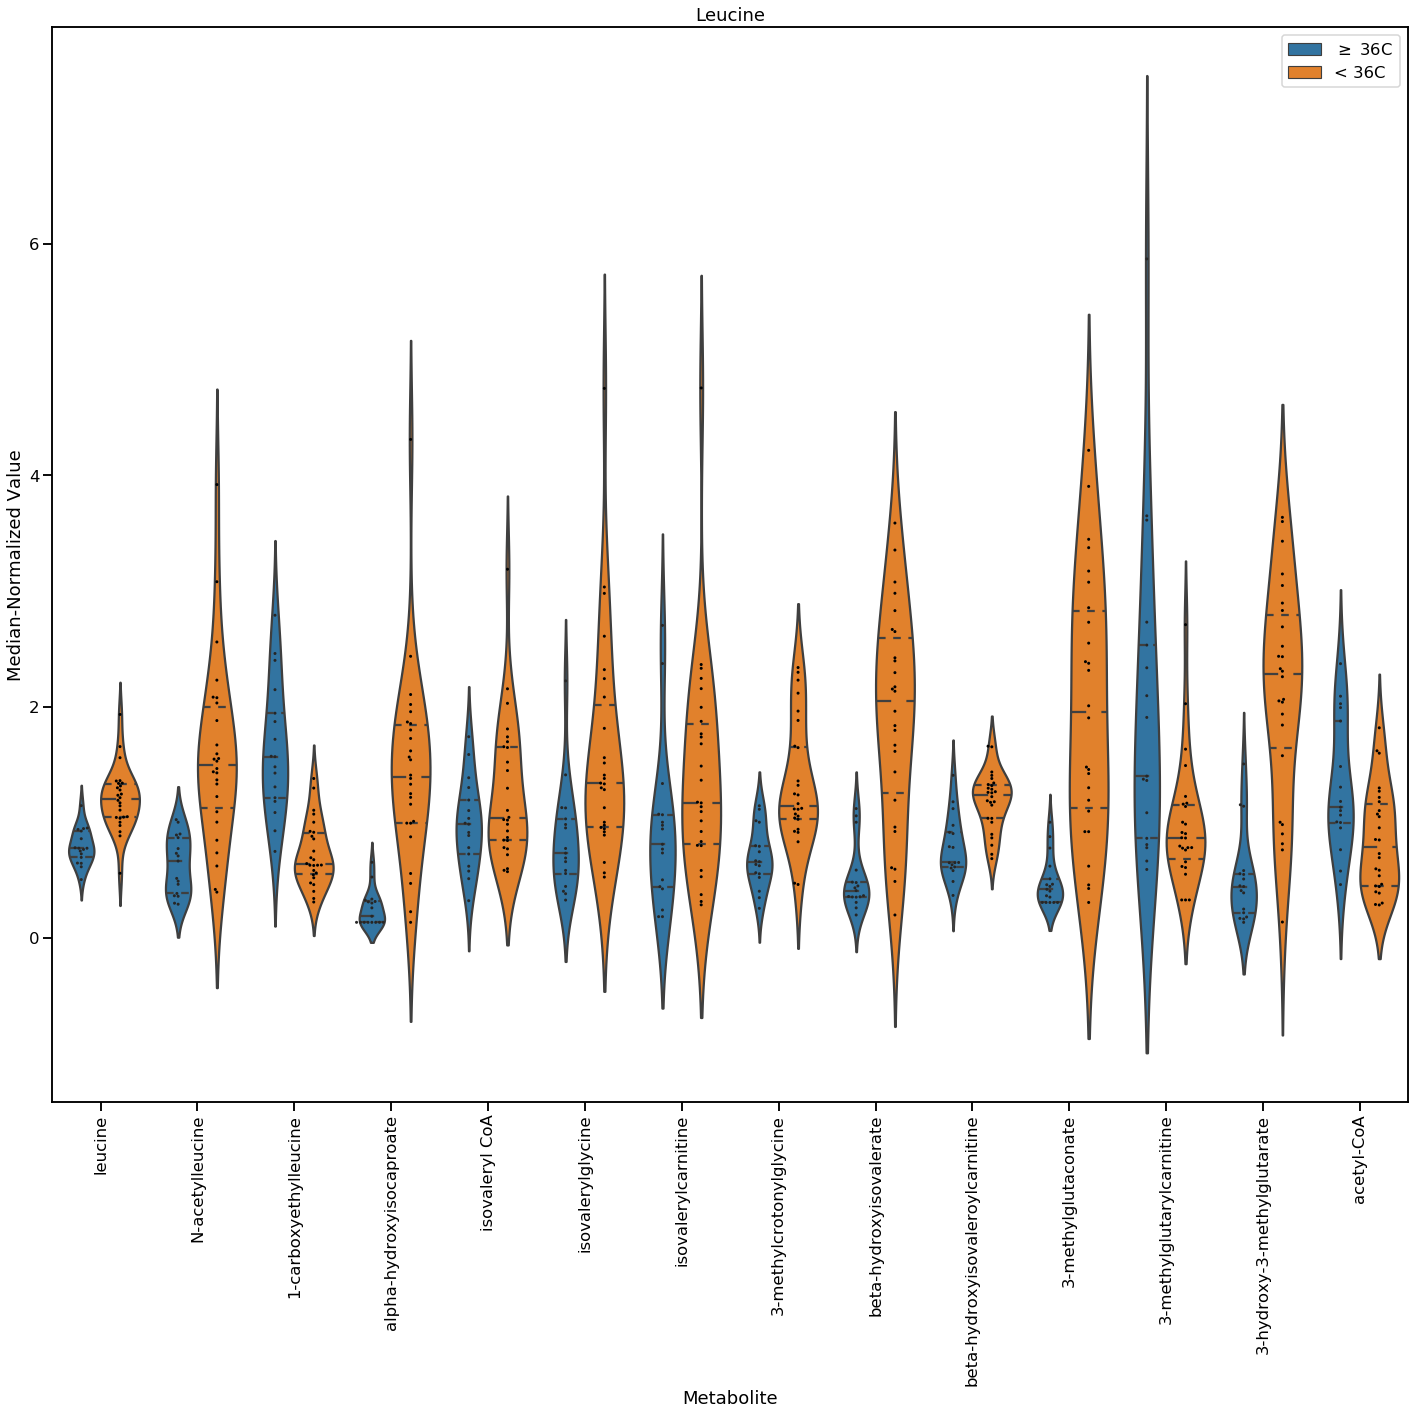

In [106]:
plot_violin_metabs(df_6, 36,90,'Leucine',(20,20),3,'../processed/violin_Leucine.png')

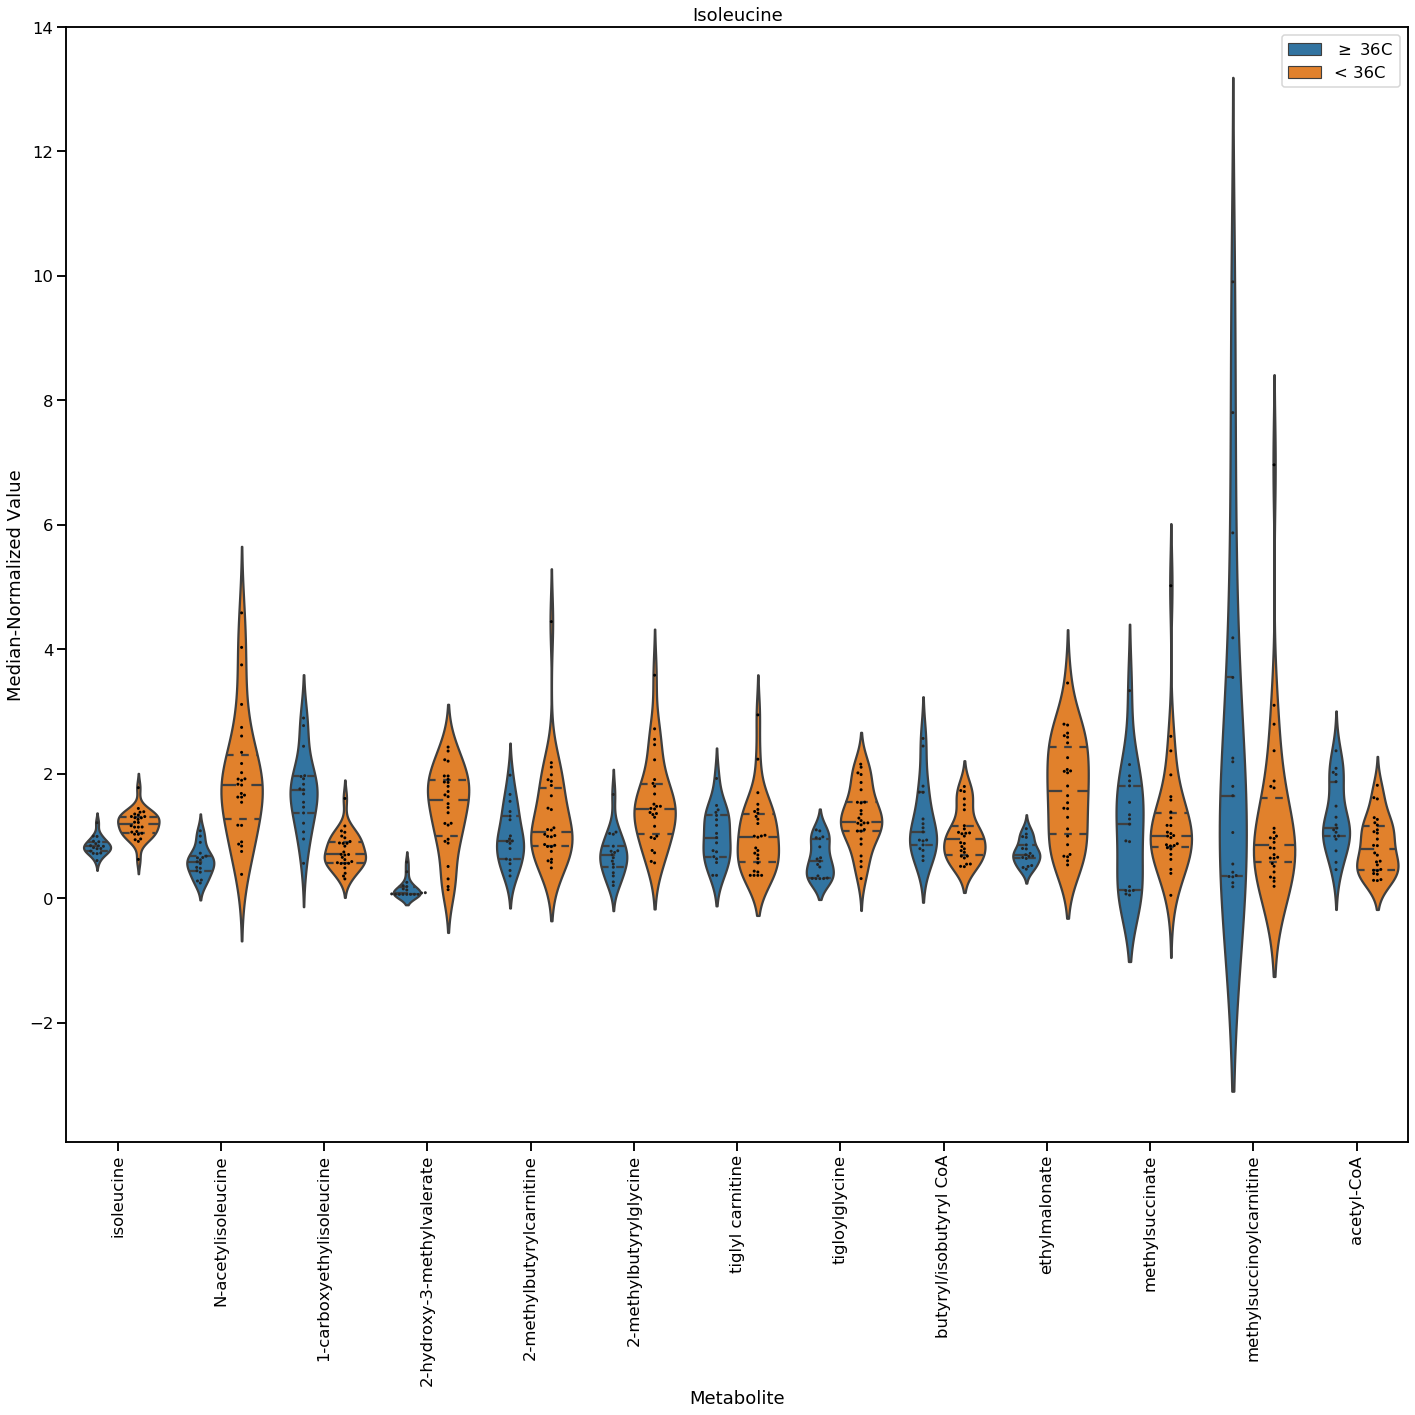

In [107]:
plot_violin_metabs(df_7, 36,90,'Isoleucine',(20,20),3,'../processed/violin_Isoleucine.png')

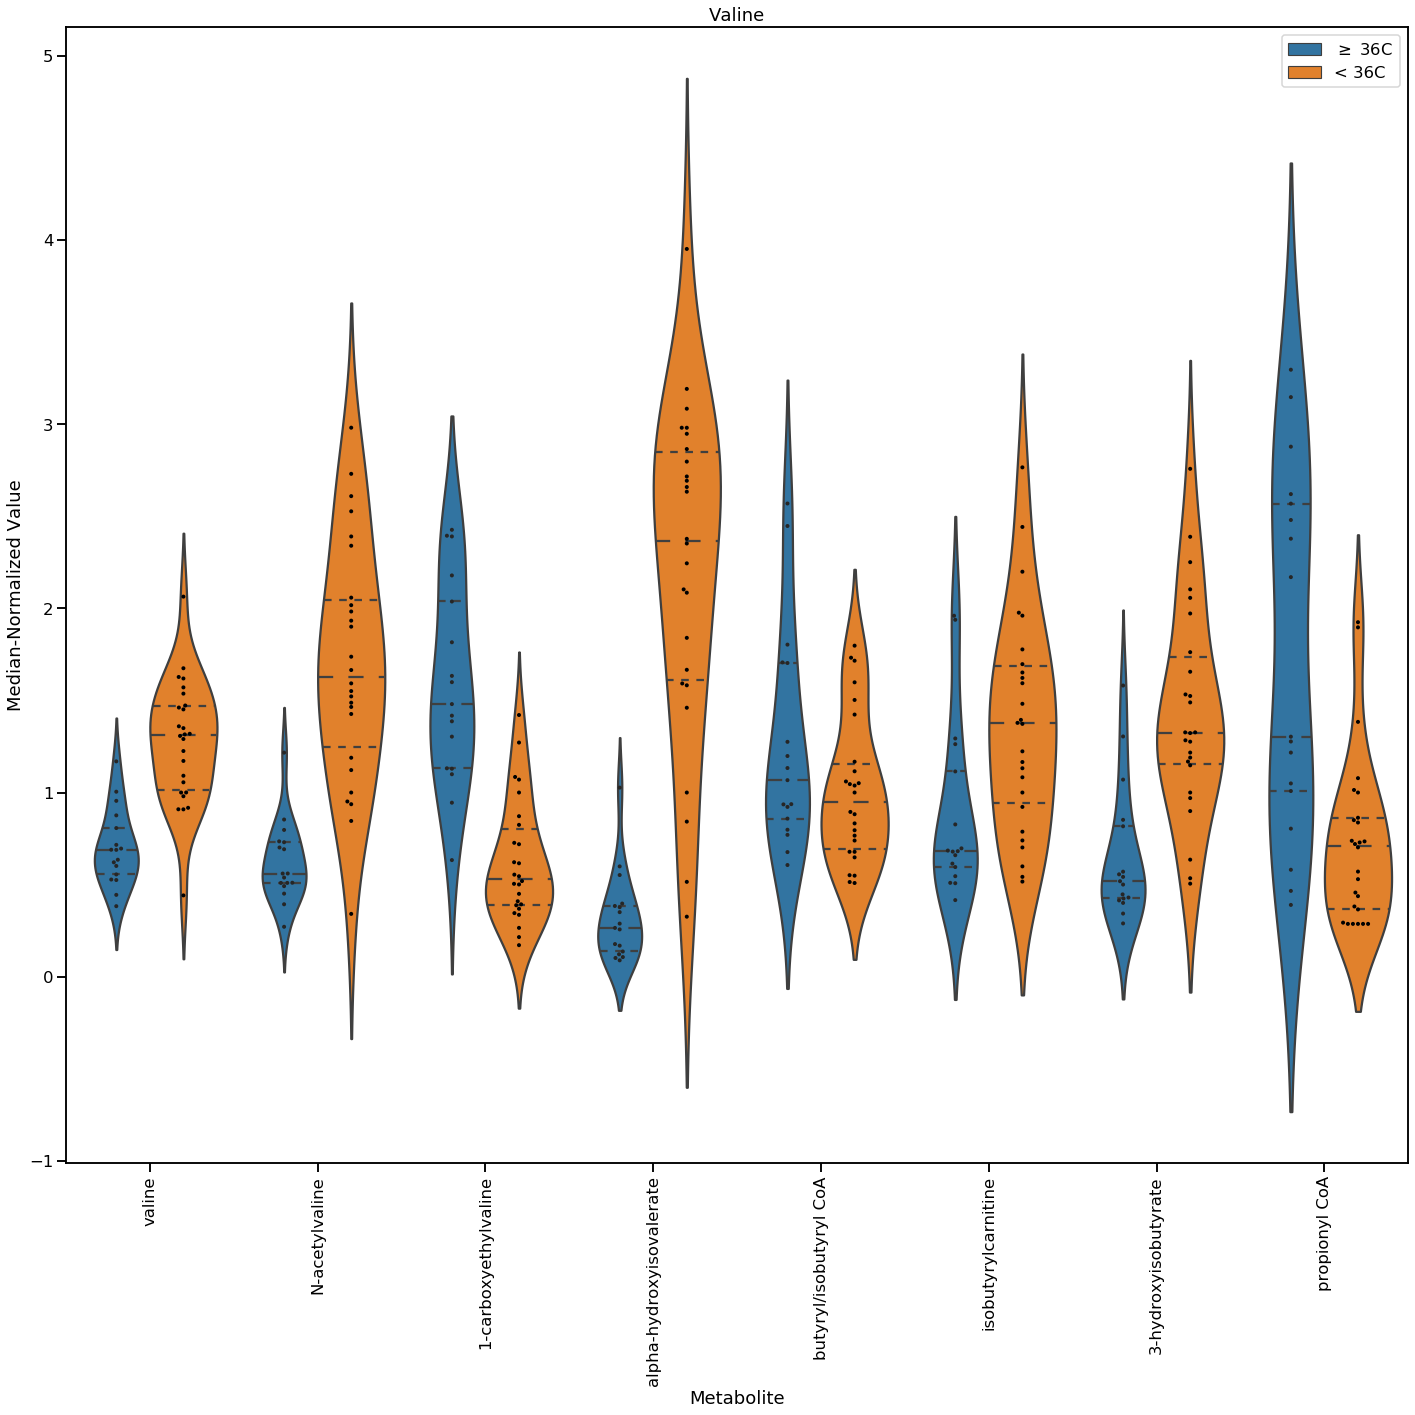

In [108]:
plot_violin_metabs(df_8, 36,90,'Valine',(20,20),4,'../processed/violin_valine.png')

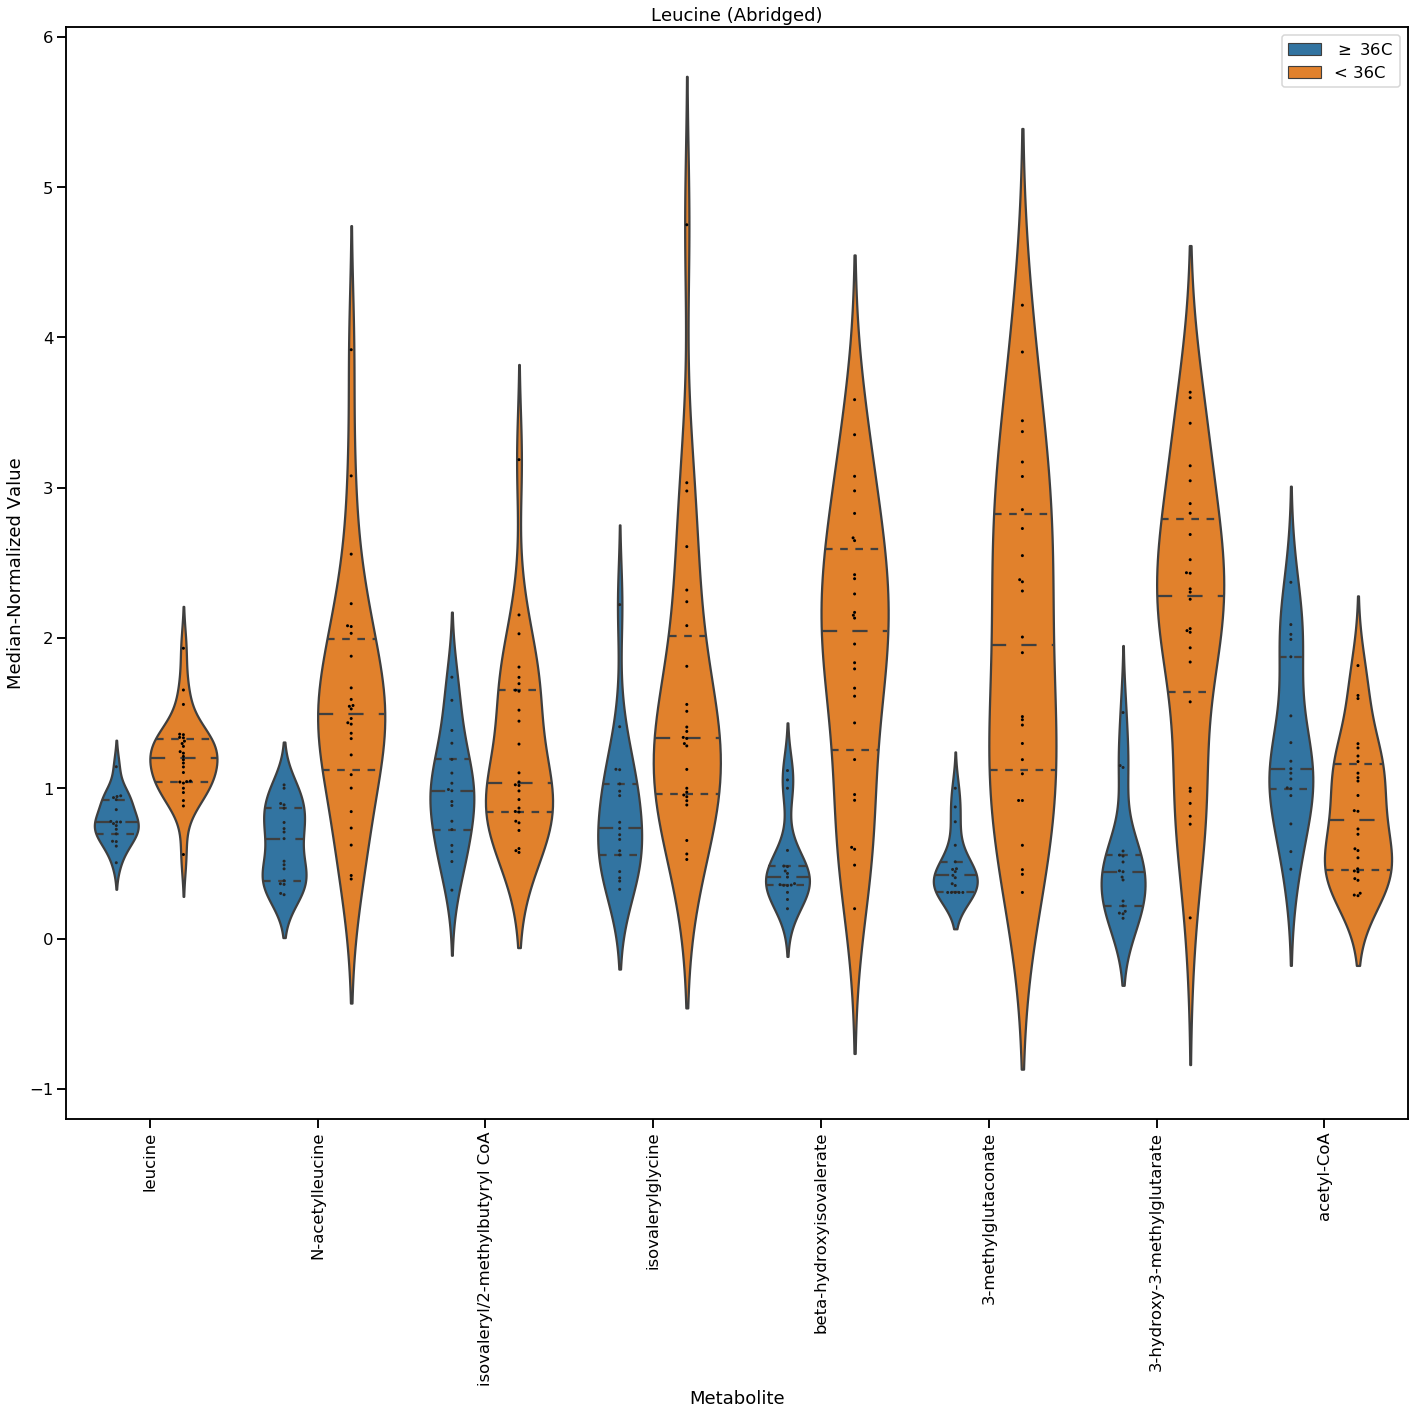

In [109]:
plot_violin_metabs(df_9, 36,90,'Leucine (Abridged)',(20,20),3,'../processed/violin_Leucine_abrdiged.png')

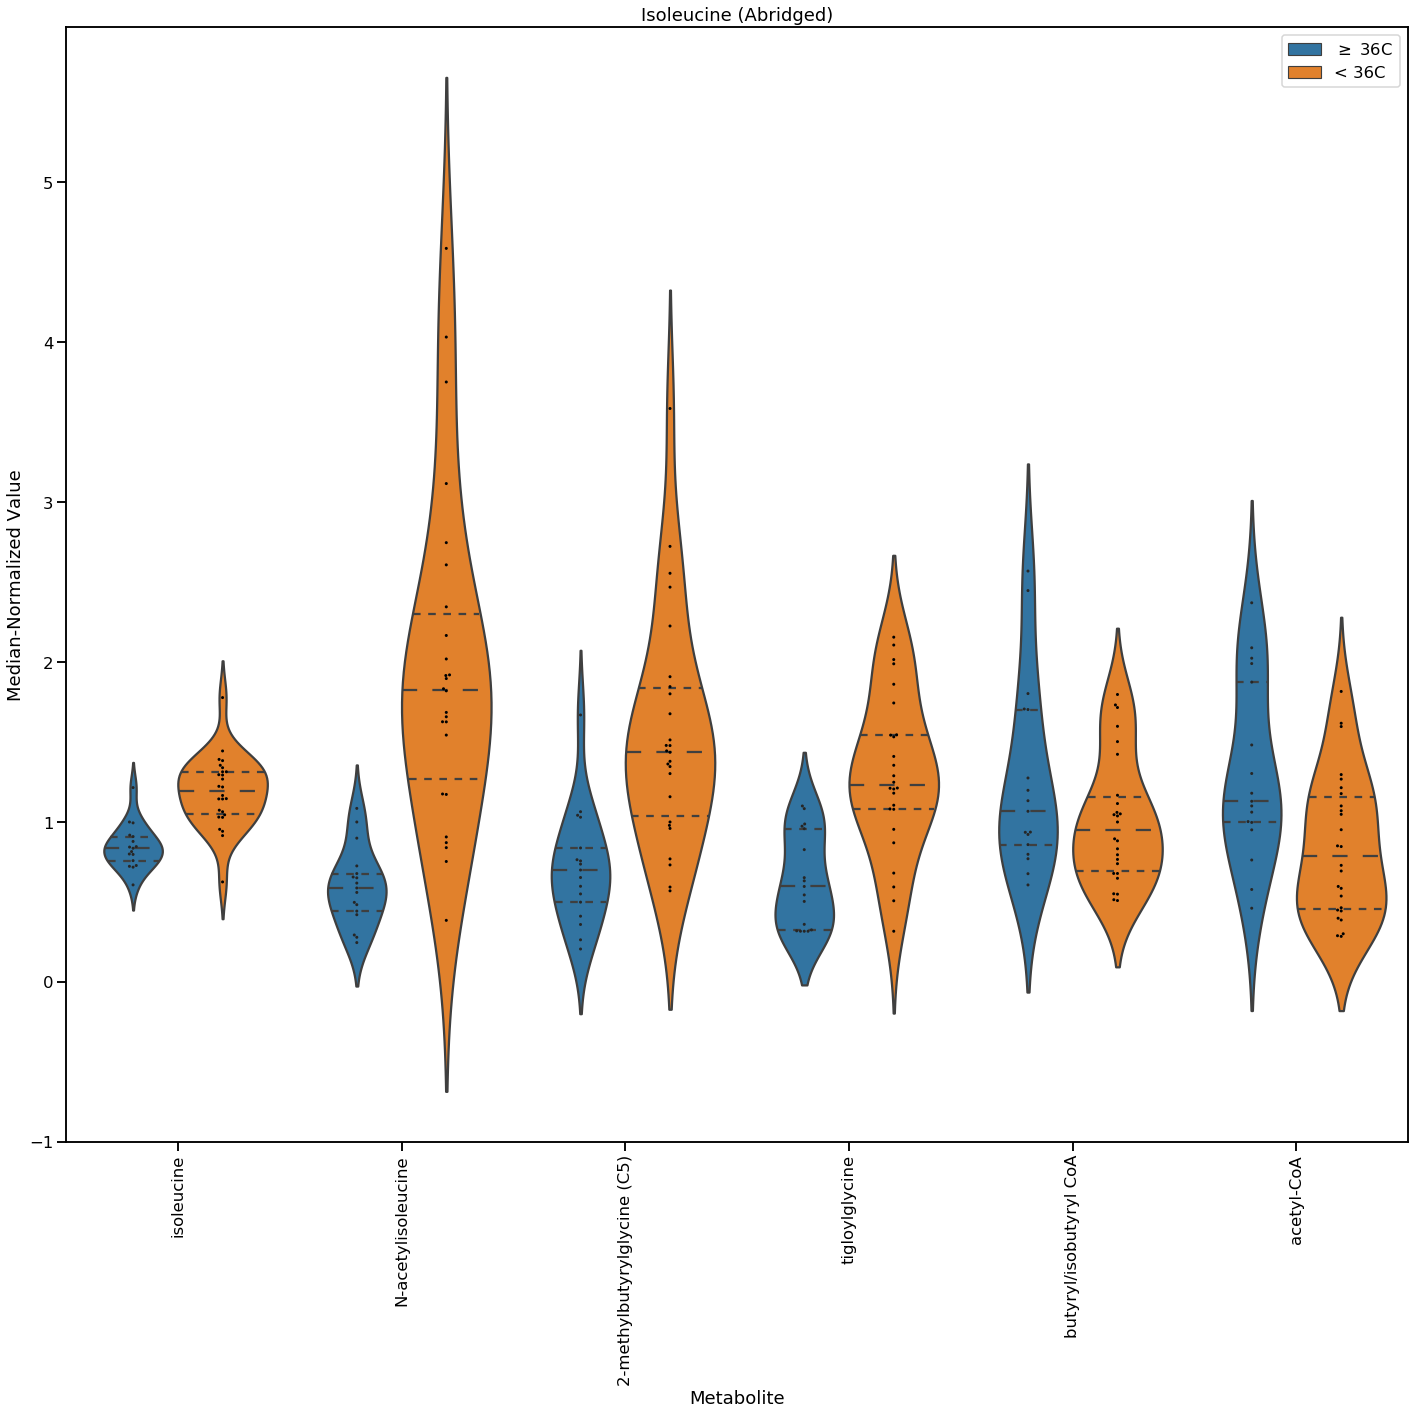

In [110]:
plot_violin_metabs(df_10, 36,90,'Isoleucine (Abridged)',(20,20),3,'../processed/violin_Isoleucine_abridged.png')

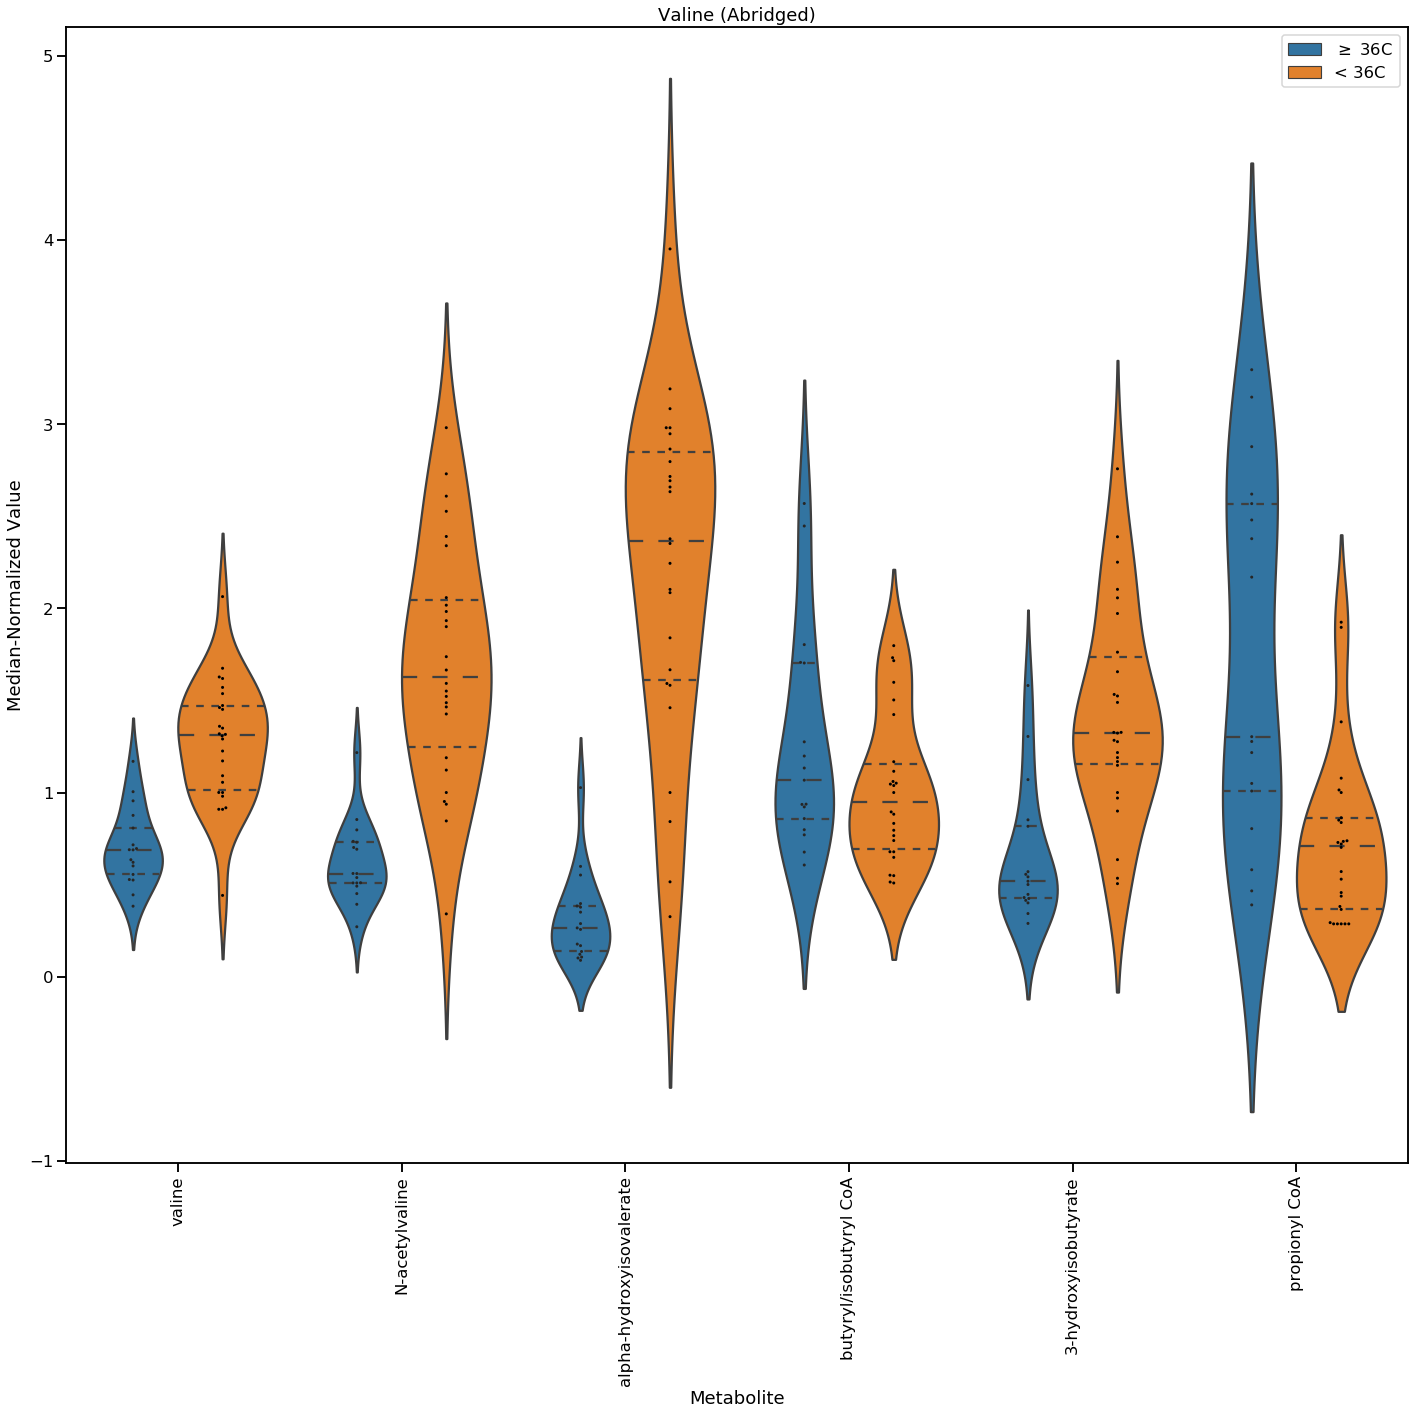

In [111]:
plot_violin_metabs(df_11, 36,90,'Valine (Abridged)',(20,20),3,'../processed/violin_valine_abridged.png')

## Bile Acids

In [144]:
primary_bileAcids_metabs = ['taurochenodeoxycholate','tauro-beta-muricholate','glycocholate','cholate','taurocholate',
                           'beta-muricholate','cholate sulfate','chenodeoxycholate']
secondary_bileAcids_metabs = ['taurohyodeoxycholic acid','tauroursodeoxycholate','ursocholate','deoxycholate',
                              'taurolithocholate','taurodeoxycholate','taurohyocholate*',
                              'taurochenodeoxycholic acid (7 or 27)-sulfate','taurocholenate sulfate*',
                              '7-ketodeoxycholate']


In [152]:
chemID_primaryBileAcids = get_chemIDlist(metab_def, primary_bileAcids_metabs)
chemID_secondaryBileAcids = get_chemIDlist(metab_def, secondary_bileAcids_metabs)
df_12 = merged_data.loc[:,chemID_primaryBileAcids]
df_13 = merged_data.loc[:,chemID_secondaryBileAcids]

df_12.columns = primary_bileAcids_metabs
df_13.columns = ['taurohyodeoxycholic acid','tauroursodeoxycholate','ursocholate','deoxycholate',
                              'taurolithocholate','taurodeoxycholate','taurohyocholate',
                              'taurochenodeoxycholic acid sulfate','taurocholenate sulfate',
                              '7-ketodeoxycholate']

df_12['Final_Temp'] = merged_data['Final.Temp']
df_13['Final_Temp'] = merged_data['Final.Temp']


taurochenodeoxycholate
tauro-beta-muricholate
glycocholate
cholate
taurocholate
beta-muricholate
cholate sulfate
chenodeoxycholate
[1629, 100001250, 342, 136, 1648, 100001066, 100006637, 1123]
taurohyodeoxycholic acid
tauroursodeoxycholate
ursocholate
deoxycholate
taurolithocholate
taurodeoxycholate
taurohyocholate*
taurochenodeoxycholic acid (7 or 27)-sulfate
taurocholenate sulfate*
7-ketodeoxycholate
[100003869, 100002912, 100002913, 302, 100001065, 1668, 100004084, 100006643, 100001990, 100001063]


C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


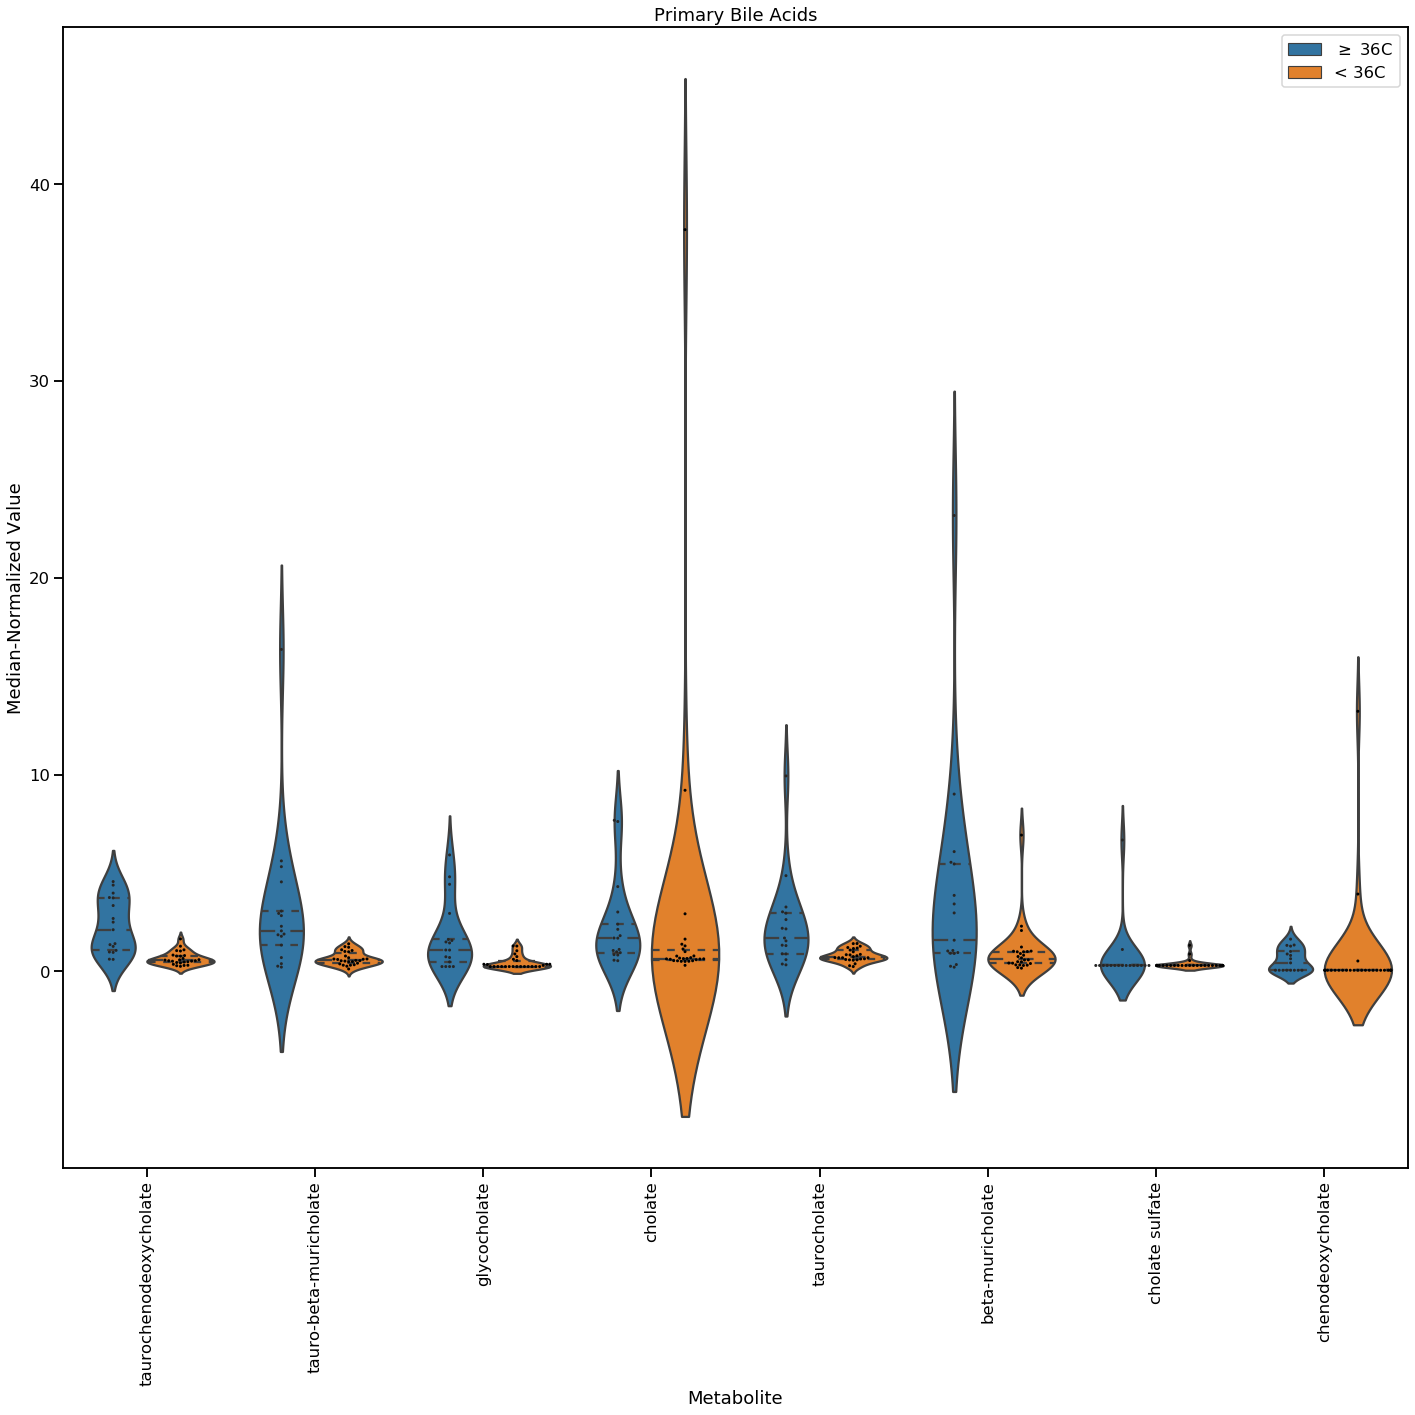

In [153]:
plot_violin_metabs(df_12, 36,90,'Primary Bile Acids',(20,20),3,'../processed/violin_BileAcids_primary.png')

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


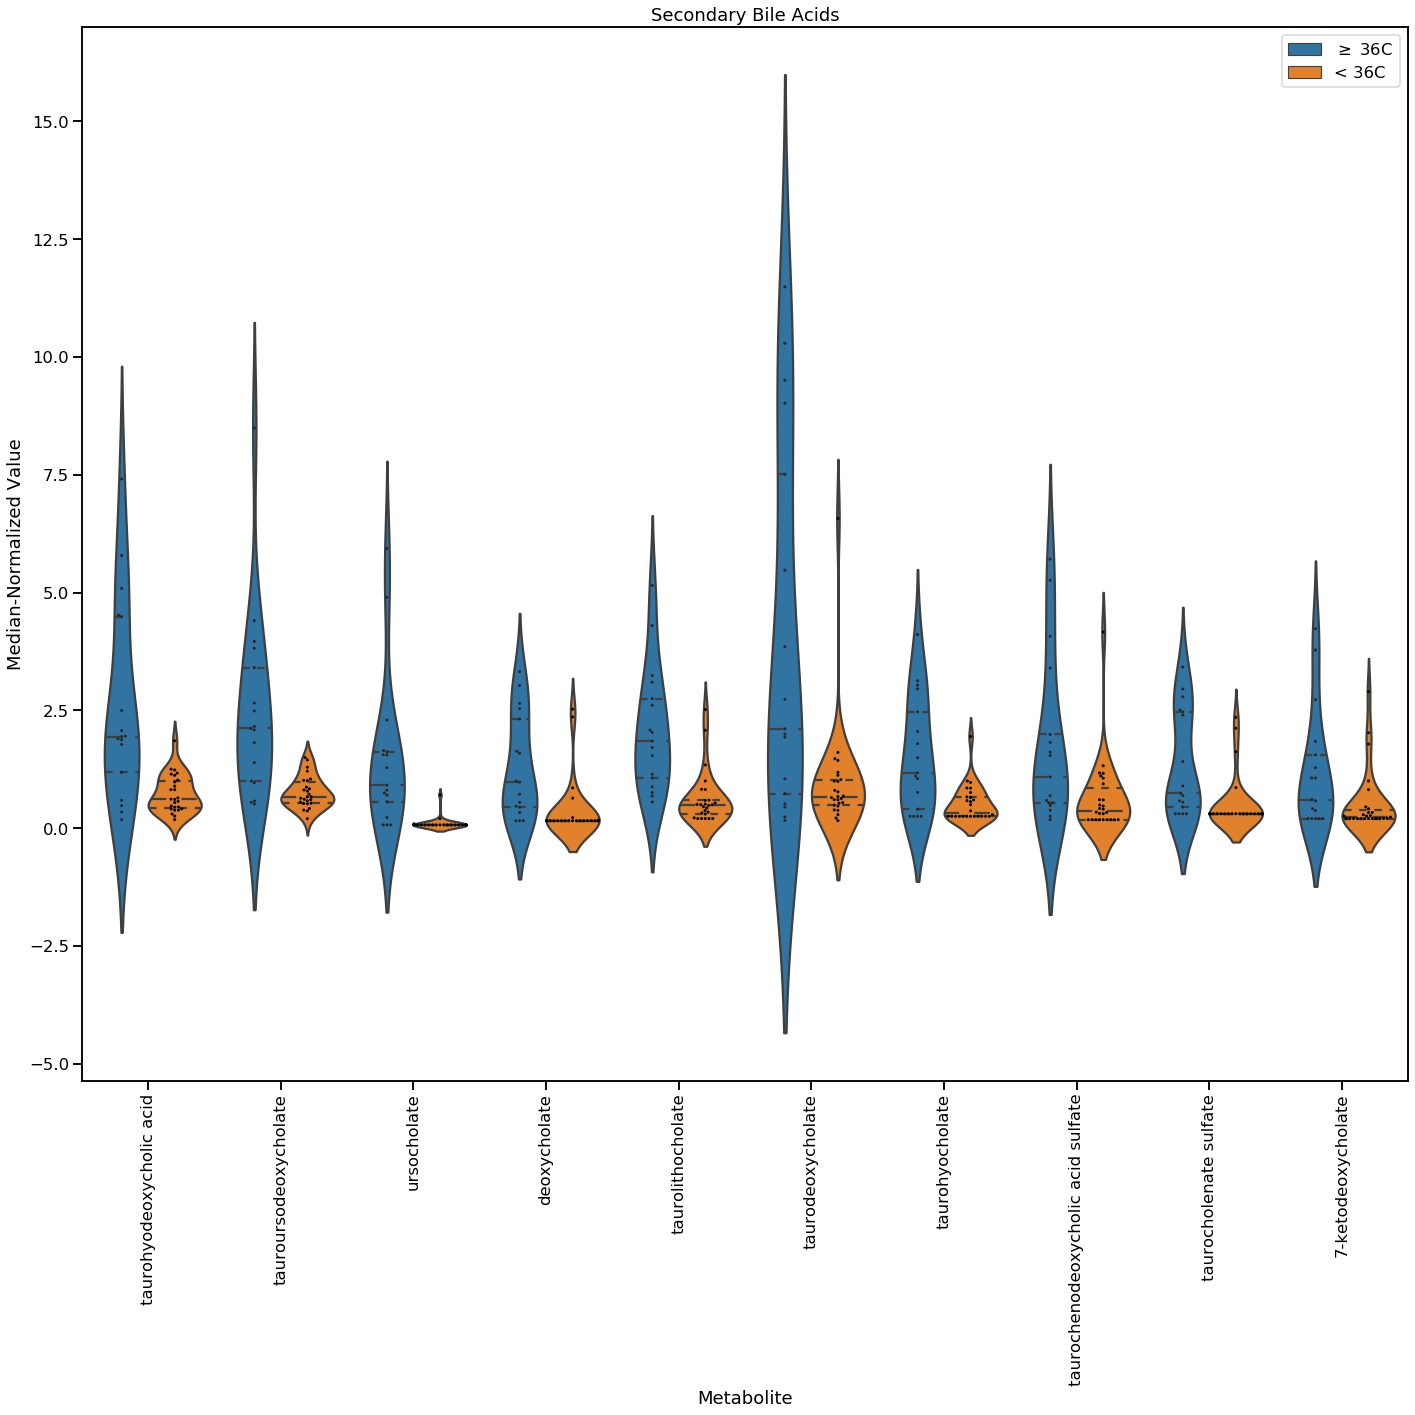

In [157]:
plot_violin_metabs(df_13, 36,90,'Secondary Bile Acids',(20,20),3,'../processed/violin_BileAcids_secondary.png')

## perform t-tests

In [112]:
from scipy import stats

def perform_ttests(df, temp_thresh):
    metabs = df.columns
    for i in range(len(metabs)):
        a = df[df['Final_Temp']>=temp_thresh]
        b = df[df['Final_Temp']<temp_thresh]
        [test_stat,pval] = stats.ttest_ind(a[metabs[i]],b[metabs[i]])
        print([metabs[i],pval])
    

    

In [113]:
perform_ttests(df_6, 36)

['leucine', 1.117167541407469e-06]
['N-acetylleucine', 2.345450629562326e-05]
['1-carboxyethylleucine', 1.6204568762058436e-08]
['alpha-hydroxyisocaproate', 5.382087700560484e-07]
['isovaleryl CoA', 0.09385433060600673]
['isovalerylglycine', 0.00438982315101389]
['isovalerylcarnitine', 0.07311888378610121]
['3-methylcrotonylglycine', 4.594394617036822e-05]
['beta-hydroxyisovalerate', 2.894803943597478e-07]
['beta-hydroxyisovaleroylcarnitine', 1.0982684206132297e-05]
['3-methylglutaconate', 2.7035383868077147e-06]
['3-methylglutarylcarnitine', 0.0018311966676950958]
['3-hydroxy-3-methylglutarate', 3.819347975497716e-08]
['acetyl-CoA', 0.004165862650151089]
['Final_Temp', 5.1820617594654956e-11]


In [114]:
perform_ttests(df_7, 36)

['isoleucine', 1.214667539194219e-06]
['N-acetylisoleucine', 3.3263107810002256e-06]
['1-carboxyethylisoleucine', 2.43911318052321e-08]
['2-hydroxy-3-methylvalerate', 9.722538602156396e-10]
['2-methylbutyrylcarnitine', 0.15429565471716444]
['2-methylbutyrylglycine', 5.824296542700036e-05]
['tiglyl carnitine', 0.8472926153869389]
['tigloylglycine', 1.1258765068687219e-05]
['butyryl/isobutyryl CoA', 0.10633060313613373]
['ethylmalonate', 1.7149194795010757e-05]
['methylsuccinate', 0.6526978265740371]
['methylsuccinoylcarnitine', 0.07061314177933667]
['acetyl-CoA', 0.004165862650151089]
['Final_Temp', 5.1820617594654956e-11]


In [115]:
perform_ttests(df_8, 36)

['valine', 1.2544584647726783e-07]
['N-acetylvaline', 5.55118616791973e-08]
['1-carboxyethylvaline', 6.924723855875618e-09]
['alpha-hydroxyisovalerate', 1.1702653477071725e-10]
['butyryl/isobutyryl CoA', 0.10633060313613373]
['isobutyrylcarnitine', 0.006298850755219846]
['3-hydroxyisobutyrate', 8.872829423746513e-06]
['propionyl CoA', 4.5241214292178955e-05]
['Final_Temp', 5.1820617594654956e-11]


In [116]:
perform_ttests(df_1, 36)

['ATP', 0.08227258839479472]
['ADP', 9.195037544832973e-06]
['cAMP', 0.22600631079854885]
['NADH', 0.0005755631544285706]
['NAD', 0.014859486890162093]
['ATP/ADP', 8.957430486664227e-06]
['ATP/cAMP', 0.019039172220816757]
['NAD/NADH', 0.0003622426867649026]
['Final_Temp', 5.1820617594654956e-11]


In [117]:
perform_ttests(df_2, 36)

['glucose', 1.5880915278157395e-06]
['1,5-anhydroglucitol', 2.6291899517727416e-09]
['glucose 6-phosphate', 4.963334108724764e-06]
['hexose diphosphates', 0.03317676965560899]
['2,3-diphosphoglycerate', 0.5233176052162041]
['3-phosphoglycerate', 0.1878209587792567]
['2-phosphoglycerate', 0.4027532427838185]
['phosphoenolpyruvate', 0.03841648308892292]
['pyruvate', 0.027060756516106645]
['lactate', 3.511931639354206e-10]
['Final_Temp', 5.1820617594654956e-11]


In [118]:
perform_ttests(df_3, 36)

['pyruvate', 0.027060756516106645]
['lactate', 3.511931639354206e-10]
['acetyl-CoA', 0.004165862650151089]
['citrate', 5.9254727255358994e-06]
['aconitate', 3.909349273497117e-05]
['itaconate', 9.010900342513858e-05]
['isocitrate', 0.00014225810795773092]
['alpha-ketoglutarate', 2.1451752102164346e-05]
['propionyl CoA', 4.5241214292178955e-05]
['succinate', 0.32804798169093785]
['fumarate', 0.5583831440275306]
['methylfumarate', 0.001393456987359607]
['malate', 0.6548398186789357]
['alpha-KG/succinate', 0.12801128251878935]
['itaconate/succinate', 0.005676806575800465]
['Final_Temp', 5.1820617594654956e-11]


In [119]:
perform_ttests(df_4, 36)

['glutamine', 0.0004656514715169759]
['glutamate', 0.6815664395423436]
['alpha-ketoglutarate', 2.1451752102164346e-05]
['glycine', 0.17811988596297992]
['cysteine', 0.7029571314625587]
['gamma-glutamylcysteine', 1.0783967788426014e-06]
['GSH', 2.0966210338413234e-07]
['GSSG', 0.0046371257775897805]
['5-oxoproline', 7.41596795201292e-07]
['proline', 0.001271851123979224]
['citrulline', 0.2800667725686335]
['aspartate', 0.03288143833343215]
['arginine', 0.15139168551717194]
['Final_Temp', 5.1820617594654956e-11]


In [120]:
perform_ttests(df_5, 36)

['arginine', 0.15139168551717194]
['histidine', 5.604336207792752e-10]
['lysine', 0.41956926708687725]
['aspartate', 0.03288143833343215]
['glutamate', 0.6815664395423436]
['serine', 0.45540308932902107]
['threonine', 1.940051850842408e-05]
['asparagine', 0.4355828953172114]
['glutamine', 0.0004656514715169759]
['cysteine', 0.7029571314625587]
['glycine', 0.17811988596297992]
['proline', 0.001271851123979224]
['alanine', 1.6736697801148095e-09]
['valine', 1.2544584647726783e-07]
['isoleucine', 1.214667539194219e-06]
['leucine', 1.117167541407469e-06]
['methionine', 0.0014051670349840692]
['phenylalanine', 0.25159634250099944]
['tyrosine', 1.4769813958470083e-05]
['tryptophan', 2.3047392098974347e-05]
['Final_Temp', 5.1820617594654956e-11]


In [155]:
perform_ttests(df_12, 36)

['taurochenodeoxycholate', 7.850274166903494e-07]
['tauro-beta-muricholate', 0.0017462122871851472]
['glycocholate', 0.0007537318608611176]
['cholate', 0.8842556405933911]
['taurocholate', 0.0015409983826991443]
['beta-muricholate', 0.012941852697280902]
['cholate sulfate', 0.2579593009654837]
['chenodeoxycholate', 0.8173705148011169]
['Final_Temp', 5.1820617594654956e-11]


In [156]:
perform_ttests(df_13, 36)

['taurohyodeoxycholic acid', 7.188900531980916e-05]
['tauroursodeoxycholate', 7.515249956175384e-05]
['ursocholate', 0.00010857953944333322]
['deoxycholate', 0.0011689051829252477]
['taurolithocholate', 9.781577047652903e-06]
['taurodeoxycholate', 0.0005745068551983302]
['taurohyocholate', 0.00020827755214422117]
['taurochenodeoxycholic acid sulfate', 0.007136686589734956]
['taurocholenate sulfate', 0.002589275609774525]
['7-ketodeoxycholate', 0.027893462573736295]
['Final_Temp', 5.1820617594654956e-11]


## Create nested pie plots

In [121]:
metab_def.head()

PATHWAY SORTORDER                                  BIOCHEMICAL  \
0               1642  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1               1648   (16 or 17)-methylstearate (a19:0 or i19:0)   
2               4283                     (3'-5')-adenylylcytidine   
3               4288                   (3'-5')-cytidylylcytidine*   
4               1919                (R)-3-hydroxybutyrylcarnitine   

  SUPER PATHWAY                                      SUB PATHWAY  COMP ID  \
0         Lipid                             Fatty Acid, Branched    38768   
1         Lipid                             Fatty Acid, Branched    38296   
2    Nucleotide                                     Dinucleotide    52753   
3    Nucleotide                                     Dinucleotide    62397   
4         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   

          PLATFORM CHEMICAL ID      RI      MASS         HMDB        PUBCHEM  
0        LC/MS Neg   100002945  5695.0  269.2487  HMDB0061859  8181;17903417  
1        LC/MS Neg   100002356  5993.0  297.2799  HMDB0037397        3083779  
2        LC/MS Neg   100009062  1920.0  571.1308          NaN       10875494  
3        LC/MS Neg   100020727  1472.0  547.1195          NaN          94237  
4  LC/MS Pos Early   100003926  2400.0  248.1493  HMDB0013127       53481617

In [122]:
metab_def_2 = metab_def[['SUPER PATHWAY','SUB PATHWAY']]
# metab_def_2 = metab_def_2.groupby(['BIOCHEMICAL',''])
metab_def_2 = metab_def_2.groupby(['SUPER PATHWAY','SUB PATHWAY']).size().reset_index()
# metab_def_2.columns.rename({'0':'num_metabs'})
metab_def_2.head()

SUPER PATHWAY                               SUB PATHWAY   0
0    Amino Acid          Alanine and Aspartate Metabolism   6
1    Amino Acid                       Creatine Metabolism   4
2    Amino Acid                      Glutamate Metabolism  10
3    Amino Acid                    Glutathione Metabolism  13
4    Amino Acid  Glycine, Serine and Threonine Metabolism  12

In [123]:
labels = metab_def_2['SUPER PATHWAY'].unique()
size=0.3
vals = metab_def_2[0]
print(labels)
group_sum = metab_def_2.groupby('SUPER PATHWAY')[0].sum()
print(group_sum)
facecolor = 'white'
font_color = 'black'
hfont = {'fontname':'Arial'}

['Amino Acid' 'Carbohydrate' 'Cofactors and Vitamins' 'Energy' 'Lipid'
 'Nucleotide' 'Partially Characterized Molecules' 'Peptide' 'Xenobiotics']
SUPER PATHWAY
Amino Acid                           207
Carbohydrate                          51
Cofactors and Vitamins                51
Energy                                14
Lipid                                431
Nucleotide                            66
Partially Characterized Molecules      2
Peptide                               33
Xenobiotics                           62
Name: 0, dtype: int64


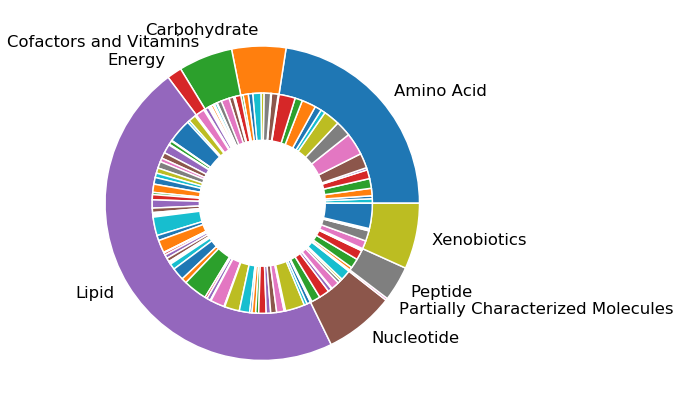

In [124]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
ax.pie(group_sum, radius=1, labels = labels, textprops={'color':font_color},
      wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(vals, radius=1-size, wedgeprops=dict(width=size,edgecolor='w'))
plt.tight_layout()
plt.savefig('../processed/plot_metabolite_definitions.png')
plt.show()

# Make heatmap of GSEA enriched pathways

In [125]:
# read in dfs 
merged_data = pd.read_csv("../raw/final_merged_jeren.csv")
names = pd.read_csv("../raw/Biochemical_names.csv")
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")

metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features
df_heatmap = merged_data.loc[:, metabolites]
df_heatmap.columns = metab_def.BIOCHEMICAL
final_temp = merged_data['Final.Temp']
final_temp_str = []
for i in range(len(final_temp)):
    if final_temp[i] >= 36:
        final_temp_str.append('H')
    else:
        final_temp_str.append('S')
df_heatmap['final_temp'] = final_temp_str
final_temp = df_heatmap.pop('final_temp')

print(df_heatmap.shape)

# identify interested pathways and the metabolites in them
interestedPaths = df_gsea.Pathway[:10]
metabolites_paths = metab_def[metab_def['SUB PATHWAY'].isin(interestedPaths)].BIOCHEMICAL.values
# print(metabolites_paths)

# subset the df_heatmap to only contain these metabolites
df_heatmap=df_heatmap[[c for c in df_heatmap.columns if c in metabolites_paths]]
print(df_heatmap.shape)

(43, 917)
(43, 264)


C:\Users\amisr\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1296x864 with 0 Axes>

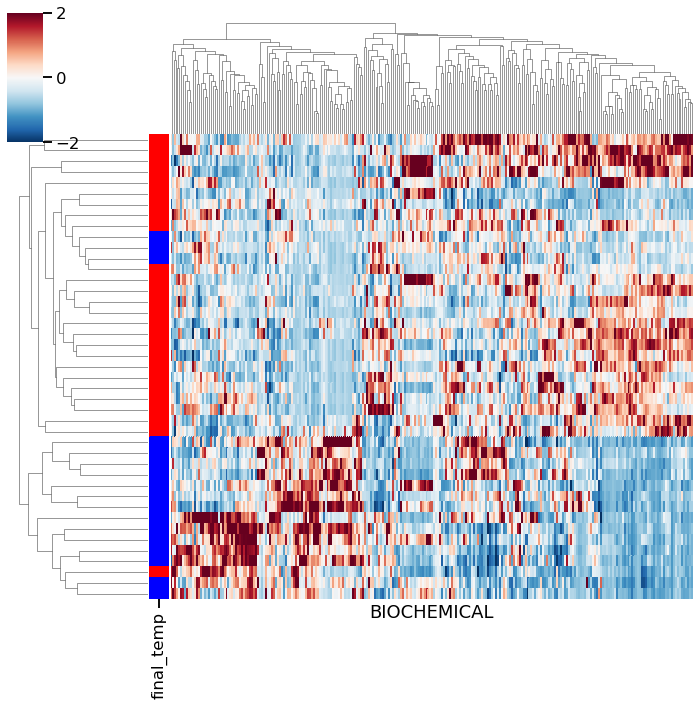

In [126]:
plt.figure(figsize=(18,12))
lut = dict({'H':'b','S':'r'})
row_colors = final_temp.map(lut)
g = sns.clustermap(df_heatmap, z_score=1, cmap="RdBu_r",vmin=-2,vmax=2,row_colors=row_colors,
                  row_cluster=True,xticklabels=False,yticklabels=False)
ax = g.ax_heatmap
ax.set_ylabel('')
plt.savefig('../processed/heatmap_GSEAtop10.png')
plt.show()